In [1]:
import pandas as pd

from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

%pylab inline
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

%matplotlib inline


from sklearn.metrics import roc_curve

Populating the interactive namespace from numpy and matplotlib


In [16]:
df=pd.read_csv("midterm_train.csv")

In [17]:
df.columns


Index([u'x0', u'x1', u'x2', u'x3', u'x4', u'x5', u'x6', u'x7', u'x8', u'x9',
       u'x10', u'x11', u'x12', u'x13', u'x14', u'x15', u'x16', u'x17', u'x18',
       u'x19', u'x20', u'x21', u'x22', u'x23', u'x24', u'x25', u'x26', u'x27',
       u'x28', u'x29', u'x30', u'x31', u'x32', u'x33', u'x34', u'x35', u'x36',
       u'x37', u'x38', u'x39', u'x40', u'x41', u'x42', u'x43', u'x44', u'x45',
       u'x46', u'x47', u'x48', u'x49', u'y'],
      dtype='object')

In [4]:
df.x0.value_counts()

 0.102691    1
-0.211378    1
 0.174039    1
 0.617952    1
-0.339941    1
-0.309543    1
 0.216048    1
 0.031328    1
-0.728197    1
 0.083280    1
 0.106562    1
-0.098998    1
-0.022384    1
 0.379271    1
-0.137151    1
 0.564811    1
-0.123197    1
 0.305540    1
-0.495906    1
 0.688605    1
 0.441334    1
-0.585758    1
 0.432435    1
-0.269849    1
 0.158604    1
 0.039542    1
 0.166480    1
-0.124345    1
-0.321969    1
-0.082513    1
            ..
 0.374552    1
-0.931190    1
-0.112844    1
 0.043239    1
 0.035535    1
-0.430894    1
-0.315795    1
-0.065598    1
-0.250176    1
 0.340119    1
 0.019614    1
-0.041094    1
-0.331833    1
 0.259331    1
-0.254476    1
-0.470547    1
 0.454751    1
-0.154582    1
-0.121661    1
-0.290557    1
-0.540581    1
 0.501135    1
-0.247391    1
-0.561347    1
-0.184685    1
 0.284092    1
 0.188363    1
-0.131137    1
 0.012860    1
 0.177312    1
Name: x0, dtype: int64

In [5]:
#X0 is continous

In [6]:
df[df.x0.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
1282,NaN,-6.505933,-8.828135,5.613332,-10.270281,-6.056645,-12.835444,-30.720431,5.256675,-0.516974,...,8.778931,1.527290,0.801398,3.849479,-0.335413,1.699792,-3.431273,2.133383,0.976528,0
2290,NaN,-12.186736,11.621886,13.116801,-0.180567,-12.906595,16.897349,-7.274127,14.426479,10.585516,...,24.516571,1.609133,0.106570,-0.094312,0.371740,3.577218,-0.949692,-0.020877,2.913097,0
7491,NaN,-0.384596,-10.818621,5.177347,-5.146951,16.057039,-15.729462,29.250231,-7.189067,-8.740679,...,-12.855764,-7.449942,-0.053725,-3.128537,0.310637,-100.518661,-3.844691,2.232711,-23.559293,0
15484,NaN,1.454200,-7.406338,-1.293288,-4.836150,9.834562,-10.768259,5.449024,-6.198703,-8.075361,...,5.793891,1.575676,-0.300571,0.835870,-0.261038,-26.354736,4.547299,0.553154,16.844292,1
22497,NaN,11.653534,4.327604,-3.506009,-4.761220,0.757278,6.292011,-38.217400,17.515603,-4.352516,...,11.951822,4.002679,-0.485700,4.602390,-0.351310,52.826465,-7.757921,-1.345127,-9.443975,0
23192,NaN,-6.077900,7.607497,-3.122131,7.088416,-1.390626,11.060729,-9.517971,-6.684410,-12.948356,...,-3.414259,9.851763,-1.565546,3.943872,0.203333,89.177267,-1.485720,-3.380592,22.719672,0
28954,NaN,-1.529839,-3.652209,3.382918,6.294696,-4.290054,-5.310038,-17.821345,7.555497,10.163328,...,-7.548214,-6.677756,-0.751146,3.433916,0.409124,-21.733425,0.713566,-1.763168,-18.620857,0
35999,NaN,6.623182,-5.883371,-4.540029,-5.175931,-2.654606,-8.553979,2.210769,-15.369148,-6.329517,...,20.589816,-6.167838,-4.173543,-5.579965,-0.152871,-14.914124,-1.577324,0.683788,13.675393,1
53729,NaN,-5.299368,-0.632413,0.479908,10.290155,0.660965,-0.919481,-19.121599,5.720173,-4.705099,...,-0.116595,3.341097,0.052327,-4.473686,0.315010,24.938722,2.168197,-0.232055,0.777751,0
72318,NaN,6.713102,11.182837,0.077611,-6.304006,9.572240,16.259005,-7.990820,-13.391121,0.755567,...,1.388660,1.801888,0.933322,1.735192,-0.014280,-30.941666,2.123860,-2.145409,-32.842786,0


In [7]:
df.x1.value_counts()

-2.962774     1
 6.265544     1
 5.636382     1
-4.290248     1
 9.821504     1
-2.494653     1
-13.760974    1
 3.602447     1
 8.463322     1
 5.242201     1
-8.150218     1
 13.756379    1
-2.108068     1
 3.401338     1
 0.360913     1
 5.804160     1
-5.713714     1
 3.162261     1
-4.192957     1
 5.024898     1
 7.015599     1
-8.736396     1
-0.675925     1
-0.877087     1
-8.956740     1
-5.566545     1
-7.091157     1
-8.151389     1
 3.711785     1
 3.588860     1
             ..
-4.524439     1
-2.624034     1
 3.695628     1
 3.881615     1
-8.784250     1
 5.276872     1
 6.852562     1
 9.913283     1
-17.023315    1
 1.392015     1
 1.599238     1
 9.312352     1
 12.612883    1
 4.705796     1
-1.229393     1
-4.207221     1
-12.930522    1
-3.645403     1
-9.252960     1
 0.783919     1
-15.546865    1
 0.889107     1
 1.938264     1
-3.922787     1
-8.390659     1
-0.487134     1
-4.373846     1
 14.446068    1
-8.194828     1
-0.323929     1
Name: x1, dtype: int64

In [8]:
#Continous

In [9]:
df[df.x1.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
269,-0.069772,NaN,-4.459920,12.222372,5.104225,6.891987,-6.484388,-8.629761,10.449141,0.271671,...,16.147388,-3.069028,-2.705045,2.058376,-0.079317,20.913883,4.586310,1.768024,17.369014,1
3904,-0.340804,NaN,18.356819,-1.826176,-1.393698,-5.964728,26.689436,1.120473,-7.474115,-8.396540,...,6.249186,3.856136,0.340480,5.633011,-0.365907,49.040982,2.038678,-0.801971,14.210211,0
18170,-0.410770,NaN,-15.551382,3.744511,-1.685157,8.193513,-22.610541,-9.699565,-10.217595,7.033261,...,-42.057645,-2.118306,-0.083314,-0.790458,0.139784,26.234334,2.024583,-4.425617,-9.659983,0
40299,0.227076,NaN,-18.733132,-0.461465,8.660548,-7.886767,-27.236567,37.288344,5.859901,-1.997171,...,-1.232420,-1.082640,0.007881,-2.151750,-0.309361,-0.839516,-2.200192,1.642307,12.225306,1
43772,0.528588,NaN,4.561894,-8.441829,1.337442,1.643088,6.632651,21.382996,-7.556685,-9.451983,...,-11.346737,4.361716,-0.836350,9.708957,-0.138983,31.437957,1.982222,0.532836,0.764501,1
46051,-0.896503,NaN,-8.217168,-0.973278,0.631415,2.473625,-11.947144,-30.120214,-12.024429,-1.532167,...,22.603469,-6.153983,1.492377,-2.093309,-0.146086,-2.151492,-2.042253,0.871720,-0.320049,0
54302,-0.412861,NaN,4.635947,3.440926,-6.194971,-5.334492,6.740318,9.557759,2.495056,3.396796,...,3.313599,-6.866183,1.921869,-1.289816,-0.000929,-65.723600,2.654222,-2.042642,-15.531746,0
63871,-0.038766,NaN,5.749180,-26.352603,-18.375897,15.455716,8.358876,15.628983,-3.513677,-2.793763,...,0.382972,3.890814,-0.747013,0.017756,0.343915,26.260470,1.434131,-2.715424,5.044221,1
73401,0.606087,NaN,21.471900,7.414258,4.309340,9.269698,31.218530,11.403842,0.906969,3.396593,...,34.170639,-4.096659,0.458170,-0.993548,0.019414,-53.521643,5.775550,-3.131032,7.558760,0
76946,0.564955,NaN,-28.334382,4.373906,13.160118,-2.808574,-41.196063,-75.019455,-0.668637,3.894382,...,21.102828,-14.560322,-1.193860,-3.426034,-0.119264,-42.842431,-4.410659,3.331949,-4.881005,0


In [10]:
#has null values. x1

In [11]:
df.x2.value_counts()

 20.081361    1
-12.504154    1
-15.750652    1
-27.709747    1
-15.680862    1
 1.991001     1
 5.523184     1
-4.857920     1
-7.453670     1
 13.232330    1
-15.988530    1
-13.222195    1
-4.932629     1
 13.302456    1
 31.373009    1
 5.890619     1
-15.309422    1
-14.106415    1
-17.912872    1
-6.284616     1
-2.306748     1
-20.724334    1
 2.936890     1
-3.988446     1
-3.813737     1
 1.864847     1
 22.337256    1
-2.302997     1
 1.742351     1
-1.302785     1
             ..
-9.846928     1
 9.093883     1
 24.352314    1
-8.528357     1
 24.064284    1
 10.536583    1
-14.264429    1
-6.331455     1
 6.563173     1
-17.578569    1
-2.234366     1
-12.789811    1
-6.852072     1
-7.944765     1
-4.516296     1
 0.429766     1
-3.132238     1
-16.827950    1
-3.067489     1
-24.336029    1
-24.890702    1
-13.822041    1
 7.968285     1
 12.117012    1
-12.958878    1
 6.376543     1
 1.778511     1
 18.410957    1
-7.771685     1
-11.473807    1
Name: x2, dtype: int64

In [12]:
#x2 is continous

In [13]:
df[df.x2.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
2524,-0.209574,-3.340996,NaN,10.501807,-6.681363,6.449091,-6.337300,11.214163,-1.613830,-3.704014,...,-6.633334,3.548169,-0.132460,-2.601734,0.278050,25.163345,-6.272492,-1.187300,12.017816,0
7138,-0.479359,5.813843,NaN,-3.964259,-1.043215,-12.350447,-14.496045,8.698119,-3.008981,-9.089380,...,3.359620,-4.445804,0.091725,1.713087,-0.707674,-43.983987,-0.032732,3.811624,-19.804524,0
16032,-0.171662,5.126389,NaN,1.546616,-3.901010,-2.591683,30.923778,5.744511,-0.318639,4.457418,...,0.702626,9.827325,-1.359959,-2.367850,0.466093,53.536647,15.429290,-1.526800,4.649168,0
17062,-0.273505,-0.586943,NaN,7.255120,13.479051,-4.592121,3.605236,53.863582,15.831755,3.252894,...,-18.730775,3.217950,-1.612287,0.584069,0.104637,-54.217206,4.135539,-0.125426,-19.407940,0
17148,0.229191,-9.195658,NaN,-6.360184,-9.406686,-0.366911,28.635379,23.162106,5.338565,5.859824,...,7.834008,-1.051131,0.211176,4.301922,0.090811,32.343031,1.696715,0.068057,-11.562844,1
17641,0.156527,5.030198,NaN,-3.820834,3.424019,-2.345932,1.717067,40.644534,-14.252166,-10.618281,...,0.952229,-2.674130,0.920253,0.509358,0.090825,0.305827,0.657541,1.135731,10.598824,1
18440,0.214587,-1.929315,NaN,-0.687144,-1.379466,-11.425618,-26.879741,-83.112587,-5.315010,-6.535554,...,18.750570,-3.310565,-1.273122,0.067101,-0.190346,41.880611,-10.158448,1.707682,10.285394,1
20228,-0.312271,0.050742,NaN,-4.491646,-5.319940,-0.196344,-1.272844,-8.838483,-11.421886,3.906847,...,-0.702595,-12.501198,-0.685837,-7.307639,-0.733286,-54.844559,9.429257,0.593781,-18.529422,1
27683,-0.082677,3.017125,NaN,-9.420367,-1.484761,-1.981581,-15.264176,-10.198226,1.152700,-7.304634,...,-1.266782,-4.113930,-1.682560,4.072409,0.091498,-35.403961,-4.158631,0.614117,-5.291597,0
27959,-0.146164,-5.590736,NaN,-4.901185,-0.637753,-2.266972,-16.287070,-74.963131,5.628003,-4.445540,...,1.796610,-16.647669,-1.176816,-4.106809,-0.154188,-6.938379,-3.637468,-1.983704,14.718946,1


In [497]:
#x2 has null values

In [498]:
df

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
0,-0.166563,-3.961588,4.621113,2.481908,-1.800135,0.804684,6.718751,-14.789997,-1.040673,-4.204950,...,-1.497117,5.414063,-2.325655,1.674827,-0.264332,60.781427,-7.689696,0.151589,-8.040166,0
1,-0.149894,-0.585676,27.839856,4.152333,6.426802,-2.426943,40.477058,-6.725709,0.896421,0.330165,...,36.292790,4.490915,0.762561,6.526662,1.007927,15.805696,-4.896678,-0.320283,16.719974,0
2,-0.321707,-1.429819,12.251561,6.586874,-5.304647,-11.311090,17.812850,11.060572,5.325880,-2.632984,...,-0.368491,9.088864,-0.689886,-2.731118,0.754200,30.856417,-7.428573,-2.090804,-7.869421,0
3,-0.245594,5.076677,-24.149632,3.637307,6.505811,2.290224,-35.111751,-18.913592,-0.337041,-5.568076,...,15.691546,-7.467775,2.940789,-6.424112,0.419776,-72.424569,5.361375,1.806070,-7.670847,0
4,-0.273366,0.306326,-11.352593,1.676758,2.928441,-0.616824,-16.505817,27.532281,1.199715,-4.309105,...,-13.911297,-5.229937,1.783928,3.957801,-0.096988,-14.085435,-0.208351,-0.894942,15.724742,1
5,-0.226706,11.350364,10.831367,5.182092,-2.236454,10.716248,15.747993,-15.900329,-0.178002,10.901306,...,-7.250310,6.402343,-2.064860,0.923879,0.331452,19.172365,5.752749,-2.609553,-20.320179,0
6,-0.431246,-0.974762,-7.412661,-0.930500,-1.265166,14.265374,-10.777451,5.523324,-11.757423,-1.932222,...,-15.596731,-7.779833,-1.153986,-1.081095,-0.538983,1.573406,2.102627,-2.966103,4.604337,1
7,-0.135071,8.524648,-6.731169,-13.374530,-0.079429,-9.511618,-9.786614,-11.663750,8.783823,-0.904801,...,19.780494,-3.711105,-3.134008,-5.805255,0.966762,6.639034,6.258786,1.272556,13.186184,1
8,0.026694,-5.770476,0.774836,4.718855,4.816484,9.501880,1.126553,25.186840,4.650334,11.786198,...,-26.215235,0.330604,-2.015631,2.219910,0.533815,-2.627660,0.182319,3.140230,14.495677,0
9,-0.349073,3.334116,-3.355872,-0.796302,-0.900425,-7.620448,-4.879186,-16.972020,10.894596,9.426504,...,19.267232,-0.675888,-2.560935,1.326146,0.444997,-20.942887,-3.141996,-1.608473,7.169219,1


In [499]:
df.x3.value_counts()

-16.423325    1
 2.031822     1
 5.753568     1
 6.388761     1
 0.410559     1
 1.255908     1
-11.910686    1
-15.951846    1
 2.835587     1
-0.416447     1
-4.865419     1
 5.532058     1
 5.315470     1
-2.982502     1
 4.291243     1
-0.125194     1
 10.421436    1
 0.830884     1
 11.481651    1
-14.835605    1
-3.067131     1
 11.548583    1
-12.933305    1
-1.289660     1
 10.847232    1
 0.501759     1
-8.708495     1
-6.301353     1
-7.373055     1
-3.145103     1
             ..
-7.816384     1
 2.430991     1
 0.238277     1
 8.351751     1
-15.067476    1
-7.398376     1
 1.200752     1
 4.395266     1
 0.409775     1
-11.896288    1
-11.301779    1
-6.361768     1
-4.758191     1
 4.973805     1
-6.257253     1
-3.619445     1
-10.491194    1
-11.773245    1
-8.901583     1
-5.805888     1
-1.093530     1
-14.492365    1
 4.414804     1
 0.388851     1
 9.770742     1
-0.810599     1
 3.672407     1
 4.917776     1
 6.080136     1
 1.225506     1
Name: x3, dtype: int64

In [500]:
#x3 Continous

In [501]:
df[df.x3.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
1915,0.094442,-13.041777,38.847643,NaN,10.400212,-6.720081,56.481554,-7.159513,-4.572642,3.709979,...,71.046373,-2.475545,-1.976800,-1.757050,-0.410576,-25.801920,-1.464737,-0.775547,14.613787,0
6601,-0.413340,-7.219679,18.271306,NaN,12.713334,-11.119016,26.565106,-15.135116,-2.178226,0.743533,...,34.375223,-0.480033,1.644498,-1.023343,0.221440,4.521883,0.869700,-0.930162,12.499393,0
9826,0.492442,8.834265,-22.112176,NaN,-0.617594,-5.018674,-32.149442,18.405129,8.223393,-1.947533,...,5.266495,-10.829962,0.306551,-7.688634,0.007074,-59.375646,-3.766784,1.942676,22.111818,1
10834,0.010992,4.042404,6.326437,NaN,-3.205226,6.619209,9.198164,-14.380747,-3.660715,7.325035,...,-17.132956,5.434376,-0.576959,1.098214,-0.181462,48.948142,4.813124,-1.195336,7.935562,0
19377,-0.049720,1.585055,3.338838,NaN,5.698587,-0.908639,4.854419,-11.781132,10.599928,-9.686394,...,-0.230969,-8.340592,-1.828235,0.150381,-0.163444,-53.313916,3.809701,-2.401909,-23.391629,0
20312,0.932053,6.051425,5.332155,NaN,-6.576729,-0.888006,7.752552,-0.108340,-6.488187,-0.555654,...,11.284331,0.621463,1.399146,-4.233408,0.180994,-3.623726,-6.565978,1.212937,-2.741392,0
22997,-0.061717,16.559290,29.371346,NaN,0.451385,4.258965,42.703730,26.818371,13.036566,1.530625,...,13.316822,-5.506342,-1.296733,-0.137442,0.360370,-19.391329,0.560853,-1.149162,-25.965610,1
27191,-0.258966,-4.136379,-6.694868,NaN,-5.619684,-11.876985,-9.733835,10.880125,9.366297,-2.064847,...,-9.393251,-5.797874,-0.733058,-1.948238,-0.547131,-26.763513,-7.540459,0.400075,-3.484849,0
31962,-0.456137,2.008745,8.015305,NaN,1.837711,5.952215,11.653651,-39.597954,-3.639112,-4.271623,...,25.652951,-2.551711,-0.644173,-2.057171,0.021470,-16.661945,-3.131467,-1.778345,-11.861665,0
39640,-0.058873,2.368002,-9.770075,NaN,4.795968,-8.128005,-14.204955,-52.485495,-12.214893,-2.987328,...,22.688599,-9.276164,-0.107766,1.309146,0.250284,-16.097806,-7.328386,-1.915167,2.725826,1


In [502]:
#x3 has null values

In [503]:
df.x4.value_counts()

-17.358391    1
 1.323085     1
 6.593093     1
 1.383107     1
-5.519167     1
-1.274873     1
 3.921979     1
-0.012483     1
-3.436474     1
 5.472258     1
-8.174105     1
-5.533483     1
-6.289762     1
 1.781382     1
-0.733780     1
-3.578858     1
-1.721800     1
-6.219938     1
-1.164609     1
 5.124160     1
-1.623213     1
 5.144404     1
-9.559355     1
 2.883833     1
-4.540133     1
-3.007294     1
 1.324370     1
-5.484952     1
-0.322058     1
-4.173337     1
             ..
-2.031886     1
-14.519310    1
-7.506377     1
-3.414279     1
 0.274400     1
 2.141892     1
 0.448083     1
-5.350833     1
 7.803752     1
-6.404203     1
-0.641663     1
 13.127229    1
-10.611827    1
-3.663681     1
-2.248813     1
-0.311117     1
 7.909944     1
-3.006080     1
 5.412839     1
 6.522662     1
-12.146633    1
-1.192408     1
-7.416076     1
 4.740083     1
-8.219440     1
 10.390929    1
 3.309951     1
 4.655507     1
-7.053016     1
 15.247520    1
Name: x4, dtype: int64

In [504]:
df[df.x4.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
6956,0.240742,-10.159726,1.785743,-14.636844,NaN,-8.486920,2.596336,-9.919385,-15.073121,-5.417414,...,-3.909175,0.195081,-0.978571,-2.831354,-0.161084,-8.995677,-2.061222,-1.365424,-2.637434,0
8666,0.391182,6.635727,5.606223,-1.094829,NaN,-9.138937,8.151026,26.641834,5.812135,-2.970902,...,6.835240,-0.591672,-1.364835,-0.037783,0.538933,-34.654557,-3.841459,-2.178834,0.292330,1
9535,-0.235661,7.451220,-11.763732,-0.822389,NaN,-3.308990,-17.103583,11.076147,14.334288,-13.584293,...,-33.671930,-3.326002,0.586697,4.830300,-0.641388,-54.349764,1.810218,-0.857380,-19.722721,0
14893,-0.230886,-1.568113,5.327829,-5.976268,NaN,-5.801964,7.746263,13.174725,0.353493,-3.455414,...,9.230351,-0.430105,2.646598,6.852275,-0.185243,-55.484553,4.574408,1.359316,-5.127469,0
15482,-0.778981,-8.401766,-10.326576,20.682638,NaN,2.395818,-15.014065,-11.093615,0.572874,0.315925,...,-32.455182,-1.848531,-2.697497,3.693862,-0.592465,26.029482,3.568190,-3.915996,-9.227437,0
21852,0.478178,8.653097,-20.916368,-3.115361,NaN,5.828477,-30.410827,-40.128353,-9.566050,7.568972,...,22.094965,-4.641356,-1.378189,1.379270,-0.433930,-30.176669,0.516028,3.550440,8.405461,0
29504,0.204360,-7.968960,-8.153651,-4.272214,NaN,4.551293,-11.854796,18.240247,9.781238,-7.932307,...,-17.521852,-8.728942,3.484187,5.521435,-0.743536,-29.985619,4.752180,-0.144872,-8.633700,0
31575,-0.644626,-12.542060,-9.085007,1.386954,NaN,2.924260,-13.208918,-35.225738,9.316637,-14.426088,...,31.349983,-10.031590,-0.062827,5.631482,-0.148671,-27.102782,3.187934,2.881834,3.808333,1
32955,0.228468,5.042255,15.092247,0.076908,NaN,-12.170370,21.942993,7.907625,-15.187872,10.070896,...,-1.099823,0.983402,1.879394,-3.228237,-0.356575,-1.813661,-1.896203,-0.250984,-4.937092,1
60368,0.437282,-6.266697,25.254050,-3.648112,NaN,-15.065116,36.717491,3.381792,8.073913,2.229685,...,-18.975747,6.728323,1.504402,-3.046481,-0.116841,79.439042,7.867630,0.125280,-4.176441,0


In [505]:
#x4 has null values

In [506]:
df.x5.value_counts()

-2.703089     1
 12.364305    1
-3.137286     1
-0.809807     1
 10.706651    1
 2.905381     1
 4.388939     1
 2.018676     1
-7.207813     1
 6.969937     1
 2.890594     1
 2.102970     1
-11.084483    1
-6.434055     1
 3.010319     1
 1.542955     1
-6.964971     1
 7.819911     1
 10.090879    1
 2.531924     1
-5.611907     1
-11.238738    1
 3.170383     1
-1.437176     1
 18.158984    1
 9.744771     1
 6.508538     1
 10.617024    1
-8.739823     1
-0.382696     1
             ..
 7.948371     1
-3.813198     1
 3.638429     1
-1.403225     1
 9.072370     1
 3.984112     1
 14.604414    1
 7.509358     1
 17.031291    1
-4.940202     1
-6.605170     1
 10.519270    1
 9.677877     1
-6.362365     1
-8.418036     1
 3.665809     1
-5.763713     1
-6.472257     1
-5.644803     1
 11.380997    1
 14.807695    1
-10.794954    1
-4.156426     1
-5.052501     1
-1.291999     1
 3.949188     1
-10.482973    1
-4.509307     1
 6.809241     1
 23.577106    1
Name: x5, dtype: int64

In [507]:

df[df.x5.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
4395,-0.670576,0.772602,2.097852,-6.330263,4.816318,NaN,3.050119,-22.332469,-11.299025,3.857141,...,26.970161,-2.806937,1.500518,2.859079,0.279341,25.039636,1.552845,2.516604,22.562679,1
9825,-0.146042,-1.252535,-13.610783,11.326738,-5.472407,NaN,-19.789056,-16.664047,9.060059,-0.946063,...,3.078423,-5.456549,-1.843539,7.877758,0.612143,-29.914412,-8.839877,1.299323,-6.321112,0
20869,0.348850,-4.331123,-0.644917,3.190095,-1.871460,NaN,-0.937661,-8.555234,2.130553,-3.325701,...,21.110278,4.386979,-2.385649,2.928618,-0.760321,41.192289,1.066587,2.977006,22.481946,1
22027,-0.064495,-3.819745,-16.374177,-1.404919,1.411742,NaN,-23.806822,45.298514,5.563100,-1.901332,...,-13.924926,6.590695,0.590648,-3.053512,0.059179,-4.761788,3.194393,-0.357930,30.591866,1
31222,-0.514732,0.190827,15.959241,-1.923077,-6.955874,NaN,23.203537,1.701675,6.712103,-3.627635,...,31.484741,-1.390067,-0.174050,7.359801,-0.038282,7.464433,4.662616,-1.098359,27.699658,0
36879,0.048344,1.377851,-2.541181,-4.013240,3.396625,NaN,-3.694687,-6.885855,1.074890,-0.203915,...,10.317485,-0.634272,-2.554050,-7.077041,-0.270246,19.729266,-1.620688,1.667020,10.628200,1
39806,-0.225887,4.509654,8.163503,1.898810,12.078794,NaN,11.869119,-13.207362,5.835967,-7.811703,...,22.859429,4.895007,0.248947,5.945636,-0.517536,33.704791,-0.240147,0.827244,13.647678,1
53541,-0.414673,3.735390,16.869224,-2.444383,2.863627,NaN,24.526584,26.183164,2.884544,11.723280,...,12.461596,3.369884,-0.417009,3.322908,-0.177904,-29.982195,0.884949,-3.545489,1.840824,1
56519,0.081143,-0.530702,-0.601642,-2.497858,2.930353,NaN,-0.874742,11.094415,3.379185,5.864621,...,-12.241224,-5.296235,-1.179108,-0.072352,-0.280783,-10.822316,-9.515970,-1.695077,8.988282,1
59824,-0.252709,5.142564,-3.408512,-13.082442,-0.889589,NaN,-4.955721,-16.937222,-7.758969,-6.825395,...,5.497303,-11.979723,1.508459,-1.797917,0.443655,-78.526773,2.224778,0.685869,-29.258270,0


In [508]:
df.x6.value_counts()



-1.162225     1
 6.456844     1
 12.099231    1
 12.991742    1
 8.776278     1
-10.020845    1
 19.587599    1
 11.749572    1
 13.690165    1
-0.978104     1
 7.229089     1
-13.845452    1
 6.253602     1
 1.293559     1
-9.552679     1
-21.900637    1
-14.962155    1
 32.290492    1
 7.032457     1
 13.520186    1
 19.472558    1
-11.249027    1
 10.681636    1
 31.351111    1
-21.094493    1
 6.672043     1
-36.076810    1
-14.079629    1
-7.813450     1
 16.631847    1
             ..
 0.785210     1
 2.945907     1
 4.105585     1
-24.400566    1
-30.912910    1
 35.143723    1
-12.470806    1
 9.380261     1
-29.850227    1
 36.204310    1
-11.137195    1
-29.424468    1
 38.126512    1
-38.864516    1
 8.959061     1
 0.756956     1
 1.494112     1
-14.656898    1
 0.407268     1
-2.688146     1
 31.221232    1
-1.612419     1
 15.781174    1
-7.291403     1
 12.838368    1
-42.090346    1
 0.353032     1
 11.550867    1
-13.723846    1
 18.982491    1
Name: x6, dtype: int64

In [509]:
df[df.x6.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
11392,0.059723,1.097178,4.696963,-7.280960,-4.787376,0.108246,NaN,30.097002,-10.250258,5.793223,...,10.388804,8.484995,0.964293,-4.088995,0.374186,-3.327581,-4.270745,-3.761128,14.529052,1
13613,-0.896705,0.887485,-16.908393,-6.900632,0.907400,6.057917,NaN,-20.513072,-2.121158,-3.048494,...,19.663689,2.532625,-1.864895,4.004130,-0.228924,-62.804213,7.339145,1.374486,-1.283748,1
18494,0.813060,3.273780,-7.136446,-11.230025,-5.785040,-4.885934,NaN,-3.993640,3.070363,-3.638038,...,-25.439531,-0.653796,0.743433,0.772463,-0.457542,-11.491913,-8.856656,-1.510236,-24.396989,0
18522,-0.161406,-3.961240,-3.470324,2.564601,-5.927868,5.797889,NaN,8.955741,3.397710,-12.668815,...,5.736849,-2.759385,-0.458500,5.045374,-0.009072,-21.780820,-0.992988,0.558118,-7.513572,0
32999,-0.295863,-4.719715,1.876903,-12.368722,0.517941,-10.035300,NaN,-11.291578,-2.984731,-3.832804,...,7.988823,1.412745,-0.753770,0.053813,0.133715,13.855474,0.656667,0.571837,0.193060,1
33860,0.059093,-8.891406,-2.220926,6.661374,-2.570166,-1.690585,NaN,-12.485706,-4.106286,0.083602,...,11.587137,2.221695,0.149146,-3.115893,-1.250152,-43.205959,0.405913,1.039479,2.293140,0
35660,0.089142,-4.216544,-9.717295,-3.233513,5.463088,5.052715,NaN,30.361930,-4.234525,-5.109290,...,-30.397257,-1.320938,-0.687811,0.792694,-0.571985,13.756140,-3.790445,-0.277199,22.041542,0
36355,-0.020953,7.589884,-32.912863,4.605593,-3.374065,2.916152,NaN,-22.618366,-14.037881,2.134310,...,-3.359874,-11.615732,-0.404699,5.954661,-0.220597,-80.314973,4.971529,2.151519,-7.853572,0
36872,0.107966,4.366317,9.436063,11.461136,4.801159,-13.275822,NaN,-16.904417,1.457742,-6.142902,...,7.119304,5.873151,-1.389426,-4.087946,-0.070999,30.690689,-0.652139,-2.191936,11.524807,0
49312,0.069089,0.230270,-13.248854,-4.803026,-7.588505,13.160600,NaN,-1.633512,0.282038,5.023017,...,16.236523,-7.488584,1.613958,0.399779,-0.388334,-32.569440,4.319149,3.048434,29.488072,0


In [510]:
df.x7.value_counts()


-36.111664    1
-30.680371    1
 28.625446    1
 13.160860    1
-4.120269     1
-60.735849    1
-0.596307     1
 7.812023     1
-24.119847    1
 23.292590    1
 21.123714    1
-5.144673     1
-7.150891     1
-16.394561    1
-62.364649    1
-73.291919    1
-55.914224    1
 12.644395    1
 1.494131     1
-56.641582    1
-14.516003    1
 9.685461     1
-15.543928    1
 63.773827    1
-13.860380    1
-15.902109    1
-33.366441    1
-5.796407     1
-3.972476     1
-14.899851    1
             ..
-25.089911    1
-11.637615    1
-41.218136    1
-4.653394     1
 28.177659    1
-18.654540    1
-17.993245    1
-46.509962    1
 12.348820    1
-39.868956    1
-10.980766    1
-32.776380    1
-64.884303    1
-25.868796    1
 31.570261    1
-1.204475     1
-20.557227    1
 39.044657    1
-27.539664    1
-42.246793    1
 25.541498    1
-13.163146    1
-37.314237    1
-25.555121    1
-20.466841    1
-28.359940    1
 5.117728     1
-12.291251    1
 0.327769     1
-11.112040    1
Name: x7, dtype: int64

In [511]:

df[df.x7.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
48,-0.927155,-7.290313,6.049319,-3.980340,-12.851658,2.197959,8.795256,NaN,1.399448,-0.199977,...,13.029896,-2.101706,-0.150942,-1.161704,-0.600030,-21.211359,7.546942,-0.504204,-4.783417,0
2467,-0.130841,-0.619277,-0.329954,-1.216384,-5.358501,3.600082,-0.479728,NaN,2.950093,2.735433,...,13.202614,-5.789896,-1.135745,0.771928,-0.238313,-1.084118,-2.807925,-0.504975,2.784034,1
6172,-0.043371,-0.714698,12.775772,10.479073,0.043609,1.962279,18.575013,NaN,-10.404616,-1.672388,...,35.613065,-0.140414,-1.598092,-6.152476,0.284873,-30.335633,1.484260,-1.217903,-18.569041,0
10206,-0.486156,-7.838170,-0.875046,3.566648,7.120445,-2.637914,-1.272251,NaN,15.138114,-3.271408,...,24.860757,-6.119312,0.079679,-4.328879,-0.140415,13.286418,0.190660,0.178027,19.011778,1
11677,0.850539,3.924798,5.859371,-3.715121,7.350546,4.316258,8.519084,NaN,-2.854881,-10.429494,...,3.070351,1.993050,-2.522083,-6.192072,0.124487,-42.735518,-4.532292,-0.959526,0.746898,0
13716,-0.154095,4.542378,-2.772906,-15.266620,23.226720,4.195459,-4.031597,NaN,7.078372,4.063235,...,4.446817,-0.880340,0.298240,0.399879,-0.232134,-45.651082,-2.006201,2.545237,5.501806,0
25873,-0.363859,-0.331379,18.199686,-7.284618,6.484362,0.889108,26.460975,NaN,-4.120009,-6.066369,...,70.155696,-0.597822,-1.560817,0.999687,0.144142,-15.395791,0.196042,-0.468471,30.857911,0
28028,0.915966,1.966790,-2.821271,-3.358688,-3.593428,0.171378,-4.101916,NaN,5.327454,7.817755,...,60.006543,-7.682490,1.644726,0.138061,0.446210,36.075855,-7.053590,4.563355,7.601391,1
31866,0.529870,9.570270,-26.041021,0.219672,2.814038,11.315486,-37.861688,NaN,4.460737,17.574453,...,38.193487,-12.805768,0.834313,-5.690689,-0.279317,-34.547619,2.423657,4.345732,23.648347,1
40731,-0.168408,6.018851,-6.862140,-8.258725,-6.976667,6.228752,-9.977036,NaN,5.625871,-0.339306,...,9.292434,-9.177528,0.445472,2.072531,0.506215,-34.027829,1.152958,-0.701716,-19.278506,0


In [512]:

df[df.x8.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
2066,-0.215330,-2.150627,-1.750713,-15.272685,-7.543920,-5.761237,-2.545405,-1.154523,NaN,-2.392027,...,7.339407,1.317854,0.889571,-0.393886,0.690287,-23.268883,-4.135555,-2.351516,2.239161,0
12238,-0.251361,-5.282871,-10.287351,-5.767026,11.510076,-5.855501,-14.957035,-9.144269,NaN,11.192901,...,-7.854501,-2.782249,-1.101330,-0.916795,-0.221469,-30.290586,0.587189,-0.531038,-19.881421,0
13558,-0.313852,-1.816110,-5.695493,-6.806192,4.020134,5.073700,-8.280819,-43.787611,NaN,-8.598545,...,16.684425,-3.115027,-2.114107,6.109146,-0.409577,-16.547469,0.551913,-2.602506,1.290163,1
14079,0.078981,-2.166421,-15.855506,8.040726,0.712114,4.005617,-23.052714,-31.911806,NaN,0.180326,...,-18.437448,-6.468541,-2.883583,0.444981,-0.068911,31.327944,-2.317557,-2.699583,3.447696,0
19048,0.584169,-0.439953,18.938523,-16.326482,1.647009,6.843676,27.535190,42.802579,NaN,-11.463477,...,-15.812472,-5.620764,-0.229420,2.233124,0.566174,-59.539651,0.474529,-2.409252,-27.951848,1
19803,-0.055322,3.996295,-3.730180,-13.412189,3.552660,12.932892,-5.423402,-29.586935,NaN,15.794684,...,15.968756,-3.967175,-0.111388,-2.855907,-0.028563,-43.332338,2.780636,0.500447,-11.450335,0
25936,0.101255,8.869504,-14.857805,-6.365377,4.583341,-4.035405,-21.602132,-25.206788,NaN,5.936246,...,-18.074352,-16.354141,0.074177,2.187684,-0.015697,-92.596042,-4.215742,-3.540324,-9.896847,1
41216,0.352903,-7.104808,2.044430,-8.684867,-2.040336,-9.919502,2.972448,44.826890,NaN,-1.277556,...,-22.476708,-10.209439,-0.364653,1.928951,-0.130299,-44.030408,1.682681,-1.957527,-1.052872,1
44817,0.524989,13.562953,-4.619344,-0.179370,12.063651,-1.700056,-6.716179,2.633082,NaN,-2.727909,...,-4.652054,-3.410605,-0.382771,2.977114,-0.341993,-39.107490,0.742634,0.959612,-15.885357,0
44992,-1.127562,12.164069,30.566537,2.830222,-4.417044,6.659226,44.441448,53.363496,NaN,3.826921,...,16.141087,0.232344,0.136086,-3.186267,0.189099,-9.294864,-5.680712,-0.275918,-13.453316,1


In [513]:
df.x8.value_counts()


 3.288704     1
-27.473152    1
 12.525668    1
 0.144185     1
 6.594987     1
 7.017265     1
 0.810523     1
-1.053702     1
-4.130976     1
 6.943547     1
-4.429421     1
 14.442978    1
 15.232333    1
-1.093042     1
 5.354549     1
-3.168446     1
-16.160068    1
-4.201052     1
 7.116795     1
-4.069268     1
-3.751409     1
 1.468722     1
-3.634815     1
-2.033704     1
-6.128886     1
 1.130020     1
 4.294807     1
 5.555508     1
 11.989516    1
 8.772509     1
             ..
-8.487054     1
 0.571514     1
 5.203346     1
-11.238168    1
 0.727785     1
-2.964907     1
-11.903706    1
-8.239348     1
 7.105884     1
 2.785369     1
-2.153305     1
 14.173828    1
-2.124231     1
 14.467883    1
-11.137318    1
-17.247025    1
-14.697384    1
 0.052328     1
-7.714792     1
-2.160919     1
-2.737844     1
 4.540131     1
-2.185655     1
 1.657988     1
-4.455301     1
 3.627820     1
-1.889961     1
 10.285709    1
 5.174244     1
 9.951915     1
Name: x8, dtype: int64

In [514]:
df.x9.value_counts()


-2.497443     1
-1.597882     1
 8.004019     1
 4.722711     1
-1.695357     1
 8.057917     1
-1.838982     1
-1.954888     1
 1.778616     1
 0.566597     1
 3.002772     1
 5.655881     1
-8.577099     1
 11.733515    1
-2.058206     1
-4.794385     1
-8.623362     1
 2.516798     1
-0.440730     1
 2.523532     1
-2.761281     1
-0.308592     1
 3.229687     1
-2.005833     1
-15.474291    1
 4.403053     1
-1.135466     1
-2.627484     1
-3.265921     1
 4.377126     1
             ..
-0.194005     1
 1.856177     1
-1.863324     1
 14.975369    1
-6.357438     1
 5.708117     1
-0.365353     1
 7.681856     1
 7.328400     1
-0.784923     1
-4.675665     1
 2.879895     1
-6.312076     1
 13.724520    1
 2.256988     1
 10.697798    1
-9.290728     1
-6.037572     1
-6.614459     1
-2.619783     1
 4.087243     1
 2.382149     1
-2.261090     1
 0.662190     1
 2.496345     1
-7.330106     1
 4.042705     1
-0.994985     1
-8.031717     1
-12.179437    1
Name: x9, dtype: int64

In [515]:

df[df.x9.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
6015,0.312893,3.330053,-7.383276,4.563113,1.292987,-4.273432,-10.734729,-21.404563,-4.257973,NaN,...,4.711445,-3.848018,2.092993,5.029390,-0.923802,2.145078,1.969804,1.465650,2.168247,1
22252,0.301879,-1.823592,-5.433331,-12.856405,5.483763,-4.165414,-7.899654,-5.349534,-4.917227,NaN,...,-0.289517,-3.807928,-0.582283,-0.402338,0.676361,-39.274282,-4.994725,-1.987794,7.854982,0
31459,0.214027,-1.078041,-8.248977,8.585419,4.957764,8.140720,-11.993393,-26.094865,-7.381010,NaN,...,26.970898,0.217570,2.659047,5.909370,0.677764,-19.427814,-1.480642,-1.320544,10.064303,0
35865,-0.239918,8.648817,-19.287057,0.782532,-10.638680,-7.758414,-28.041932,-85.726805,-6.995386,NaN,...,27.716265,-14.618233,1.067955,0.537236,0.006084,-60.717155,5.151247,1.892632,-17.940571,1
37777,0.245085,-0.845991,-0.753575,3.027773,-2.386449,10.108270,-1.095641,-17.924689,4.352500,NaN,...,18.667533,0.061651,2.166157,3.188003,0.553483,-9.078249,-3.191948,0.360433,7.210914,0
39047,0.062981,-1.705683,3.340270,3.207523,2.683535,4.073754,4.856502,-23.083389,-4.039208,NaN,...,9.258744,-0.476446,1.806348,-3.602030,0.143728,-24.992385,-2.791230,-1.405482,0.263389,0
51360,0.055800,-1.118904,17.293901,-2.046832,10.498141,3.186437,25.144032,-33.081959,-2.169936,NaN,...,33.070391,-4.608788,-1.629885,2.606196,0.221752,-13.094687,2.196463,-2.067171,-11.638270,1
62568,-0.128433,-1.867242,-4.821299,3.450705,2.810014,6.026052,-7.009806,-50.402861,-0.789391,NaN,...,19.453424,-1.079268,-0.819939,5.105780,-0.222804,-29.944155,-0.879089,0.412498,5.271680,0
64412,-0.026884,3.919773,-6.100141,-11.084150,1.651835,-5.305909,-8.869146,17.179161,0.734395,NaN,...,-22.037212,1.312614,0.524397,1.162604,0.117112,54.236686,-4.039174,-3.600597,9.690222,0
67659,-0.139532,-5.210460,-12.739740,5.548448,1.854676,4.631102,-18.522624,-7.606038,-8.171326,NaN,...,-3.396691,-11.439238,-2.448897,2.466054,0.181729,-51.674371,-1.558394,0.760445,-3.018591,1


In [516]:
df.x10.value_counts()

 1.977696     1
-0.819576     1
 3.590456     1
-9.318669     1
 14.365859    1
-12.391876    1
 2.992902     1
-18.499483    1
 3.196645     1
 5.336824     1
-2.679067     1
 4.150404     1
 5.015802     1
-10.520463    1
 4.192474     1
-6.168600     1
-13.232190    1
-9.606713     1
 6.895429     1
 7.426733     1
 13.567721    1
-13.183851    1
-1.817784     1
 7.573923     1
 6.789652     1
-1.694361     1
-3.925253     1
 1.548483     1
 19.862512    1
 1.334255     1
             ..
-10.022075    1
-0.289118     1
-12.784063    1
-8.105785     1
-4.473247     1
-20.017104    1
 3.528160     1
 7.720187     1
 3.403997     1
 1.384031     1
-23.377311    1
 11.108910    1
 1.918547     1
 5.802832     1
 2.220164     1
-6.883459     1
 10.649964    1
 2.490668     1
-7.018655     1
 7.195263     1
 1.973753     1
-4.047918     1
-2.302757     1
 2.742299     1
-9.248897     1
-5.694570     1
 4.390814     1
 1.298433     1
 3.534683     1
 11.468323    1
Name: x10, dtype: int64

In [517]:
df[df.x10.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
2315,0.603915,4.070544,-1.132004,14.286293,2.729500,6.255843,-1.645849,10.506547,2.484980,-3.483713,...,7.033149,-7.224284,0.046556,-2.360985,-0.714778,-67.866938,6.147778,1.055510,-9.736004,0
7132,0.062336,-1.111194,-26.154029,3.458760,10.963791,-1.804501,-38.025993,-18.984183,-16.391993,0.059235,...,-0.465046,-11.819354,0.365566,3.086148,0.119856,-76.121678,-2.749256,2.498528,-9.895368,0
8935,0.069570,-7.803994,-15.065162,20.425483,4.884353,-0.896425,-21.903614,2.137080,9.403668,-0.934467,...,-4.743139,0.081190,-1.547236,-5.524061,0.433563,-43.059345,-1.325720,1.235743,-5.364969,1
11853,-0.395371,0.158829,17.642286,-7.898927,1.653912,-0.864774,25.650558,-5.720433,-5.286486,2.506480,...,5.003335,-2.827842,1.299390,-2.099518,0.175917,-17.178249,-1.116034,-1.988092,-3.813254,0
13971,0.221990,4.454737,2.062610,11.694818,7.204335,-0.877343,2.998880,38.700023,-6.431622,-4.312745,...,-2.194172,-7.424921,-1.603558,4.424911,0.031571,-91.318190,0.840750,1.085719,-23.766312,0
15352,0.222190,6.461315,7.991776,6.174090,-2.257090,-0.365039,11.619441,-37.342817,-9.584033,0.869659,...,29.260217,-1.436226,-1.908441,5.285482,-0.094147,-65.536210,-3.715082,-2.749754,-37.681923,0
16457,0.536208,2.722021,-11.290566,6.473197,5.427780,8.139060,-16.415635,-52.821946,-19.196639,-0.196496,...,22.052784,-4.432428,-0.186854,-0.366195,0.053618,23.229495,7.819614,2.620071,0.520516,1
20326,-0.039531,-8.987747,6.543671,-9.297631,1.902349,6.034711,9.514006,-7.704831,-18.788336,-1.098317,...,-15.948307,2.401082,-0.404622,-6.413555,-0.649412,39.447963,2.349605,0.041103,4.303814,0
24956,-0.706655,-2.400235,26.718667,0.167313,-0.321922,-1.291595,38.846934,54.524887,-1.199967,0.085211,...,-2.446318,4.770782,-0.131680,0.254306,-0.266368,-16.853905,-5.582825,-4.597867,-11.313354,1
28246,0.248224,9.243006,16.946001,-0.342796,-3.049564,-8.605758,24.638212,-13.962190,1.821377,-4.335894,...,26.557642,-8.617888,2.322511,-3.095665,-0.004961,-56.173423,-5.183310,0.630467,-34.016889,0


In [518]:
df.x11.value_counts()

-0.274404     1
-3.956853     1
 0.637523     1
-1.008868     1
 6.119873     1
 9.114466     1
-1.740018     1
-14.062206    1
-12.466299    1
-4.230684     1
 18.147856    1
 1.905889     1
-3.779737     1
-12.550514    1
 7.148394     1
 5.288570     1
 3.490816     1
-10.403610    1
 11.062115    1
-3.725674     1
 11.370488    1
-8.564792     1
 2.941261     1
-6.596214     1
-18.182273    1
 5.798439     1
 3.958915     1
-7.126557     1
 1.233193     1
-7.906082     1
             ..
-10.946909    1
 1.625354     1
 8.157450     1
 0.739453     1
-7.123236     1
-7.470826     1
 8.109029     1
-11.881689    1
-12.880955    1
 7.910232     1
-8.626615     1
-5.332003     1
 2.916381     1
-9.248182     1
 2.953008     1
-8.468629     1
-11.381724    1
-6.010239     1
 3.785384     1
-2.058571     1
 7.921802     1
 3.878971     1
-2.908742     1
-9.250997     1
-6.135552     1
-20.659162    1
 11.785491    1
 0.795842     1
 6.493398     1
 3.869411     1
Name: x11, dtype: int64

In [519]:
df[df.x11.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
721,0.010037,10.041218,5.900489,-16.390367,-1.210439,3.181125,8.578868,21.762029,-10.732786,-3.674159,...,18.778105,1.650016,-1.087136,1.120943,0.067401,-0.178487,5.562373,1.857167,15.833535,0
6506,0.395145,-4.460183,-14.346655,-7.424406,-3.324015,-2.133845,-20.858958,-55.140120,-6.891016,-3.105526,...,-1.537717,-7.035690,-0.306068,2.974646,0.609681,26.567838,1.538716,-0.306866,4.373490,0
8563,0.229472,-1.370617,-18.666269,-0.008578,-1.318455,8.041375,-27.139353,-32.286149,-17.064670,-4.068735,...,2.434258,-0.447344,0.187845,8.609378,-0.014593,2.110066,-6.342475,1.850523,4.782091,0
22104,-0.601949,-9.108849,-18.442117,2.771104,-1.720488,-9.571326,-26.813453,-31.468968,3.392345,-6.050085,...,18.861445,-2.984590,-2.523223,-1.727441,-0.645475,-26.571520,-1.073967,1.226909,9.627866,1
24255,0.058681,5.979982,2.446215,1.991945,8.301885,3.073874,3.556613,10.032665,-8.469697,-9.159359,...,35.541205,2.444674,2.012610,-0.920866,0.289869,-21.826461,0.219165,1.965857,24.726068,0
26625,-0.699739,-4.064212,-2.189268,17.466187,-4.234315,13.480771,-3.183031,29.027604,8.426915,11.616424,...,-4.778149,-5.435310,-0.595603,-2.520080,-0.242260,-76.915249,-0.826239,-0.493552,-15.132563,1
26676,-1.102773,-12.717679,-7.776411,0.681007,2.901711,0.410681,-11.306317,35.753038,9.731590,-11.940667,...,-3.315375,-9.582573,-2.228808,-3.128983,-0.401694,-43.117773,2.660366,-1.498823,19.296495,1
37927,0.139212,5.178514,-16.320828,-4.068998,-3.295108,7.784311,-23.729258,-17.589561,-3.419888,-7.592608,...,-0.729127,-3.027159,-0.409519,-4.032803,1.015373,-27.829936,-0.081893,1.244190,1.212995,0
44715,0.221518,-12.032049,1.414097,2.612160,-12.872466,0.193116,2.055991,7.610756,-0.290134,4.394532,...,10.434766,3.679018,-0.589835,-7.984993,-0.670419,-14.087903,-8.147271,-4.513215,13.211022,1
50656,0.030942,-4.661369,4.645657,-1.347172,-2.674072,4.163354,6.754436,-44.298509,-15.071011,-6.279801,...,35.409029,1.451477,2.051666,8.840666,-0.156720,-4.194071,-6.796059,-3.898570,1.401686,1


In [520]:
df.x12.value_counts()

 19.531204    1
-7.507507     1
 23.015950    1
-6.929778     1
-3.037251     1
 1.649643     1
-9.138998     1
 24.352833    1
-14.972303    1
 2.084631     1
-16.103809    1
 18.370930    1
-2.243848     1
 4.357284     1
-20.852596    1
-11.655176    1
-20.801769    1
 12.593256    1
-13.862445    1
-25.445428    1
-14.336865    1
-1.226014     1
 7.800124     1
 8.632600     1
 4.117858     1
-4.384272     1
 3.138695     1
-16.254031    1
 27.742192    1
-2.001706     1
             ..
 26.597714    1
 10.120512    1
 17.740400    1
-16.847720    1
 3.597782     1
-14.470537    1
-3.715306     1
 14.138399    1
-7.779638     1
-4.096450     1
 13.094836    1
-21.234647    1
-9.595018     1
-5.519816     1
-27.478106    1
 14.035929    1
-4.416741     1
 2.723651     1
-19.184428    1
-14.754186    1
-19.697871    1
 8.857050     1
 4.160285     1
 2.563159     1
 12.331267    1
-30.103350    1
 3.982364     1
-8.873109     1
 0.921496     1
 22.952089    1
Name: x12, dtype: int64

In [521]:
df[df.x12.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
1393,-0.140785,5.262250,-3.451158,-0.190581,-14.666984,-16.966668,-5.017725,-18.862359,10.095432,-6.325165,...,28.503251,-1.179264,0.907787,-1.043701,-0.678055,-23.457858,-6.447005,2.095669,-5.489436,0
2074,-0.169884,5.079342,-0.066622,6.753193,-0.509911,-1.385161,-0.096863,3.150426,-3.221618,-9.264757,...,45.369964,-4.519804,-1.798359,-4.922620,0.534797,-54.962612,-2.949785,3.804709,10.218024,0
12333,-0.690968,-4.133952,21.736819,11.110361,-1.359404,2.747341,31.603701,23.690117,6.190062,0.880624,...,1.207271,0.851863,1.169974,2.913581,-0.025591,-41.454997,-5.557556,-0.591694,-18.169464,1
14070,0.286957,-3.226743,-3.520511,-7.535151,14.764705,-4.173268,-5.118558,-22.195525,-0.622459,3.556364,...,14.198586,-12.255254,2.861819,-3.173276,-0.055311,-31.744352,5.629682,1.248225,-9.135002,0
17783,-0.240045,2.210584,15.333213,7.964575,-1.700057,-2.963502,22.293339,37.219139,1.242368,0.820422,...,3.525168,-5.489408,-0.356886,1.682768,0.346298,-86.258170,-13.434265,0.250782,-22.119958,0
22563,-0.025725,-7.817293,2.633314,8.885255,-4.734329,-7.871687,3.828641,49.772621,9.611915,2.424169,...,-19.994485,2.646316,0.778001,-4.890952,0.024213,-22.814856,1.504292,-1.731065,13.878608,1
23172,0.368834,11.140329,8.923798,1.819305,-3.789568,9.282203,12.974532,-30.209318,-7.824200,10.164084,...,25.674150,-6.706095,-0.617813,-4.386497,-0.326831,-2.025371,-3.595419,-0.364378,5.780652,1
32983,-0.034475,-1.681707,-0.759187,-3.337869,-2.455428,-1.202012,-1.103801,-83.839663,-9.029524,0.211623,...,36.260988,-3.021445,1.797557,-0.153481,-0.276241,60.804177,1.736652,2.244757,20.348660,1
33608,-0.175672,4.151137,-0.339916,7.142430,2.989857,-5.339063,-0.494213,29.901165,-6.371631,-0.061387,...,-3.212799,3.715724,-0.291044,1.335516,-0.025369,-62.401835,-7.054025,-1.850075,-8.779534,1
36335,0.247808,-3.371663,-2.680636,-10.951523,-2.252309,0.506296,-3.897443,-22.984551,1.689699,-3.149860,...,-8.668450,2.598259,-1.976916,-1.522975,-0.524217,47.470262,7.576868,-3.930022,3.529462,0


In [522]:
df.x13.value_counts()

 8.696758     1
-9.023449     1
-1.969946     1
-8.708893     1
 1.334475     1
-1.615697     1
 1.555220     1
-4.589775     1
-9.829506     1
-0.481398     1
-7.618818     1
-6.135821     1
 0.901276     1
 13.742397    1
-0.801437     1
-11.443076    1
-9.139140     1
-15.497610    1
 0.390635     1
 3.433656     1
 0.436757     1
 0.526437     1
-9.922367     1
 5.832995     1
-1.024214     1
 10.647148    1
-5.191225     1
 1.263834     1
 18.637454    1
 2.368918     1
             ..
 10.688276    1
-4.357295     1
 2.883751     1
-1.107196     1
-12.562281    1
-8.867755     1
 12.643437    1
-8.401148     1
-7.728797     1
-7.244953     1
-3.620383     1
-2.770668     1
-15.772879    1
-6.367572     1
 4.673350     1
 18.364795    1
 21.730914    1
-12.490586    1
 11.736948    1
-11.956492    1
-8.442614     1
-5.956474     1
-3.435190     1
 6.962785     1
-17.117856    1
 3.481039     1
 14.322528    1
-6.080312     1
 5.942851     1
-13.262916    1
Name: x13, dtype: int64

In [523]:
df[df.x13.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
829,0.013720,-3.356268,-25.400476,-6.414114,-4.338652,8.013745,-36.930383,16.148775,4.297079,-11.115921,...,-9.436692,-0.876853,-0.170160,-3.659884,-0.522026,-92.377474,-0.110564,4.007731,-10.313800,0
1488,-0.373258,-7.744854,-38.180934,6.757737,6.238138,4.863451,-55.512209,-74.774879,-6.864305,-2.313394,...,-13.274609,-5.692112,2.011052,9.487985,0.946169,63.215777,-3.919378,-1.736315,15.523304,0
2274,-0.148143,-4.228350,12.716385,2.785040,1.337250,12.704113,18.488669,25.856285,2.067872,1.467779,...,11.461785,5.597290,-1.210646,2.494265,0.250067,-3.679493,-6.313526,-4.176345,12.244232,1
15560,-0.253261,-2.904344,-3.866268,5.707816,8.152449,-0.138520,-5.621263,-3.870597,3.447515,-1.010009,...,-2.270157,-0.931931,0.254822,1.583950,-0.430385,-9.434843,5.489218,1.079547,4.923261,1
23433,-0.693034,-0.821965,9.172302,7.900800,4.955032,17.979341,13.335838,-12.878291,-12.042741,-3.363583,...,18.290820,-3.861242,-0.470907,-6.447464,0.578375,-78.880619,-4.398185,0.386501,-10.127837,0
23823,-0.154873,2.625839,-5.952876,-2.585988,-13.761565,-13.772313,-8.655034,23.935286,4.340548,-4.219334,...,-1.802088,-1.340500,-1.813443,-0.671497,0.458958,-79.364999,5.486342,2.662204,-16.986932,0
26904,-0.133546,2.434136,-0.108694,-1.392598,-6.424395,-0.630672,-0.158033,10.508280,-2.871292,3.700225,...,-11.120671,-0.973391,0.254356,3.389007,-0.166774,-51.104814,-1.071561,-0.470455,-29.104193,0
32367,-0.299833,7.478982,-3.750301,-0.954052,3.977445,-5.529238,-5.452657,-38.159508,-0.290818,6.863271,...,26.445781,-5.211004,-1.739062,0.619968,-0.485765,-75.819218,-2.285218,1.382683,-13.418043,0
32922,0.096091,10.120424,-15.413426,11.801484,-0.630123,9.013606,-22.409963,5.364712,-3.881967,-8.996040,...,-0.595756,-5.263982,0.701801,1.250449,0.224286,-65.962473,-7.404733,2.466877,-8.058925,0
36855,-0.442846,-4.451054,-28.293079,1.107666,-10.079160,3.366380,-41.136012,10.148345,-7.037430,-5.943771,...,-15.701350,-5.740418,-1.020048,-2.986700,0.365103,-55.190652,6.320543,2.535942,6.803107,1


In [524]:
df.x14.value_counts()

-0.329529     1
-5.160232     1
-15.700567    1
 0.439432     1
 8.924582     1
 2.098337     1
-2.230679     1
-7.621865     1
-1.255696     1
 1.246133     1
-5.890172     1
 3.327072     1
-9.361967     1
-7.649196     1
-2.735069     1
-1.717494     1
 7.881242     1
-11.125452    1
-2.921971     1
 11.389075    1
 6.489250     1
 0.904584     1
-3.015480     1
-4.902779     1
-3.852043     1
-2.688141     1
 1.747820     1
-14.589547    1
-2.207298     1
 8.251734     1
             ..
 1.400297     1
 4.973262     1
-2.419173     1
 2.040371     1
-0.930219     1
-3.121437     1
 7.314289     1
-11.789201    1
 4.336856     1
-1.842436     1
-6.109005     1
-3.927869     1
-8.212388     1
 6.045137     1
 3.245051     1
-4.140526     1
 4.529394     1
-0.104833     1
-7.850560     1
 1.593209     1
 1.385600     1
 10.087318    1
 8.566058     1
-1.065972     1
-10.633683    1
 5.829411     1
 2.493931     1
-1.525904     1
-1.802406     1
-8.039219     1
Name: x14, dtype: int64

In [525]:
df[df.x14.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
5801,-0.507311,2.543567,-4.558791,4.758628,-5.356734,6.754531,-6.628140,-35.150946,2.063626,-11.261034,...,11.803028,-3.215393,2.977172,5.413732,0.008331,39.937722,3.690953,-1.702012,7.341633,0
8943,0.010537,-4.544061,-7.173152,16.972243,4.217252,14.760286,-10.429224,-15.122114,-2.130382,5.008486,...,16.528068,-2.620104,-0.637691,4.716110,0.399098,-18.801580,0.953657,0.269062,1.292948,1
9592,-0.038910,1.358754,-12.658581,15.190819,-10.406581,-10.707967,-18.404625,-56.820636,4.463317,7.179652,...,15.198948,-6.613915,-0.781197,-0.550295,-0.030368,-49.199183,-0.114520,0.693392,-12.663378,0
12291,0.017487,9.138860,-14.218693,-11.316553,3.364299,-0.664903,-20.672911,-26.459508,-0.030307,-4.208256,...,-22.097608,-9.557158,1.104526,-3.799372,-0.424690,-62.398388,8.033285,-0.279196,-16.236314,1
18653,-0.139259,-4.027485,15.680265,6.543045,-5.787739,-2.278866,22.797927,-29.637553,25.613137,13.671931,...,37.224883,0.672079,0.731523,11.407999,-0.161720,-22.460428,2.468634,-1.601465,-21.388342,0
20221,-0.025838,-3.763522,-4.996204,7.181776,4.151691,-13.159623,-7.264106,1.238741,12.298610,-2.261716,...,-2.897439,-1.911257,3.038030,0.311661,0.019746,-35.294273,-3.993120,2.605371,-16.390415,0
29131,0.245589,-0.380788,-14.020158,10.115761,4.422240,8.828592,-20.384257,47.151240,6.340332,6.290597,...,-28.877838,11.550520,-1.458901,4.733573,0.012070,37.981471,5.536947,-1.402446,22.491210,0
38393,-0.268643,-4.169787,5.917133,9.129613,-11.067443,-5.101310,8.603066,46.396509,-7.052041,0.554635,...,-17.537793,3.249992,-0.268518,-0.966436,-0.183024,11.724828,-3.812800,-5.617257,30.037011,1
42483,0.623492,-6.121608,1.945366,2.860631,4.927413,-4.473493,2.828416,-4.532037,-15.619254,7.865636,...,25.259951,-3.056447,0.128644,-3.244205,0.198412,-11.537483,2.479116,-0.924303,9.682652,1
60992,0.132737,5.760474,-7.508910,-16.483490,4.517895,1.054449,-10.917391,-25.097825,-6.312365,1.090648,...,7.461525,0.257039,-1.869165,6.974054,0.650085,42.778353,-3.163282,-0.948248,5.445424,0


In [526]:
df.x15.value_counts()


-0.127041    1
 1.460577    1
 2.075373    1
-3.278627    1
-5.218919    1
-0.630772    1
 0.361451    1
-2.191661    1
 1.062317    1
-0.738606    1
 5.272405    1
-0.000163    1
-5.540893    1
-2.230767    1
-3.840204    1
-0.814372    1
 0.284329    1
 0.466678    1
-6.603973    1
 0.931332    1
-2.208294    1
 3.624684    1
-5.892318    1
-2.169222    1
 6.842609    1
-0.413958    1
 1.841523    1
 0.309262    1
 1.686317    1
-0.833283    1
            ..
-1.388883    1
 8.148631    1
-0.769088    1
 1.419579    1
 0.539545    1
-2.245898    1
-1.730866    1
-2.253642    1
 3.550087    1
 1.701939    1
-1.183547    1
 0.405557    1
-2.303693    1
 3.801237    1
 2.114718    1
-3.337367    1
 0.997076    1
 2.353951    1
-1.722433    1
 2.093454    1
-1.079138    1
-5.351611    1
 2.598361    1
-7.244565    1
-6.126097    1
-4.304730    1
 0.635803    1
-2.816917    1
 3.774643    1
 3.061074    1
Name: x15, dtype: int64

In [527]:
df[df.x15.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
2992,0.007960,13.107893,9.351163,1.675837,0.910111,8.665164,13.595888,-8.083544,-4.993907,3.501070,...,11.243526,6.693286,-3.055436,-8.188599,-0.435756,4.901984,2.625760,-3.461973,-0.628375,0
7566,-0.025361,1.536917,9.495069,4.128056,3.250303,12.855389,13.805117,-20.793418,-8.397614,-5.637395,...,7.350121,6.055224,-0.359078,-1.273070,-0.538605,52.800398,5.200524,-2.723747,3.351306,0
10058,0.262849,-1.740042,3.109600,-5.798235,4.778061,1.801400,4.521125,15.596294,-21.419427,-0.221622,...,-26.140284,2.350998,-0.499649,1.962319,-0.052019,36.461965,3.344707,-3.957552,-7.037613,0
16121,-0.402414,1.499237,-6.300094,1.368321,-6.814719,2.865658,-9.159863,5.721999,12.840081,-6.947193,...,-3.673949,3.854138,0.875320,1.930414,0.452078,2.608269,2.121100,-4.267618,24.783693,1
20001,0.085308,1.834964,-1.485432,2.821065,0.231139,10.070581,-2.159707,32.403162,8.727094,-4.620821,...,-2.867888,3.883028,-0.254560,2.270792,0.800500,-29.498069,-0.312894,1.984021,-6.744134,0
21820,-0.195516,7.440430,20.130855,8.089206,7.260247,5.271948,29.268750,-36.305463,3.810564,11.447952,...,50.978392,2.939008,-2.251938,-5.084578,0.355699,-6.537493,3.058985,-1.153538,-7.173862,0
23419,1.003015,-3.843333,-6.230640,-10.727763,6.846628,-10.909592,-9.058882,-59.029758,-0.324805,8.550680,...,5.723678,-9.491535,0.766201,0.068451,0.109181,-15.748972,0.909636,-2.355988,-24.278785,0
27909,-0.517238,7.172558,2.186654,-6.924621,9.307841,-3.649374,3.179231,-5.527850,2.246473,-2.584245,...,-10.020553,5.873558,0.990309,-0.443038,-0.588988,49.913288,-4.681125,-1.809984,17.443239,0
30231,-0.657390,-3.665825,-1.573956,0.519115,16.693095,-5.080473,-2.288413,5.359991,4.485053,-7.634900,...,-4.150846,-10.895154,-0.617965,0.753006,-0.059704,-51.735826,8.296929,-1.301583,-10.279355,1
34410,-0.068667,-0.750678,-0.680374,-3.539825,1.888270,7.835479,-0.989213,-23.005893,-7.272596,-0.573270,...,12.246370,-1.623090,-1.313501,4.286342,-0.013193,-14.702073,5.142552,1.111622,9.926534,0


In [528]:
df.x16.value_counts()

 2.950952     1
-5.932147     1
 1.827524     1
-3.228425     1
 8.150321     1
-13.101976    1
 9.880228     1
-5.403249     1
 9.174391     1
-2.070559     1
-2.333045     1
 0.826479     1
 1.122355     1
-4.901619     1
-1.714001     1
-8.707326     1
 0.141411     1
-0.264639     1
-0.238100     1
 1.491306     1
 5.086427     1
 3.417473     1
 3.616485     1
 6.411294     1
-8.685861     1
 4.153106     1
-3.985189     1
 4.942436     1
 1.306424     1
-6.236863     1
             ..
 9.015350     1
-9.052352     1
-0.571628     1
-3.566831     1
-4.444307     1
 5.296692     1
-0.518900     1
 9.386952     1
 10.405404    1
 5.871138     1
 1.907475     1
 5.368943     1
-0.242412     1
-2.729550     1
-1.659927     1
-1.594512     1
-3.541275     1
 7.217136     1
-2.265303     1
 6.976164     1
-6.262527     1
-0.166456     1
-2.824607     1
-3.000412     1
 2.004718     1
-3.371424     1
 0.578974     1
-1.127670     1
 7.438601     1
-1.816072     1
Name: x16, dtype: int64

In [529]:
df[df.x16.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
1461,-0.065806,-0.700621,-4.896436,-19.192427,4.413235,-7.731626,-7.119050,51.783393,2.121165,-1.906013,...,-19.309003,-2.555587,1.754104,-1.207397,-0.449729,-48.246828,-3.193104,1.228552,-19.159134,1
14149,0.173140,3.185556,-16.306606,-3.295203,1.916980,19.927273,-23.708580,19.792384,-6.155444,13.265007,...,-25.453703,0.997728,-0.558552,-2.626643,-0.583102,24.510398,-7.446112,-0.351064,35.908079,0
16477,0.096723,-1.882019,-20.039018,-12.170760,0.440162,-4.006425,-29.135226,-29.174794,6.628861,-4.090947,...,-15.499836,-3.581367,0.462523,-1.910090,0.239098,-7.179060,-2.440359,-0.347330,-13.300887,0
16543,0.246864,-3.005468,-11.813702,-5.380690,-5.625480,5.980537,-17.176235,-29.614513,-10.989793,1.050761,...,19.693497,-12.757650,0.725471,-8.522580,0.288021,-36.574912,1.176051,0.171063,13.956870,1
28096,-0.391151,4.831694,28.036466,-1.733541,-3.167553,9.335054,40.762914,-8.158917,-0.832509,4.911797,...,-12.561986,0.832890,0.311232,-4.894008,-0.587800,3.468040,4.036709,-0.528151,-32.162575,0
29432,-0.245337,6.589303,-3.175090,-2.556161,-5.922629,-1.873956,-4.616342,-4.245252,-1.864442,-0.017844,...,4.189504,-2.504990,-1.652812,7.752559,0.791146,-19.776694,1.594700,-1.320111,-5.958103,1
35980,0.250115,-2.845301,3.880249,0.162629,9.979299,0.270291,5.641590,-36.154910,-0.516794,-6.451577,...,17.768357,-1.158204,-3.117412,-4.024711,0.578459,-11.570549,-0.718596,-0.803955,-2.523851,0
36866,0.668332,-0.811826,-8.329313,-2.723130,5.401049,10.908574,-12.110195,8.583525,10.198637,-4.702347,...,3.682610,-0.827798,0.808021,-5.749479,0.161879,-1.207162,-7.508865,0.192925,10.930404,0
45891,-0.058438,-6.458157,-1.179754,-1.274784,5.197142,-14.257245,-1.715274,12.208964,-4.403589,-0.189226,...,-15.246461,7.279508,-0.932481,-1.862401,0.065928,60.618588,0.111068,-0.913605,35.771626,0
55057,-0.049524,-10.551466,-7.740641,-7.181950,2.552033,-1.835817,-11.254311,-15.738212,-3.936561,-4.065402,...,-11.851142,-0.104790,0.352493,1.157146,0.183984,53.435197,-2.499948,-3.424218,7.704980,0


In [530]:
df.x17.value_counts()


-4.179285     1
 3.915602     1
-19.827629    1
-1.961057     1
 0.219307     1
-7.474283     1
-11.093148    1
 0.308190     1
-4.353617     1
-0.690919     1
 4.330146     1
 4.949433     1
 4.121239     1
-0.731478     1
 1.788743     1
 3.654410     1
 2.177813     1
 1.270684     1
 8.101240     1
-2.114488     1
 7.435207     1
-4.274009     1
 4.857156     1
-6.294410     1
-1.649684     1
 6.082290     1
 13.054167    1
 8.008966     1
-2.427056     1
 3.394516     1
             ..
-0.702327     1
 9.247097     1
 6.282011     1
 11.066235    1
-11.138218    1
 5.275082     1
 2.533267     1
 19.255059    1
-6.097607     1
 8.229279     1
 1.584530     1
 6.497570     1
 2.161067     1
-0.165959     1
-1.427136     1
 8.244382     1
 18.586789    1
-4.899580     1
 4.539873     1
 6.429119     1
 1.108266     1
-8.370704     1
 1.055430     1
 2.910442     1
-15.661790    1
 4.779705     1
-2.245770     1
-9.905971     1
-8.347114     1
 25.185493    1
Name: x17, dtype: int64

In [531]:
df[df.x17.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
4875,-0.189410,-6.172357,-5.825737,-11.996495,-5.949097,-4.729872,-8.470183,-41.740620,-7.290318,-0.247015,...,35.536419,-5.144285,0.362624,0.526709,0.390362,25.397056,1.565915,2.148371,24.908354,1
10431,0.314772,1.310769,15.804465,4.925488,5.526661,12.377945,22.978505,3.543584,-5.724237,-3.261005,...,15.058505,-0.649221,-2.463233,2.143899,-0.247476,-35.570433,-1.616714,-0.852187,-4.821756,0
19173,-0.132523,7.738291,7.731433,4.646744,-0.731698,-15.903828,11.240923,-17.552358,8.521702,-9.562259,...,0.307215,1.255895,2.500886,-4.641982,-0.134041,16.702836,1.859502,-1.181764,-16.148764,0
37443,0.087143,-1.399889,-15.808890,-1.619551,-11.563339,2.450137,-22.984939,65.720998,-12.442269,6.153746,...,-37.249073,-1.349342,-0.826724,-0.184292,-0.673069,-18.526155,9.050866,-0.990789,20.360235,1
46005,-0.093030,-0.550957,-11.465328,4.529663,-3.308055,13.060508,-16.669726,39.223776,-12.691175,-8.304410,...,-29.515890,-3.058320,2.068971,-0.705791,0.043461,-91.242305,1.389183,2.238772,-50.972280,0
50022,-0.187357,-3.058119,23.126297,11.832058,-11.438811,5.959665,33.623898,9.279684,3.527545,-4.823283,...,-7.108755,6.170422,0.052588,-7.158520,0.310545,44.031607,-11.066725,-0.355182,-5.358327,0
50871,0.127207,1.709957,-0.530372,-7.477462,0.118165,-2.807568,-0.771120,4.425343,-0.713453,4.486811,...,-9.756315,-5.169650,-2.373349,1.134343,0.513597,-22.079993,9.822131,-2.357306,-5.718106,0
66812,0.508607,14.141701,-6.682450,-8.875865,10.688734,6.475893,-9.715780,-17.404929,-9.539831,-2.685983,...,9.149719,5.565480,1.896885,0.709359,0.176720,11.289879,4.920591,3.019254,8.258872,0
70213,-0.178015,1.312658,-10.426614,1.179996,6.266806,11.643571,-15.159513,-37.495923,-15.450401,10.195192,...,-32.742658,-2.573657,-0.145077,-1.082177,0.085561,37.766067,1.861970,-5.075694,-18.829956,0
72319,0.489220,-5.859362,-3.492002,8.787872,0.652412,-8.319828,-5.077108,47.512297,7.882337,9.799218,...,-14.068419,6.156534,0.422344,-3.212387,-0.108452,-70.384863,-6.144030,0.522738,-3.616229,1


In [532]:
df.x18.value_counts()

-0.731181     1
 2.124803     1
 1.457056     1
 5.696319     1
-4.528678     1
-13.625077    1
 5.770723     1
-1.707373     1
 2.345947     1
-1.345058     1
-2.015169     1
 1.087175     1
-3.295306     1
-4.193228     1
 8.502806     1
 5.171590     1
-1.140314     1
-3.849850     1
-6.946063     1
-1.212206     1
-1.468414     1
 4.470113     1
-0.816086     1
 2.984820     1
-1.850596     1
 1.030095     1
 5.269571     1
-1.238369     1
-1.493905     1
 0.138545     1
             ..
-2.913254     1
-4.939023     1
 0.219860     1
 2.855788     1
-5.237821     1
-5.239990     1
 2.584072     1
 1.884630     1
 6.953131     1
 4.771906     1
 6.641886     1
-9.707549     1
-2.150087     1
-1.528004     1
 9.019994     1
 1.408283     1
-7.509221     1
-3.218614     1
-0.804907     1
-3.316155     1
-3.210188     1
-2.944012     1
-5.855075     1
-4.153917     1
-3.747478     1
 1.862137     1
-7.225866     1
 13.188527    1
-1.896606     1
 0.665362     1
Name: x18, dtype: int64

In [533]:
df[df.x18.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
9776,-0.000810,-4.670209,-6.905792,9.739275,-0.011882,14.454546,-10.040503,11.386772,7.513931,1.448563,...,-13.902666,-2.602434,-1.213697,0.763471,0.144889,-28.782567,-3.323459,0.886476,-0.325183,0
11154,-0.260323,11.758068,0.326184,7.430347,5.090309,9.682793,0.474247,6.110278,-12.466393,1.456049,...,-7.804901,1.972125,2.399499,-7.830611,-0.177834,60.266449,7.752822,-3.244062,17.608672,0
15821,-0.226039,-1.187263,8.063679,0.431440,9.778908,8.765589,11.723984,-19.448767,-11.907940,2.825017,...,28.312168,1.725546,0.688762,-6.247368,-0.017407,4.866371,-1.988504,0.554092,3.977860,1
23828,-0.530550,-2.080754,-14.029354,6.915802,-12.336797,0.014228,-20.397626,27.118392,-2.326489,4.878995,...,-27.460260,-0.717299,1.224575,7.821327,-0.460143,-29.151432,1.773018,1.394570,-4.536353,0
26812,-0.111168,-4.558534,28.330369,-4.304599,-9.168698,-6.659200,41.190228,-5.086116,7.295779,-1.362633,...,39.854039,5.044224,-1.121046,-4.651741,0.377927,27.511294,11.980678,-2.393859,24.465310,0
27592,-0.447155,1.738827,1.471342,-18.249352,1.351367,-1.241659,2.139221,27.016446,-9.974320,-4.249424,...,18.155488,7.101781,-1.259362,-3.558955,-0.333712,38.090829,0.284792,2.197891,21.286784,1
28607,-0.370948,-10.067650,4.775237,2.780723,-9.637216,11.810815,6.942836,38.098315,1.931546,3.344033,...,3.794267,-1.788315,-0.247449,4.186345,0.204717,-53.141394,-4.102671,-0.477199,-9.732718,0
35492,-0.239996,-2.105408,15.721649,3.732335,-2.036655,-2.451141,22.858096,9.856459,-11.747408,7.967654,...,21.911108,12.716430,-0.124934,-4.291735,0.079067,-14.888118,-5.986235,-6.787061,11.254508,1
41020,0.297867,6.928102,-0.797896,2.801847,-1.087868,-3.466665,-1.160081,-10.286906,-3.724038,6.160970,...,-11.866973,1.916986,-0.922627,-2.147547,-0.002171,24.800504,-6.501778,-3.688857,-5.753394,0
41960,-0.604484,-3.935404,2.051845,3.723277,-4.568940,-9.468460,2.983228,15.035660,1.093077,-0.436530,...,1.474181,-2.418066,0.220672,-9.058913,-0.577638,-13.073773,-1.777576,-0.686630,-2.361480,0


In [534]:
df.x19.value_counts()

 7.181320     1
-8.550568     1
-1.280601     1
-2.549667     1
-0.780587     1
 6.200924     1
 4.654572     1
 6.946232     1
 14.324771    1
-3.751270     1
-8.449361     1
 10.402318    1
 4.371673     1
-1.552411     1
 8.890687     1
 17.360914    1
 7.562749     1
 2.259402     1
-8.390160     1
-4.107481     1
-3.734886     1
 4.817077     1
-14.188008    1
-9.816620     1
-3.700668     1
 5.215011     1
-3.146097     1
 2.852982     1
 9.591247     1
 0.996300     1
             ..
-14.009911    1
 3.662070     1
-1.911953     1
-11.114018    1
-5.627635     1
 3.176911     1
 9.164769     1
 8.285331     1
 0.793147     1
 3.620858     1
-3.118248     1
-3.147303     1
-7.123430     1
 6.348488     1
-2.748809     1
-9.699798     1
 2.085008     1
 3.837186     1
-3.894727     1
-3.729899     1
-11.824348    1
 21.743089    1
 7.086911     1
-0.026921     1
 9.337891     1
 4.936596     1
-3.173547     1
-6.139047     1
 2.262801     1
 4.374378     1
Name: x19, dtype: int64

In [535]:
df[df.x19.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
2207,-0.300591,6.391236,4.539370,-11.376414,-7.054732,2.803477,6.599902,18.885567,-14.230436,6.223222,...,21.689218,-0.418525,-1.369576,4.477873,-0.195417,-17.133841,1.372673,1.603473,11.507530,0
9369,0.402856,-1.319789,4.046723,-1.724547,9.178278,4.040687,5.883631,18.163219,4.376344,3.653024,...,10.204801,-1.656096,0.307035,2.084304,-0.521387,-47.563562,-4.518855,0.482624,-9.102446,0
13241,-0.140181,20.880954,-18.787253,-9.358601,-0.808573,4.242329,-27.315254,-19.037870,1.340253,9.145952,...,-8.786856,0.468411,1.156664,-3.485407,-0.010265,36.088788,-4.762307,1.921437,3.290765,0
14906,-0.352357,-8.718459,-2.368954,8.810093,-1.272549,-8.570124,-3.444282,-3.331491,-4.331957,1.799334,...,5.436724,-0.838054,-0.298088,-7.353938,0.068995,-26.069446,-0.774745,2.079563,-15.628470,0
15419,0.341134,-5.796186,9.922143,-9.753586,7.147457,-14.235792,14.426050,-27.506788,7.664683,-4.469136,...,38.770263,6.139584,-3.756205,10.520014,0.571386,-6.296266,-2.237078,-2.096020,-9.772957,0
18886,-0.036222,0.179886,3.976232,-9.464703,-0.732000,-0.071865,5.781142,-5.767495,11.711866,-1.700333,...,10.850776,-4.993756,-0.561913,2.283441,-0.202567,-6.286782,7.440381,-0.573580,6.293655,1
26709,0.100362,-9.444340,-11.886387,8.187628,11.228970,13.816623,-17.281913,-37.658039,-1.009369,2.445806,...,15.529384,-10.326471,0.159139,0.749815,-0.297113,-12.152821,-0.009636,0.738805,6.239389,1
44393,0.346692,-13.658343,11.888679,4.217735,-4.245497,12.170290,17.285247,-35.952887,3.148390,1.842432,...,32.626942,-8.310988,-1.393456,0.942397,-0.968244,-18.330298,-1.258121,0.036543,-5.246608,1
51558,0.198797,-3.391136,-11.872782,4.828130,-3.505153,-2.017362,-17.262132,-20.801742,-9.520459,11.356190,...,-5.039412,-4.833659,0.039876,2.005973,-0.060887,15.884904,4.900827,0.234220,0.623823,1
58743,-0.004324,-0.787510,12.867345,0.176198,0.670279,-1.635100,18.708153,-3.902340,2.629327,-2.265445,...,1.288367,-0.822750,1.122577,-1.298907,0.212774,5.153605,-1.317256,-1.378308,-2.371400,1


In [536]:
df.x20.value_counts()

 8.123821     1
 5.152380     1
-5.818097     1
-1.388941     1
 0.024726     1
 1.166169     1
 5.979090     1
 6.061717     1
 0.093280     1
 5.097429     1
 10.026854    1
-6.087825     1
 7.167059     1
 3.083554     1
 0.978178     1
-0.396267     1
 6.992997     1
 10.789065    1
 3.408654     1
-3.613448     1
 4.122334     1
-5.407525     1
 0.209243     1
 3.368549     1
 2.967593     1
-8.427293     1
-1.994240     1
-5.802685     1
-6.371197     1
 2.262746     1
             ..
 6.532471     1
-3.237453     1
 8.287247     1
-3.258371     1
 10.115747    1
-7.304977     1
-9.016157     1
-4.780483     1
-1.934046     1
-1.077099     1
 2.743435     1
 2.445640     1
-11.462214    1
-0.642382     1
-9.949602     1
 4.859469     1
-4.092650     1
-0.173518     1
-1.029435     1
-13.343077    1
 3.000177     1
 3.439804     1
-5.347443     1
 11.555319    1
-0.940816     1
 5.534724     1
 0.330628     1
-9.011711     1
 1.653674     1
 0.506885     1
Name: x20, dtype: int64

In [537]:
df[df.x20.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
860,-0.227000,10.104766,-20.253851,-17.023129,9.806942,-4.537898,-29.447578,-42.360550,3.426852,2.327808,...,-7.866962,-3.384985,0.477753,2.462876,-0.197043,26.201024,-5.769492,0.194599,-0.383647,0
2108,-0.235701,-5.168558,-14.113708,17.436094,10.411993,2.606610,-20.520271,16.651533,-2.968910,3.833052,...,1.933306,-2.700616,0.826301,2.932680,-0.146046,-27.793524,-2.610019,5.054403,3.037707,0
10573,-0.088267,1.265822,-0.242488,0.739766,1.677850,10.932202,-0.352559,1.385768,0.707090,1.948282,...,26.737680,-4.130356,0.671916,0.341550,0.362461,-112.399519,-4.242584,0.986211,-24.692892,1
12963,0.149532,-7.437566,9.310968,5.768041,7.161887,-5.123702,13.537448,-37.131379,2.078923,-4.790554,...,24.344931,-2.003935,0.980822,2.819478,-0.083963,7.066800,-6.349575,1.820271,1.456611,1
14961,0.219926,2.811541,7.871682,4.152101,-2.511562,-9.456121,11.444834,3.068949,-7.355655,0.406516,...,-6.697240,1.042373,0.472091,3.643376,1.010657,42.542456,3.387718,0.641385,-1.757874,0
27331,-0.002467,17.864204,1.088142,-4.120798,-1.756500,9.985425,1.582077,-36.600279,-4.687943,11.442571,...,25.236468,-8.874223,0.308234,6.990435,0.114547,-95.808273,-2.553700,1.163784,-33.479775,0
32651,-0.471079,3.707704,-13.987827,5.935719,-0.947119,-10.128689,-20.337249,22.560412,-12.740191,-0.297813,...,-18.199467,-7.711242,-1.304528,-4.891164,0.253092,-76.178915,-2.933987,1.869615,-34.633048,0
36708,-0.542056,-7.178563,0.570922,-6.103882,-1.803043,-5.643683,0.830078,0.083149,-5.923193,7.065017,...,1.268351,3.226873,-0.225765,-0.514664,0.813372,27.034072,6.014648,2.906505,9.645901,0
38566,-0.205031,3.271837,-7.178421,-5.668902,-6.202388,6.384095,-10.436885,-27.186762,7.863463,1.308447,...,-6.157307,-1.194584,0.326840,0.067575,0.508438,31.777781,-3.984748,-0.781774,-4.112898,0
38768,-0.016653,-5.328821,18.156543,0.998420,1.700172,-6.605939,26.398249,-11.358668,5.400092,3.243135,...,39.405800,5.217940,-3.309008,-1.431627,-0.387400,-35.579714,0.024698,1.843880,-6.228596,0


In [538]:
df.x21.value_counts()

-4.836363     1
 1.291959     1
 13.811424    1
 6.875938     1
 1.074775     1
-6.096264     1
-11.854572    1
 4.440489     1
-3.971916     1
-4.945513     1
 4.975523     1
 9.227489     1
 4.123831     1
 2.457503     1
 1.578448     1
-21.246788    1
 3.058031     1
-10.931109    1
 15.826615    1
-4.366446     1
 10.833837    1
-9.715854     1
 1.255360     1
-4.426573     1
 4.899241     1
 4.480988     1
-11.547558    1
-16.056449    1
 17.743096    1
 5.605131     1
             ..
 14.788310    1
 21.271383    1
-0.953740     1
-9.239476     1
 14.278030    1
-4.287461     1
-4.630427     1
 20.954625    1
-9.066483     1
 16.860944    1
-5.745406     1
-10.709878    1
-7.128119     1
-3.821461     1
 20.557081    1
-1.024792     1
-12.195222    1
 8.324351     1
 0.830272     1
-4.264267     1
-18.955952    1
-13.511468    1
-1.639554     1
-7.803504     1
 20.428427    1
-2.433434     1
 5.997180     1
-2.824671     1
 1.812100     1
-2.680074     1
Name: x21, dtype: int64

In [539]:
df[df.x21.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
5149,0.207840,-2.233645,-17.836529,1.099101,3.718058,5.887084,-25.932973,-8.952625,-5.877042,5.446897,...,-5.463774,-0.602675,-0.882373,9.147794,-0.682676,39.349380,-3.372267,2.346260,15.915270,1
11550,0.068414,-7.869766,-7.152086,7.037055,-2.485387,10.442270,-10.398596,46.021416,-3.165449,10.278783,...,-32.711100,9.439068,0.946061,-0.095252,-0.076153,3.817729,3.416685,-1.924109,-6.971255,0
12172,0.052205,1.632052,-5.019688,-1.061161,-13.487035,-8.376963,-7.298249,-13.943047,3.129285,1.264556,...,11.086601,-5.341928,0.544582,-0.516430,0.059616,-12.822721,6.546863,-0.183531,15.272167,0
13036,-0.210289,-3.249236,-21.865486,0.863955,5.696022,2.931023,-31.790774,-36.739796,-1.803466,5.291695,...,-13.662853,1.095964,0.916445,0.186858,-0.022182,77.469644,11.480922,-2.347593,15.021671,0
36250,0.302801,2.101252,17.689757,0.098690,-3.629686,-11.073284,25.719578,19.940129,-11.586028,3.168559,...,16.102168,0.482871,-2.765512,0.994666,0.260827,-13.220650,1.688710,-0.488923,0.563769,0
50784,-0.034591,-4.311500,-7.569898,2.426843,-1.683466,-3.400452,-11.006062,-59.340825,-1.852105,6.430424,...,34.013734,-0.890510,-0.072335,5.271773,-0.206736,-51.817076,-0.818748,-0.989300,-3.722194,1
54085,-0.566381,-2.425279,1.500840,-11.540245,0.437046,6.067849,2.182109,-4.986448,-9.060364,-5.624140,...,-18.409974,-11.866023,-0.152071,-3.581780,0.721074,-44.234476,1.652976,-2.757856,-21.338749,1
58561,0.586780,-3.661998,-19.981620,0.351093,4.418183,-4.090460,-29.051774,7.077320,16.403619,5.375550,...,10.125156,-1.831285,-0.259346,7.692832,0.047395,-27.505842,1.960368,1.034796,31.505032,0
63432,0.076751,4.661601,6.927590,-10.739121,0.044208,-7.236925,10.072195,-35.575258,1.377442,9.552498,...,16.586058,8.651219,-1.600837,2.276759,0.355346,53.950807,-1.450209,-2.910650,-12.022421,0
67694,0.305581,10.307429,44.374925,-12.168545,6.636679,2.461847,64.517806,53.064353,-0.356195,-1.510818,...,27.414993,7.177926,1.903908,-7.676577,-0.532920,10.250718,0.093342,-3.039793,-10.421575,1


In [540]:
df.x22.value_counts()

 0.218766     1
 6.771225     1
 2.775705     1
-2.316511     1
 0.946785     1
 1.146743     1
 7.647585     1
-6.145265     1
-6.178054     1
-1.793744     1
 3.032353     1
 2.557999     1
 1.688026     1
-6.227537     1
-1.855533     1
-3.861711     1
 3.064719     1
 5.842537     1
 6.931111     1
 1.294653     1
 6.254036     1
-2.072434     1
 3.461001     1
-2.018984     1
 7.155175     1
-7.545787     1
 0.479862     1
-1.777274     1
 4.944870     1
-4.588809     1
             ..
 1.828286     1
 0.550447     1
-3.720015     1
-2.024118     1
 0.703032     1
-4.952161     1
 0.369543     1
-7.338195     1
-3.284994     1
 6.949582     1
 2.653809     1
 7.689524     1
-7.107067     1
-2.668624     1
-4.540374     1
-2.232143     1
-4.480251     1
 10.664815    1
 5.921715     1
-0.175670     1
-0.275426     1
 7.325848     1
-2.359954     1
-6.270198     1
 5.009235     1
-5.829231     1
-3.422411     1
 4.169020     1
 11.850972    1
 0.206231     1
Name: x22, dtype: int64

In [541]:

df[df.x22.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
3416,0.351825,0.189658,-4.239816,-7.917787,2.773456,0.180419,-6.164374,-42.843645,-5.990884,8.748320,...,22.602924,-12.028875,-0.764526,-7.335190,0.615097,-22.720191,-4.110628,-1.261977,4.155099,1
5587,-0.407914,3.005819,-2.811576,2.470606,-3.380862,-2.664261,-4.087821,-27.381929,-4.417800,-10.462639,...,25.267052,6.573922,-0.481641,8.076530,-0.278468,19.884875,-3.485500,-3.521511,7.380210,0
5814,0.367397,5.737807,3.139259,-7.957632,-0.253397,6.718692,4.564246,5.339839,-11.853700,-0.527350,...,-1.199216,5.870489,-0.079757,8.263378,-0.054784,44.741895,-2.587274,-0.343492,7.520914,0
12728,-0.669900,-3.963833,-21.140255,-11.182241,0.446374,2.954824,-30.736342,-2.318456,-1.076220,2.888658,...,-9.570809,-5.664343,-2.585515,-2.502480,0.009207,-9.154247,-1.606356,0.043744,16.449073,1
16092,-0.225747,7.764705,-0.346976,22.259178,-4.839694,-3.442718,-0.504477,-39.821880,-1.546906,2.772799,...,11.588737,-9.094837,0.580168,-1.382142,-0.158798,-7.356358,0.528396,-0.051494,-4.877905,1
27524,0.026311,-1.174527,19.974170,4.723080,4.423718,5.118434,29.040943,-18.692234,-4.272070,3.723284,...,20.182033,5.437772,0.768179,0.905422,-0.138472,-0.437844,0.384661,-4.807390,-12.324885,0
27748,-0.077658,0.472360,6.472605,-7.239385,-5.046619,-3.235589,9.410681,22.299462,-4.496505,-1.465249,...,10.806043,-3.815120,1.312891,7.293470,0.893794,-93.594665,-9.579375,2.950947,-21.812523,0
35082,-0.326288,-6.166230,9.000873,-8.962989,-3.503806,0.355875,13.086593,-53.828455,-8.295631,2.114065,...,47.409413,-4.658902,-2.122865,6.713515,0.215464,-20.424497,4.133182,-0.885172,-7.665302,1
37288,-0.265264,-6.765201,-14.468205,7.026159,9.114485,1.172357,-21.035683,7.829473,1.913358,6.169804,...,-6.833331,-6.692319,0.941210,-0.564516,-0.211923,-63.550685,2.471619,0.614277,-0.926720,0
37499,0.141825,-2.449798,7.150207,-1.293650,-2.278391,0.385228,10.395864,13.673910,-0.136969,-7.830669,...,13.216265,1.860352,-0.480644,-3.705978,0.106187,-40.406666,0.616867,-1.003353,2.693327,1


In [542]:
df.x23.value_counts()

 3.458105     1
-4.943946     1
-8.317627     1
 16.829369    1
-22.541756    1
-0.361718     1
 15.149798    1
-7.225851     1
 13.720871    1
 5.753218     1
-24.783912    1
-4.787390     1
-44.095596    1
 17.547482    1
-1.322580     1
-8.289997     1
-14.683048    1
-0.546399     1
-16.590324    1
 9.813927     1
-27.825912    1
-4.693695     1
 6.549250     1
 7.551531     1
-3.603459     1
 19.889901    1
 28.892174    1
 9.886864     1
-22.647139    1
 0.969981     1
             ..
-3.531815     1
-1.722139     1
-18.538413    1
-45.939086    1
 12.135335    1
-16.830717    1
 4.819274     1
-29.327062    1
-24.401708    1
-8.174271     1
-25.240423    1
 12.408746    1
 7.177465     1
-17.992062    1
 37.285638    1
-4.260465     1
-6.417260     1
 7.853272     1
-18.248487    1
 22.016345    1
-7.378421     1
 16.529034    1
 9.357480     1
 3.528831     1
 1.035907     1
 18.099482    1
 0.594948     1
 17.917800    1
 15.527433    1
 3.740118     1
Name: x23, dtype: int64

In [543]:
df.x23.isnull().value_counts()

False    159953
True         47
Name: x23, dtype: int64

In [544]:
df[df.x23.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
278,-0.260402,7.179945,-13.273020,5.625070,-2.260760,-1.813719,-19.297974,-25.063119,11.897762,1.296509,...,8.643472,-4.274724,-3.376974,-1.444150,0.264290,-29.431558,2.792192,1.135606,-6.696040,1
6819,0.713659,-4.453128,12.900892,-2.876533,-0.911796,-0.958572,18.756927,-24.189474,0.573455,5.504994,...,64.342816,-3.072277,0.005016,5.908580,0.308005,-6.717199,1.216539,0.756829,28.829280,0
7799,-0.180037,1.798036,-19.600123,-3.116772,-3.160313,7.926716,-28.497105,-41.551022,-3.925740,-3.565228,...,-17.032809,-3.688841,-2.532735,-4.958124,-0.155551,11.995584,-3.325558,-0.437579,-12.477456,0
10174,0.122801,-0.574650,0.523214,4.093266,-5.904302,-0.337869,0.760714,5.536982,-1.910273,4.787672,...,40.920113,-4.638600,-1.119053,-3.197125,0.028608,-33.224388,5.456305,3.815857,8.248147,0
10556,-0.006616,1.560433,-31.485541,-10.572280,3.816398,2.157533,-45.777610,8.614609,12.877903,-6.193081,...,-39.966614,-6.362029,0.893890,-1.481053,-0.375628,-73.120094,-6.382571,1.707476,2.310349,0
13356,0.484886,0.775885,-11.456538,-0.939281,-0.402419,0.477951,-16.656945,-51.987662,-9.250097,0.632585,...,8.120838,-5.744194,1.550770,3.056130,0.384162,-52.099019,-1.039886,-0.986419,-11.044548,1
14839,0.126620,-7.274114,-14.806385,16.010271,-7.305829,-4.961976,-21.527372,-41.467193,-14.393841,1.142785,...,25.827938,-3.925069,-1.211563,-3.323677,0.052767,15.989700,-4.158653,3.833054,18.986712,1
16791,0.283091,-2.684226,-0.831470,3.043186,0.368866,4.058166,-1.208894,3.792826,5.874499,16.085439,...,-5.550443,-0.076935,-0.474055,-1.290261,-0.602353,15.687412,4.717966,1.319903,10.492590,0
18267,0.103308,-9.941192,11.753467,-4.641048,-11.694189,6.729121,17.088658,10.084856,-4.561879,6.619850,...,4.220898,0.789294,-1.032231,2.273218,0.256382,21.865074,-4.150898,0.507842,-3.955899,1
21007,-0.381623,2.611933,23.899171,14.308295,-4.513979,1.365185,34.747598,3.990010,1.199913,-5.137331,...,8.830528,9.261365,-1.577839,2.079929,0.541861,34.555652,0.820992,2.686138,-15.015805,1


In [6]:
df.x24.value_counts()

asia       138965
euorpe      16538
america      4469
Name: x24, dtype: int64

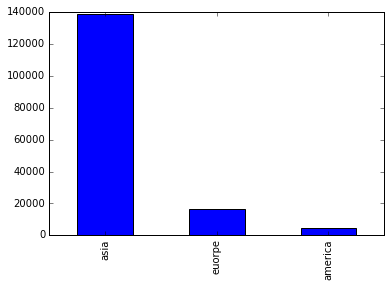

In [9]:
df.x24.value_counts().plot('bar')

In [7]:
df[df.x24.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
5210,-0.364025,-4.506393,7.645077,1.769922,0.231400,1.829309,11.115368,-55.655247,11.131349,2.011766,...,2.964313,-3.411036,-0.376856,1.842917,-0.131755,95.250240,-5.674680,-2.154947,16.557514,0
17289,0.095261,2.269817,-24.253134,-2.845433,4.954117,-10.505069,-35.262235,-9.976514,2.044493,-7.940039,...,-18.778371,-9.964297,-0.273381,-6.160344,-0.018488,-55.893460,-0.712872,1.711422,-9.651947,0
17844,-0.207053,2.724775,-18.175997,4.497731,-3.377169,-2.518833,-26.426534,-3.396776,-9.075536,1.601223,...,-3.094945,-5.387760,-0.202690,-1.195425,-0.183835,-12.006483,0.148091,0.535122,20.698914,0
18156,-0.146275,-5.968589,-9.476670,2.989144,-10.822999,5.995066,-13.778367,47.008513,3.106208,-5.905345,...,-12.506547,4.338810,1.277262,-9.380888,-0.049281,-3.951209,4.465995,-0.172261,-2.926297,1
22032,-0.429348,0.765252,-14.832546,-15.928468,17.620486,1.291650,-21.565408,-31.923220,7.257478,0.244056,...,4.408830,-5.901845,-0.919859,1.242355,-0.544893,-10.028234,-4.628685,0.883964,0.120811,0
25611,0.363907,-5.866806,9.807587,-10.114038,1.600764,15.689561,14.259494,14.035633,2.923251,0.936867,...,25.601481,-2.525292,-0.476684,-4.767721,0.314672,-11.865159,9.102946,3.168309,-17.074937,1
25820,-0.000706,1.932273,-3.883460,-3.087413,1.731789,7.089336,-5.646260,-7.953033,-5.464963,-12.015470,...,1.098883,-1.933138,-1.794798,2.614520,-0.133935,-29.840013,6.165879,0.373030,0.955955,0
27941,0.219924,-4.306307,-7.584208,12.796199,2.034315,0.194260,-11.026868,-13.176084,-4.033980,-10.816127,...,-1.961594,0.476586,4.117523,5.296026,-1.031128,56.317835,10.440011,1.831199,9.017663,1
31112,0.474457,4.397193,-21.771151,-9.642420,-1.720646,-0.331295,-31.653617,-73.341891,5.222198,12.713231,...,10.403302,-13.541115,-2.555547,4.271317,-0.090800,-17.042971,-1.308712,0.752217,-7.953823,1
33247,0.072650,-3.016108,-6.082486,17.605107,4.996767,9.097960,-8.843478,-14.650558,6.017444,-1.901501,...,-4.194881,0.865721,0.694207,8.011157,-0.207016,31.006420,9.086374,0.371348,12.280221,0


In [547]:
df.x25.value_counts()

 0.426519    1
 1.640665    1
-0.732565    1
 0.669497    1
-0.975492    1
-0.930898    1
 0.032443    1
 0.673408    1
 0.079067    1
 1.463964    1
-3.261976    1
 1.383753    1
 0.591628    1
-2.628184    1
-0.290676    1
-1.007066    1
-1.357455    1
 1.397479    1
-0.959303    1
 1.313504    1
-0.718591    1
-1.013468    1
-0.975414    1
-0.407660    1
 0.753779    1
-1.283847    1
-0.199992    1
-0.868805    1
 0.328368    1
 1.038024    1
            ..
-1.560479    1
-0.861747    1
-1.175602    1
 1.421723    1
 4.723026    1
 2.167832    1
 1.343223    1
 0.254822    1
 1.558434    1
-0.583929    1
-1.390383    1
 0.217140    1
 3.554522    1
-0.951928    1
 1.104592    1
-1.753736    1
-0.316916    1
 0.301028    1
-1.571806    1
-1.867831    1
-2.258588    1
 0.420800    1
-1.769082    1
 1.607336    1
-0.654205    1
 0.208006    1
 2.285329    1
-0.894799    1
 0.845209    1
 0.009309    1
Name: x25, dtype: int64

In [548]:
df[df.x25.isnull()]


,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
4420,0.078260,10.844466,30.822352,-2.978554,3.523017,-9.480033,44.813384,16.371233,-10.459884,12.278293,...,-2.510879,5.281758,3.380067,4.687700,0.616356,34.054068,3.036822,-1.911830,-2.072182,1
11485,-0.411365,-6.068105,-22.290233,0.334049,13.816081,7.449918,-32.408324,-82.584504,-13.184758,1.682270,...,-5.918729,-8.239916,0.397311,0.656805,0.740444,40.012040,-4.743224,-2.649856,-0.462594,0
12718,-0.325074,6.965202,-8.203334,-1.579328,-10.011871,2.770421,-11.927031,-40.258811,-10.888866,-8.733842,...,26.032594,-4.992390,-1.173223,-2.918385,-0.627633,-51.456458,-9.153666,-0.529700,-7.284377,1
16021,-0.398451,-14.504008,-4.172541,14.060397,-11.164028,-6.589604,-6.066562,-39.425031,6.943531,-13.056634,...,19.718716,-7.038134,1.950698,5.440285,-0.117395,-5.448443,9.568829,-2.024028,6.582713,1
33294,0.077520,6.861371,-15.309422,-15.826428,-0.932162,-3.428880,-22.258749,8.179330,-1.538904,-2.059247,...,0.969574,3.392445,-0.617550,-5.510527,0.171710,-48.147423,0.994659,-2.286468,4.242656,1
33311,-0.012301,-6.691878,5.652108,-6.275363,2.748860,-7.061981,8.217740,-19.219468,-2.871932,-6.692644,...,4.547371,-1.252344,0.676390,5.842905,-0.396563,-24.433837,-3.141653,0.819762,-14.000939,0
34286,0.069115,-3.641186,-15.838394,-5.315465,1.551956,-10.259504,-23.027835,-40.019873,6.470065,-5.196522,...,15.151359,-8.360775,-0.219725,-1.094533,0.242813,12.231735,-5.613027,2.485714,16.486130,1
36782,0.321780,-3.588019,3.218021,3.730079,3.637052,2.209359,4.678760,-34.331010,8.594554,1.690626,...,39.999791,0.256481,0.349247,0.202321,-0.605961,-41.794407,-2.517390,-2.220591,-12.853081,0
36833,0.287087,-4.479156,0.578403,-11.650279,-3.841874,2.410375,0.840954,-5.151106,0.160163,-6.987845,...,5.353210,3.282550,-1.092242,1.117621,-0.553546,11.969431,1.798249,3.109181,-0.752154,1
41497,-0.350056,-3.249717,4.263171,-0.538869,3.489043,8.724205,6.198331,-19.262256,-6.339940,12.318914,...,13.722103,5.997520,0.392675,-3.770542,-0.224035,18.399025,0.678617,1.651648,7.179664,0


In [549]:
df.x26.value_counts()

 0.199194    1
 1.372099    1
-1.164481    1
-0.237986    1
 0.239962    1
 1.260570    1
 0.735409    1
 0.132811    1
 0.249481    1
 0.176805    1
-1.501038    1
 1.220721    1
 1.269369    1
 0.513934    1
 0.507128    1
 0.482436    1
 0.057275    1
-0.519898    1
-0.513485    1
-1.668153    1
-1.125004    1
-0.285957    1
 0.998144    1
-0.331336    1
 0.363598    1
-0.435667    1
 1.148364    1
 0.816293    1
 0.593761    1
 0.514336    1
            ..
-1.081987    1
-0.113661    1
-0.810305    1
 1.584629    1
 0.007166    1
-0.503093    1
-1.131059    1
 0.419809    1
-0.227763    1
-0.379044    1
 0.190280    1
 0.658725    1
 0.537568    1
 1.379519    1
 0.343198    1
-0.107916    1
-1.136083    1
 0.778419    1
 0.672037    1
-0.209182    1
-0.913827    1
-0.777639    1
-0.952989    1
-0.301222    1
-0.394774    1
-1.282400    1
 1.691021    1
 0.706817    1
-0.028309    1
 0.272761    1
Name: x26, dtype: int64

In [550]:
df.x26.isnull().value_counts()

False    159964
True         36
Name: x26, dtype: int64

In [551]:
df.x27.value_counts()

 2.519829     1
 4.241071     1
 14.871406    1
-5.778525     1
-0.047625     1
-1.903133     1
-1.954619     1
 2.488083     1
 1.496535     1
-5.107811     1
-4.832129     1
 3.085793     1
-19.060327    1
-0.689716     1
-7.370264     1
-4.678128     1
 0.941133     1
 13.689144    1
-11.106720    1
-0.508398     1
 8.188535     1
-7.136706     1
-1.386865     1
 4.325273     1
 9.456611     1
 6.629906     1
-1.698858     1
 1.430792     1
-13.107676    1
 2.787888     1
             ..
 4.238877     1
 0.956549     1
-3.488016     1
-6.509071     1
 1.210127     1
 1.000818     1
 7.082661     1
-1.903420     1
 5.083436     1
-10.916903    1
 1.469696     1
-4.386426     1
 4.303704     1
-3.824827     1
-2.032459     1
 16.115138    1
-2.640011     1
 2.545836     1
-8.496333     1
-6.986165     1
 0.019264     1
-1.232993     1
-17.065694    1
 6.686341     1
-7.527269     1
-5.121315     1
 2.727704     1
 7.324254     1
-10.445719    1
-3.481858     1
Name: x27, dtype: int64

In [552]:
df.x27.isnull().value_counts()

False    159970
True         30
Name: x27, dtype: int64

In [553]:
df.x28.value_counts()

-20.200874    1
 2.644036     1
-5.454864     1
 18.775454    1
-7.394649     1
-16.961690    1
 7.827609     1
 2.975488     1
 13.403553    1
 29.632166    1
-1.746341     1
-2.413494     1
 0.314731     1
 2.412733     1
 9.659860     1
 2.149620     1
 4.206231     1
 3.602460     1
-8.114516     1
-6.535888     1
-7.104641     1
-10.166924    1
 7.178681     1
-9.632055     1
 26.238750    1
 9.717752     1
-5.523440     1
-6.248815     1
-7.405831     1
-23.163480    1
             ..
 7.947481     1
 20.945915    1
-15.758015    1
 5.238081     1
 17.774032    1
-21.709893    1
-2.422578     1
 16.994987    1
-12.008187    1
 17.480804    1
 2.783244     1
 18.099731    1
 14.086126    1
 5.172687     1
-12.318781    1
-12.019978    1
-2.823414     1
-20.537644    1
 27.516825    1
-0.855667     1
-4.690893     1
 27.881302    1
 5.996422     1
-35.728028    1
 12.166832    1
-13.856094    1
 0.879934     1
 10.898167    1
 1.685559     1
-15.821178    1
Name: x28, dtype: int64

In [554]:
df.x28.isnull().value_counts()

False    159965
True         35
Name: x28, dtype: int64

In [555]:
df.x29.value_counts()

July       45569
Jun        41329
Aug        29406
May        21939
sept.      10819
Apr         6761
Oct         2407
Mar         1231
Nov          337
Feb          140
Dev           23
January        9
Name: x29, dtype: int64

In [556]:
df[df.x29.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
126,0.327565,-0.544186,-6.928746,-5.659393,-3.423373,-1.850306,-10.073876,-8.432450,24.492095,-5.653426,...,16.366108,-9.924910,-0.144486,-1.511031,-0.057357,-69.130267,1.264002,0.317753,6.095717,0
1614,0.754582,3.547577,3.016391,-4.063511,-1.563541,-15.661289,4.385607,-12.233037,-2.419313,1.056685,...,-23.273014,-5.703977,-2.930037,-4.218491,0.498004,-49.001582,-6.910098,-3.504388,-44.130320,0
9240,0.579893,12.543018,-5.603496,15.832023,1.864623,2.156928,-8.147063,-8.852715,4.015302,4.678308,...,15.945336,1.791539,3.172283,-10.217638,0.377287,14.125822,-8.246789,1.320902,16.644843,0
20372,-0.195980,-5.278287,-20.016811,6.403927,1.489941,2.635308,-29.102939,-18.046966,-10.120454,5.964603,...,-15.345871,-6.251233,2.064526,-11.764908,1.028098,-19.887005,-3.751193,0.257226,-8.863838,0
20593,-0.432698,-9.654119,2.720042,-2.764139,-6.009950,-12.373923,3.954736,-36.335471,13.942369,-8.018002,...,14.238756,-5.668006,-2.406047,-4.636585,0.092541,-0.847529,3.039395,-2.345329,8.532281,0
29277,-0.428899,6.310499,6.340049,8.930355,0.627894,-0.821358,9.217955,-27.398250,-0.995498,8.372324,...,-5.312917,-3.674797,-1.981527,-4.672900,0.664107,-20.989706,-0.492248,0.606860,-22.333572,0
35972,-0.086555,-4.908538,1.795795,5.956340,8.803897,8.838533,2.610951,-8.189033,-2.319977,5.839300,...,4.678318,1.028224,-2.598314,7.276078,-0.262679,-32.757693,-1.471473,0.200874,-5.742735,0
40002,0.210420,-13.519009,3.846340,-14.798395,-5.916286,7.564040,5.592289,1.294469,2.182063,0.732065,...,33.455212,13.383623,-0.551740,-0.433112,0.395444,57.227899,-2.935692,-0.528141,22.120744,1
43631,-0.215826,-13.889697,-0.025508,-1.328942,0.732773,-6.126059,-0.037087,-36.410395,-0.087889,12.155512,...,11.612752,-6.042821,1.784766,1.882943,-0.297041,-29.678841,-1.148550,0.633554,-14.554421,0
49444,-0.564936,-2.354327,-11.152009,9.745600,7.046710,4.754754,-16.214183,27.783791,-3.054301,7.117610,...,-14.122613,-9.911814,-2.061020,-3.487854,0.482927,-62.107871,-1.602304,1.700965,-17.098522,0


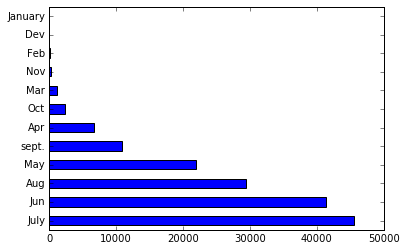

In [10]:
df.x29.value_counts().plot('barh')

In [11]:
df.x29.isnull().value_counts()

False    159970
True         30
Name: x29, dtype: int64

In [4]:
df.x30.value_counts()

wednesday    101535
thurday       29429
tuesday       27954
friday          564
monday          488
Name: x30, dtype: int64

In [5]:
df.x30.isnull().value_counts()

False    159970
True         30
Name: x30, dtype: int64

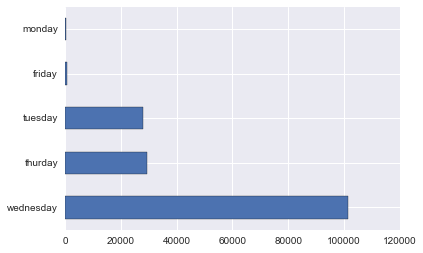

In [733]:
df.x30.value_counts().plot('barh')

In [561]:
df.x31.value_counts()

-0.141389    1
 1.835883    1
 2.175440    1
 2.629331    1
 1.298659    1
-2.494552    1
-0.106326    1
-2.127999    1
 8.548933    1
-4.519642    1
 1.385438    1
 3.327224    1
 0.548893    1
 2.750347    1
 2.147417    1
 3.482234    1
 1.060541    1
 2.164888    1
 2.280122    1
-3.009266    1
 2.931582    1
-3.627090    1
 2.435934    1
-0.355696    1
 4.051703    1
 0.362419    1
 4.771853    1
 0.066626    1
-1.508524    1
 3.999729    1
            ..
-1.312951    1
-4.426940    1
 0.615949    1
-0.523813    1
 2.144519    1
-4.000022    1
 4.424590    1
-0.746348    1
-2.373779    1
 1.490893    1
-1.593795    1
 1.398837    1
 0.362423    1
-0.280037    1
 4.457410    1
 0.760116    1
-1.163310    1
 0.842638    1
-3.645751    1
-2.537566    1
-1.360893    1
 2.823520    1
-2.662058    1
-5.136483    1
 0.922030    1
-0.388250    1
 3.330985    1
-1.805491    1
 1.605089    1
 2.911805    1
Name: x31, dtype: int64

In [562]:
df.x31.isnull().value_counts()

False    159961
True         39
Name: x31, dtype: int64

In [563]:
df.x32.value_counts()

0.01%     40767
-0.01%    34094
0.0%      33923
-0.0%     30492
-0.02%     9924
0.02%      7987
-0.03%     1727
0.03%       855
-0.04%      138
0.04%        55
-0.05%        6
0.05%         1
Name: x32, dtype: int64

In [564]:
df.x32.isnull().value_counts()

False    159969
True         31
Name: x32, dtype: int64

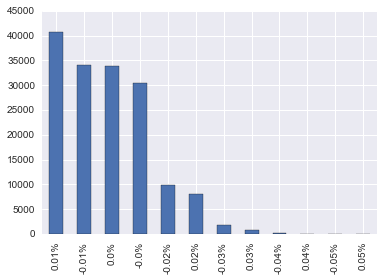

In [565]:
df.x32.value_counts().plot('bar')

In [730]:
df.x33.value_counts()

-2.256428    1
 0.168997    1
-1.006769    1
 1.578600    1
 1.794847    1
-2.016923    1
-1.418589    1
 2.616100    1
-3.454199    1
-0.908488    1
-1.378113    1
 1.714908    1
 2.998573    1
 1.121145    1
 2.468742    1
 2.122882    1
 4.278333    1
 2.111165    1
-4.275165    1
-0.506841    1
 2.194403    1
 0.537839    1
 1.445639    1
-0.734762    1
-3.763931    1
 0.284340    1
 5.346330    1
-1.167805    1
-0.422843    1
 1.089301    1
            ..
 0.447125    1
-1.774094    1
-0.527166    1
-1.784852    1
-2.039044    1
-2.655259    1
-3.769731    1
 1.874720    1
-2.566874    1
-1.479658    1
 0.919955    1
-1.294038    1
 0.336243    1
-0.469190    1
 0.048992    1
-2.242144    1
-0.814170    1
 2.254226    1
-2.638863    1
 1.510084    1
-0.536419    1
 2.301591    1
-0.005858    1
 1.162783    1
 1.403188    1
 3.022838    1
-1.191816    1
 1.975271    1
 0.820372    1
 0.679817    1
Name: x33, dtype: int64

In [731]:
df.x33.isnull().value_counts()

False    159959
True         41
Name: x33, dtype: int64

In [732]:
df.x34.value_counts()

-2.769062     1
-14.304074    1
 2.397050     1
-3.488389     1
-6.506644     1
 1.264350     1
 0.435223     1
 2.674250     1
 7.346482     1
 7.281819     1
-3.113225     1
-1.267789     1
-6.012210     1
 10.694417    1
 6.335974     1
 2.818249     1
-4.392749     1
 0.944733     1
 0.288293     1
 8.162038     1
-11.774472    1
 5.802112     1
 2.667030     1
-9.653013     1
 9.468584     1
 0.709543     1
 2.804233     1
-11.283549    1
-6.589753     1
 4.490703     1
             ..
 2.232983     1
 0.180983     1
 1.910656     1
-3.321824     1
-0.521795     1
 2.255819     1
 11.091229    1
-9.928790     1
 15.125409    1
-1.074071     1
 11.518730    1
 8.380611     1
 11.240132    1
 6.497557     1
 7.383832     1
 5.843577     1
 3.514726     1
-0.216722     1
 0.341166     1
-15.593524    1
-5.272617     1
-6.368169     1
 5.667893     1
 6.278918     1
-2.402288     1
 14.212049    1
-10.131282    1
-0.987583     1
 9.075179     1
 5.210140     1
Name: x34, dtype: int64

In [569]:
df.x34.isnull().value_counts()

False    159959
True         41
Name: x34, dtype: int64

In [570]:
df.x35.value_counts()

-3.229221    1
-1.394693    1
-1.393176    1
-0.934951    1
-0.438916    1
-1.699133    1
 0.964951    1
 0.230531    1
 0.186756    1
 0.899333    1
 0.395169    1
 4.266675    1
 1.113078    1
 2.236358    1
 2.128993    1
-0.287468    1
-0.791639    1
 1.766318    1
 0.954123    1
-2.272029    1
 2.840025    1
-4.416254    1
-2.004399    1
-0.547849    1
-2.859770    1
-4.581627    1
 0.839633    1
-0.399504    1
 1.772655    1
-0.976852    1
            ..
 0.588519    1
-0.977694    1
-3.018106    1
 2.004948    1
 1.758253    1
-0.675392    1
 4.765336    1
 3.085250    1
 3.309085    1
-1.319827    1
-4.584209    1
 0.363038    1
-2.055371    1
-1.365785    1
 4.045526    1
 0.052326    1
 1.032244    1
-1.187311    1
 0.142906    1
-6.144547    1
 2.015750    1
-3.719316    1
 3.474903    1
 0.273748    1
 1.559228    1
-0.328886    1
-0.178458    1
-0.626231    1
 0.664520    1
 1.963765    1
Name: x35, dtype: int64

In [571]:
df.x35.isnull().value_counts()

False    159970
True         30
Name: x35, dtype: int64

In [572]:
df.x36.value_counts()

 2.081043    1
 1.534134    1
 1.262918    1
-1.424386    1
-0.467890    1
 3.067376    1
-2.501887    1
-1.762812    1
 2.552195    1
 1.204754    1
-0.553217    1
 0.414948    1
 0.630184    1
 0.179665    1
-2.507778    1
 2.288319    1
 1.019838    1
-1.875348    1
-0.937092    1
 1.164846    1
 0.220503    1
 0.272049    1
-1.739104    1
-1.956423    1
-4.643730    1
 1.617383    1
-0.864949    1
-0.916903    1
 1.017141    1
 0.746547    1
            ..
-1.758890    1
 0.658422    1
-1.980372    1
-4.660717    1
 0.717890    1
-2.461675    1
 1.755071    1
 0.769921    1
-1.412464    1
 0.284634    1
-1.208583    1
-0.443110    1
 0.728042    1
-1.268637    1
-0.297521    1
-0.404054    1
-3.009149    1
 0.109865    1
 1.469188    1
 1.371983    1
-0.591172    1
-1.589007    1
 0.982025    1
 2.063931    1
 0.599813    1
 2.080899    1
 2.341632    1
 0.720277    1
-2.211699    1
-2.380068    1
Name: x36, dtype: int64

In [573]:
df.x36.isnull().value_counts()

False    159973
True         27
Name: x36, dtype: int64

In [574]:
df.x37.value_counts()

$237.4       6
$-311.26     6
$-336.77     6
$618.22      6
$-415.46     6
$341.26      6
$72.42       6
$-391.18     5
$265.55      5
$387.18      5
$-1117.17    5
$15.62       5
$134.29      5
$518.81      5
$229.66      5
$-61.78      5
$245.78      5
$-304.02     5
$995.07      5
$757.41      5
$-586.03     5
$259.01      5
$-231.0      5
$-1370.36    5
$-990.22     5
$-771.89     5
$-440.21     5
$-371.18     5
$482.41      5
$-369.13     5
            ..
$-843.69     1
$1223.82     1
$-699.82     1
$545.78      1
$-1671.98    1
$-789.08     1
$-617.63     1
$917.88      1
$-1038.61    1
$917.87      1
$-1797.25    1
$-1797.21    1
$-24.33      1
$-24.32      1
$-24.35      1
$1334.49     1
$547.36      1
$-1352.02    1
$547.35      1
$547.33      1
$1249.52     1
$846.11      1
$846.13      1
$2155.92     1
$942.3       1
$139.79      1
$-1671.97    1
$942.7       1
$139.73      1
$-1306.18    1
Name: x37, dtype: int64

In [575]:
df[df.x37.isnull()]


,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
185,0.467498,-0.687684,3.130110,-22.793216,8.519058,-4.889666,4.550944,41.917901,-4.837381,7.213244,...,-12.013702,-4.635228,-2.936636,3.049495,-0.061796,-54.338146,-2.802416,2.224768,-28.947051,1
3981,0.089335,4.549554,7.337850,14.557297,2.455320,8.531141,10.668683,-4.467032,14.779578,4.944751,...,1.823555,2.507097,-0.386100,0.106270,0.654264,4.202945,0.559789,0.760003,-5.650789,0
14339,0.204195,-14.591041,2.221161,5.750377,-4.000775,0.915511,3.229401,43.296470,-0.749765,1.627992,...,-24.657591,1.159974,1.990394,4.327489,0.337136,-2.235030,3.349476,-1.649263,3.006873,1
38686,0.707060,4.643109,6.165906,-2.798968,1.846271,1.705312,8.964765,-15.390228,-13.751553,-0.421520,...,4.333527,-4.357004,-1.599842,2.077177,-0.627062,-19.882269,-1.325202,1.364331,-10.765748,0
48684,0.452561,1.569407,-2.510709,10.396828,-4.253873,-4.144875,-3.650382,-11.309896,-1.511693,2.359536,...,15.097794,-8.247630,-1.179280,3.883736,0.064777,-98.000718,-5.641264,1.656704,-29.040789,0
49644,-0.467181,0.823476,-15.312402,-23.724004,11.068355,0.485772,-22.263082,-58.894775,3.831322,-10.377317,...,13.458014,-10.141232,-2.402666,-3.743172,0.242608,-10.057844,-10.240729,0.612997,10.661735,1
54591,-0.216434,12.227752,-1.702412,0.509604,0.798851,-6.967946,-2.475180,21.522332,1.912482,-9.300037,...,9.246408,-7.752115,-4.019827,2.381175,0.064871,-113.832359,1.425604,2.025138,-18.129716,0
56410,-0.801784,-10.409135,-9.847330,9.659876,-2.337064,-10.091094,-14.317278,26.137196,4.157558,-2.716873,...,-14.132864,2.948785,0.375292,5.159829,-0.456388,-56.995825,4.158889,0.305353,1.827272,1
57687,0.387007,5.841081,9.029129,6.013188,-9.510906,-1.184458,13.127675,-5.694735,1.330592,0.880579,...,8.583946,2.128294,2.192174,3.185252,-0.277696,-17.625103,1.106975,-2.530589,-15.021258,0
64015,0.054467,-14.476737,-1.767010,6.082649,5.057090,-0.591164,-2.569100,1.015974,-11.518332,-8.389417,...,13.172496,1.738826,-1.704019,2.500616,-0.062836,27.337025,-2.805100,1.923544,15.851565,1


In [576]:
df.x37

0          $1313.96
1          $1962.78
2           $430.47
3         $-2366.29
4          $-620.66
5          $-196.45
6          $-241.04
7           $621.35
8          $-301.89
9          $-484.09
10         $-106.65
11         $-622.76
12          $545.55
13         $1019.08
14          $960.95
15          $299.52
16           $72.83
17          $-12.09
18         $1074.27
19         $-426.46
20         $-710.18
21          $370.01
22        $-1199.52
23          $-12.09
24         $2158.38
25          $-464.6
26         $-526.08
27        $-1321.42
28          $771.15
29           $41.97
            ...    
159970      $954.38
159971      $621.19
159972     $1032.85
159973      $729.11
159974      $-167.1
159975      $-33.14
159976     $-409.63
159977     $-126.15
159978      $191.61
159979    $-1356.91
159980      $599.35
159981     $-613.38
159982     $2251.59
159983       $-5.87
159984       $198.3
159985    $-1788.89
159986     $-118.39
159987       $15.62
159988      $134.18


In [577]:
df[df['x37']=='$430.47']

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
2,-0.321707,-1.429819,12.251561,6.586874,-5.304647,-11.311090,17.812850,11.060572,5.325880,-2.632984,...,-0.368491,9.088864,-0.689886,-2.731118,0.754200,30.856417,-7.428573,-2.090804,-7.869421,0
80926,0.566743,8.381339,7.910255,8.495635,-1.361886,16.000296,11.500917,13.333545,3.378748,2.225011,...,1.759913,-5.238690,0.819670,-0.137671,-0.194913,-65.378660,-7.474271,1.076648,-20.862720,0
89797,0.092870,2.009552,5.060011,-20.928854,-8.404062,-14.500006,7.356876,17.732825,15.579088,8.506891,...,-1.466859,1.922321,2.011952,3.186104,0.356596,-23.301260,-4.654691,0.603584,-15.306037,0


In [578]:
df.x38.value_counts()

 15.531643    1
-32.765891    1
 28.192471    1
-11.415361    1
 27.634190    1
-0.668455     1
-7.430366     1
 53.785433    1
-44.731147    1
 23.635153    1
-4.715174     1
 11.423262    1
 9.454306     1
 11.603757    1
 30.162068    1
 11.979792    1
-25.051135    1
 27.004902    1
-18.531164    1
-13.617855    1
 26.802238    1
 6.413928     1
 0.370188     1
 15.527846    1
 18.447339    1
 5.423387     1
 14.550589    1
 36.890238    1
 15.596057    1
 10.191049    1
             ..
 19.073162    1
-13.057240    1
 24.038335    1
 13.813777    1
-15.012405    1
-5.575957     1
-17.670836    1
 21.872936    1
-0.779273     1
-1.664226     1
-4.601964     1
-14.279775    1
 25.142201    1
-1.813162     1
-12.287504    1
 25.590379    1
-8.015357     1
 2.110013     1
 28.426533    1
-7.059213     1
 7.400884     1
 1.217271     1
-19.003871    1
-17.116143    1
-9.918091     1
 6.887609     1
 1.971708     1
 5.213836     1
 13.990816    1
 20.119774    1
Name: x38, dtype: int64

In [579]:
df.x38.isnull().value_counts()

False    159969
True         31
Name: x38, dtype: int64

In [580]:
df.x39.value_counts()

 0.817142     1
 5.511126     1
 10.362026    1
 6.148213     1
-2.355610     1
-0.274147     1
 7.587159     1
-3.661738     1
-0.234346     1
 1.415192     1
-3.408642     1
 0.567265     1
 3.851611     1
 1.794346     1
-6.777288     1
 0.290369     1
 4.067118     1
 2.704328     1
 0.415097     1
-1.127781     1
 1.692847     1
-2.216393     1
-8.593538     1
 5.884903     1
-3.255439     1
 6.031749     1
-3.053924     1
 13.543654    1
-3.459669     1
 7.622414     1
             ..
-0.900895     1
 0.088292     1
-12.091536    1
-6.854539     1
 1.822309     1
 7.548471     1
 4.778996     1
-4.749809     1
-16.035948    1
 7.151614     1
-0.889324     1
-0.987725     1
 8.459863     1
-0.742369     1
 8.027040     1
 3.085737     1
-5.195228     1
 3.322078     1
-12.040164    1
-2.204094     1
 2.267789     1
-6.206382     1
-11.658458    1
-4.492967     1
-2.292474     1
 6.125756     1
 3.628503     1
 4.359587     1
 6.209111     1
 5.948265     1
Name: x39, dtype: int64

In [581]:
df.x39.isnull().value_counts()

False    159977
True         23
Name: x39, dtype: int64

In [582]:
df.x40.value_counts()

 15.779037    1
-7.676228     1
-6.415070     1
 20.533346    1
 11.716952    1
-34.665078    1
 5.814140     1
-17.057833    1
-1.714136     1
-21.056177    1
-16.487779    1
-5.243392     1
 16.923773    1
-36.489369    1
 7.120197     1
-19.717882    1
-23.771921    1
-12.755616    1
-25.446745    1
 9.670881     1
-13.864487    1
 7.390844     1
 19.471816    1
 4.592830     1
 24.366873    1
-14.094174    1
 7.870618     1
 37.017621    1
-7.480187     1
 0.602559     1
             ..
-10.566073    1
-27.324123    1
-10.402640    1
 3.742100     1
-34.088626    1
-33.809748    1
 1.045837     1
-15.740066    1
-4.505980     1
 1.882702     1
 16.475574    1
-6.858947     1
 3.837318     1
 9.221239     1
-23.067603    1
-15.888861    1
 11.508882    1
-15.890719    1
-5.206702     1
 2.603944     1
-14.032370    1
-5.132251     1
-12.437252    1
-12.780710    1
 16.193294    1
 3.405449     1
-24.670439    1
-8.145579     1
-28.910512    1
 24.662926    1
Name: x40, dtype: int64

In [583]:
df.x40.isnull().value_counts()

False    159964
True         36
Name: x40, dtype: int64

In [584]:
df.x41.value_counts()

-18.961464    1
 13.840473    1
-11.723818    1
 4.529367     1
 12.984581    1
 6.058890     1
-6.160072     1
 17.995178    1
 59.129919    1
 15.863949    1
 20.986473    1
 30.019279    1
 31.143265    1
-21.117874    1
-17.572296    1
 9.676178     1
-1.988236     1
-19.977173    1
 28.451975    1
 22.634819    1
-4.545127     1
-14.575138    1
 4.557720     1
 2.069705     1
 31.540482    1
 15.469910    1
 17.628823    1
-2.381379     1
 21.699036    1
 4.461853     1
             ..
-1.980733     1
 37.879940    1
 24.755341    1
-13.839822    1
 2.005569     1
 10.992759    1
 36.899132    1
 9.414116     1
-12.331256    1
 14.072070    1
-3.767523     1
 3.675137     1
-24.066332    1
-8.701443     1
-13.680276    1
 26.302558    1
 19.779809    1
 14.784018    1
 13.199542    1
 23.168173    1
 12.690326    1
 26.306975    1
 16.625910    1
-22.495119    1
 16.959876    1
-5.181340     1
 56.088101    1
-7.306284     1
-14.127683    1
 0.621978     1
Name: x41, dtype: int64

In [585]:
df.x41.isnull().value_counts()

False    159960
True         40
Name: x41, dtype: int64

In [586]:
df.x42.value_counts()

-6.624523     1
-5.267761     1
-5.336473     1
-3.195311     1
-6.525636     1
 2.960583     1
 0.646079     1
 7.372056     1
 0.714069     1
 4.464642     1
-3.837872     1
-3.980581     1
 4.494600     1
-20.649464    1
-1.898880     1
-7.335991     1
-2.316890     1
-5.150762     1
-1.892282     1
-2.963790     1
-11.591373    1
 5.593668     1
 4.913414     1
-2.975728     1
-16.642231    1
 4.069770     1
 1.575318     1
 8.037569     1
-7.471175     1
-0.461123     1
             ..
-3.271381     1
-6.139663     1
-2.442179     1
-1.928839     1
 1.691719     1
 0.199194     1
-9.817357     1
-0.904851     1
 7.714938     1
 4.086221     1
 0.492013     1
-4.747039     1
-1.240332     1
 4.785179     1
 3.761460     1
-8.128988     1
 4.901254     1
-8.826017     1
-13.246008    1
-1.766409     1
-0.412134     1
 8.581785     1
-1.488388     1
 1.511938     1
 3.668236     1
-6.637078     1
-8.856787     1
 1.674654     1
-0.823200     1
 12.435841    1
Name: x42, dtype: int64

In [587]:
df.x42.isnull().value_counts()

False    159974
True         26
Name: x42, dtype: int64

In [588]:
df.x43.value_counts()

 0.059963    1
 1.604073    1
 0.372736    1
-0.625888    1
 0.235729    1
-1.701094    1
-1.601046    1
 0.366084    1
 1.006926    1
-0.793516    1
-0.325307    1
 0.920867    1
 1.519602    1
-0.263658    1
-1.569004    1
 0.268448    1
-0.242540    1
 0.642721    1
-0.539527    1
-0.819605    1
-3.158415    1
 0.399832    1
-0.463671    1
 0.975763    1
 0.264524    1
-1.295223    1
 0.066151    1
-1.716617    1
 0.965676    1
-0.733867    1
            ..
-0.396444    1
 0.099577    1
-0.314872    1
-0.309237    1
 1.803549    1
 2.635210    1
 4.063433    1
-4.381439    1
-2.596722    1
 2.444769    1
 0.924203    1
 1.131841    1
-0.728137    1
-1.003502    1
 1.706638    1
 1.794003    1
 0.472400    1
 0.012723    1
-0.082436    1
-0.504574    1
-0.308361    1
 1.305009    1
-0.423034    1
-0.664948    1
-2.611455    1
-0.955203    1
 2.055770    1
 2.762936    1
 0.423559    1
 1.426730    1
Name: x43, dtype: int64

In [589]:
df.x43.isnull().value_counts()

False    159963
True         37
Name: x43, dtype: int64

In [590]:
df.x44.value_counts()

 1.359872     1
-5.874332     1
 1.001246     1
 4.384508     1
 1.240316     1
-2.095806     1
-1.075560     1
 5.207682     1
 3.383789     1
 5.033989     1
 0.340634     1
-2.823935     1
-2.478642     1
-2.487091     1
 10.210562    1
-3.315617     1
 2.921145     1
-4.323992     1
-4.247131     1
-3.513805     1
-1.256575     1
-2.318503     1
-1.804081     1
-1.424018     1
 6.548021     1
 3.096944     1
-3.538354     1
-4.762321     1
 4.696158     1
-3.184009     1
             ..
-0.418822     1
 4.103625     1
-2.308743     1
-0.643756     1
-7.740225     1
-1.536858     1
 1.426253     1
 5.143046     1
 5.823962     1
-3.478973     1
 2.187782     1
 3.567981     1
 0.755620     1
 3.653524     1
-3.668433     1
-3.999212     1
 1.008257     1
-3.778263     1
-3.153959     1
-0.869765     1
-3.426034     1
 0.653961     1
 0.654001     1
 0.008220     1
 0.715083     1
-0.830701     1
-3.551335     1
 1.301914     1
 6.195402     1
-3.496780     1
Name: x44, dtype: int64

In [591]:
df.x44.isnull().value_counts()

False    159960
True         40
Name: x44, dtype: int64

In [592]:
df.x45.value_counts()

 0.662658    1
-0.286481    1
 0.388563    1
-0.404012    1
 0.466235    1
-0.350275    1
-0.118982    1
-0.294908    1
-0.006434    1
 0.152380    1
 0.213429    1
 0.281852    1
 0.632791    1
 1.046119    1
-0.159220    1
 0.360240    1
-0.130812    1
-0.009958    1
 0.668461    1
 0.668214    1
-0.183558    1
 0.488944    1
-0.135828    1
 0.201303    1
 0.036119    1
-0.442829    1
 0.096358    1
 0.379107    1
 0.957482    1
 0.653382    1
            ..
 0.356468    1
-0.155807    1
-0.184124    1
-0.436968    1
 0.022573    1
 0.157603    1
-0.217057    1
-0.320544    1
 0.318811    1
 0.223027    1
 0.132169    1
 0.249268    1
 0.646898    1
-0.483757    1
 0.853994    1
 0.795342    1
-0.757376    1
-0.214587    1
 0.433053    1
 0.037029    1
 0.198078    1
-0.221285    1
 0.265136    1
-0.149167    1
 0.491713    1
 0.209857    1
 0.215756    1
-0.029657    1
 0.151232    1
-0.114926    1
Name: x45, dtype: int64

In [593]:
df.x45.isnull().value_counts()

False    159971
True         29
Name: x45, dtype: int64

In [594]:
df.x46.value_counts()

-2.296283     1
-71.979516    1
-27.954453    1
-26.867287    1
 25.094451    1
 47.957915    1
-62.373247    1
 52.557478    1
-55.520496    1
-34.106417    1
 16.018577    1
 33.593107    1
-99.570286    1
-28.951211    1
 45.927496    1
-58.748629    1
-22.061738    1
-57.913042    1
 23.645839    1
-24.002457    1
 19.514163    1
-12.625656    1
 28.642509    1
-52.332499    1
-18.364250    1
 39.936660    1
-55.513550    1
-10.600033    1
-38.613297    1
-26.452218    1
             ..
 5.007024     1
-96.934283    1
-11.416685    1
-79.643290    1
-0.797863     1
-41.185399    1
 3.679847     1
-27.720935    1
-63.933462    1
 11.648289    1
-70.576466    1
-52.661930    1
-31.326044    1
-7.197072     1
 9.881618     1
 9.450572     1
-6.017525     1
-30.558123    1
-23.094309    1
-53.416721    1
 63.165112    1
-6.551598     1
-39.887012    1
-24.086908    1
-28.118219    1
-13.435346    1
 17.085333    1
 40.843426    1
-21.583056    1
-41.189814    1
Name: x46, dtype: int64

In [595]:
df.x46.isnull().value_counts()

False    159969
True         31
Name: x46, dtype: int64

In [596]:
df.x47.value_counts()

 1.289854     1
 5.132495     1
 5.309282     1
-2.441095     1
 1.448175     1
-4.618977     1
-2.624225     1
 4.527896     1
 5.246215     1
 3.305255     1
 1.590456     1
 1.507322     1
-0.291440     1
 1.458828     1
 8.871013     1
-4.676961     1
 2.247900     1
-1.518674     1
 3.228850     1
-0.080250     1
 2.851638     1
-3.450375     1
-3.300980     1
-3.737872     1
-3.036270     1
 1.707592     1
-8.832101     1
 2.858904     1
 4.501001     1
 1.293632     1
             ..
-2.447623     1
 0.657791     1
 3.752743     1
-0.565765     1
-4.202358     1
 5.934626     1
 1.038039     1
-1.707566     1
 5.976348     1
 0.987790     1
 6.448813     1
 9.155390     1
 0.722027     1
-0.448724     1
-7.153009     1
 3.049977     1
-4.864030     1
-7.023258     1
 1.972243     1
-7.393583     1
-2.424300     1
 4.568512     1
 6.512133     1
 3.512985     1
 2.745664     1
-9.185168     1
 3.444743     1
 0.213262     1
-1.769224     1
 10.789021    1
Name: x47, dtype: int64

In [597]:
df.x47.isnull().value_counts()

False    159963
True         37
Name: x47, dtype: int64

In [598]:
df.x48.value_counts()

 2.212401    1
 3.065862    1
-1.246461    1
-0.300812    1
-0.450369    1
 0.640959    1
 1.166373    1
-1.970849    1
 1.573387    1
 0.348249    1
-0.167637    1
-2.156335    1
 1.789813    1
-1.519143    1
 0.265874    1
-1.982010    1
-3.024910    1
 0.757038    1
 2.311788    1
-0.611700    1
-0.079427    1
 2.063077    1
 0.248625    1
 0.271547    1
-4.190337    1
 1.052464    1
 0.528808    1
 2.127803    1
 3.469122    1
 0.013879    1
            ..
 0.351206    1
 0.126267    1
-2.132717    1
 2.538196    1
 0.466230    1
-0.588569    1
-1.396481    1
 0.690443    1
 0.868113    1
 2.771389    1
 0.284850    1
-1.082715    1
 3.138938    1
 1.522369    1
 1.687665    1
 2.672182    1
-1.331352    1
-3.645387    1
-0.659154    1
 1.770286    1
 0.473669    1
 0.874980    1
-0.153680    1
-3.493509    1
-0.834410    1
-4.337859    1
-0.715691    1
-0.002006    1
 1.570939    1
-1.017607    1
Name: x48, dtype: int64

In [599]:
df.x48.isnull().value_counts()

False    159968
True         32
Name: x48, dtype: int64

In [600]:
df.x49.value_counts()

 18.793192    1
-1.354043     1
 13.856544    1
 11.406257    1
 2.448964     1
-3.485172     1
 4.980289     1
 7.903228     1
-10.329953    1
-10.831845    1
 16.275071    1
 13.788589    1
 14.840533    1
 27.122328    1
 7.234394     1
 17.562864    1
 8.320830     1
-7.585314     1
-9.611573     1
-9.337708     1
 3.419083     1
 7.989186     1
-3.940918     1
-9.725419     1
-8.368741     1
-23.276750    1
-3.035468     1
 16.317790    1
-11.616120    1
 0.492969     1
             ..
-2.006240     1
 22.061759    1
-8.030659     1
-21.786827    1
-4.217873     1
 17.524405    1
-2.649407     1
 1.353291     1
-4.981303     1
 28.976370    1
 9.198660     1
-2.614144     1
 40.957735    1
-10.874527    1
 16.387512    1
-1.754674     1
-17.906251    1
 8.657176     1
-18.829949    1
 7.472196     1
 9.114345     1
 6.659042     1
 37.640822    1
 8.416457     1
 7.048330     1
-2.833468     1
-1.759824     1
-33.094728    1
-23.236722    1
-19.702606    1
Name: x49, dtype: int64

In [601]:
df.x49.isnull().value_counts()

False    159968
True         32
Name: x49, dtype: int64

In [14]:
df.y.value_counts()


0    95803
1    64197
Name: y, dtype: int64

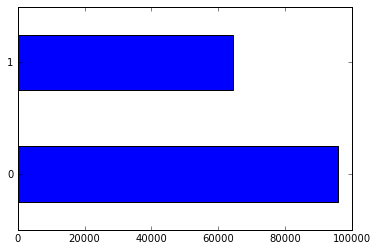

In [15]:
df.y.value_counts().plot('barh')

In [14]:
df.y.isnull().value_counts()

False    160000
Name: y, dtype: int64

In [604]:
df

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
0,-0.166563,-3.961588,4.621113,2.481908,-1.800135,0.804684,6.718751,-14.789997,-1.040673,-4.204950,...,-1.497117,5.414063,-2.325655,1.674827,-0.264332,60.781427,-7.689696,0.151589,-8.040166,0
1,-0.149894,-0.585676,27.839856,4.152333,6.426802,-2.426943,40.477058,-6.725709,0.896421,0.330165,...,36.292790,4.490915,0.762561,6.526662,1.007927,15.805696,-4.896678,-0.320283,16.719974,0
2,-0.321707,-1.429819,12.251561,6.586874,-5.304647,-11.311090,17.812850,11.060572,5.325880,-2.632984,...,-0.368491,9.088864,-0.689886,-2.731118,0.754200,30.856417,-7.428573,-2.090804,-7.869421,0
3,-0.245594,5.076677,-24.149632,3.637307,6.505811,2.290224,-35.111751,-18.913592,-0.337041,-5.568076,...,15.691546,-7.467775,2.940789,-6.424112,0.419776,-72.424569,5.361375,1.806070,-7.670847,0
4,-0.273366,0.306326,-11.352593,1.676758,2.928441,-0.616824,-16.505817,27.532281,1.199715,-4.309105,...,-13.911297,-5.229937,1.783928,3.957801,-0.096988,-14.085435,-0.208351,-0.894942,15.724742,1
5,-0.226706,11.350364,10.831367,5.182092,-2.236454,10.716248,15.747993,-15.900329,-0.178002,10.901306,...,-7.250310,6.402343,-2.064860,0.923879,0.331452,19.172365,5.752749,-2.609553,-20.320179,0
6,-0.431246,-0.974762,-7.412661,-0.930500,-1.265166,14.265374,-10.777451,5.523324,-11.757423,-1.932222,...,-15.596731,-7.779833,-1.153986,-1.081095,-0.538983,1.573406,2.102627,-2.966103,4.604337,1
7,-0.135071,8.524648,-6.731169,-13.374530,-0.079429,-9.511618,-9.786614,-11.663750,8.783823,-0.904801,...,19.780494,-3.711105,-3.134008,-5.805255,0.966762,6.639034,6.258786,1.272556,13.186184,1
8,0.026694,-5.770476,0.774836,4.718855,4.816484,9.501880,1.126553,25.186840,4.650334,11.786198,...,-26.215235,0.330604,-2.015631,2.219910,0.533815,-2.627660,0.182319,3.140230,14.495677,0
9,-0.349073,3.334116,-3.355872,-0.796302,-0.900425,-7.620448,-4.879186,-16.972020,10.894596,9.426504,...,19.267232,-0.675888,-2.560935,1.326146,0.444997,-20.942887,-3.141996,-1.608473,7.169219,1


In [18]:
df= df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

In [19]:
df.isnull().sum()

x0     0
x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
x11    0
x12    0
x13    0
x14    0
x15    0
x16    0
x17    0
x18    0
x19    0
x20    0
x21    0
x22    0
x23    0
x24    0
x25    0
x26    0
x27    0
x28    0
x29    0
x30    0
x31    0
x32    0
x33    0
x34    0
x35    0
x36    0
x37    0
x38    0
x39    0
x40    0
x41    0
x42    0
x43    0
x44    0
x45    0
x46    0
x47    0
x48    0
x49    0
y      0
dtype: int64

In [20]:

yy=df['y']
df = df.drop(['y'], axis=1)

In [21]:
df.dtypes

x0     float64
x1     float64
x2     float64
x3     float64
x4     float64
x5     float64
x6     float64
x7     float64
x8     float64
x9     float64
x10    float64
x11    float64
x12    float64
x13    float64
x14    float64
x15    float64
x16    float64
x17    float64
x18    float64
x19    float64
x20    float64
x21    float64
x22    float64
x23    float64
x24     object
x25    float64
x26    float64
x27    float64
x28    float64
x29     object
x30     object
x31    float64
x32     object
x33    float64
x34    float64
x35    float64
x36    float64
x37     object
x38    float64
x39    float64
x40    float64
x41    float64
x42    float64
x43    float64
x44    float64
x45    float64
x46    float64
x47    float64
x48    float64
x49    float64
dtype: object

In [22]:

clean_col = ['x32']
def remove_extra_characters(df,cols):
    df=df.copy()
    for col in cols:
        df[col] = df[col].str.replace('$','').str.replace('%','').astype(float)
        return df
df = remove_extra_characters(df,clean_col)

In [23]:
df.x32

0         0.00
1        -0.02
2        -0.01
3         0.01
4         0.01
5        -0.01
6        -0.01
7         0.01
8        -0.03
9         0.01
10        0.01
11        0.02
12        0.01
13       -0.01
14       -0.00
15       -0.01
16       -0.01
17       -0.00
18        0.00
19       -0.00
20       -0.02
21       -0.01
22        0.01
23       -0.00
24        0.00
25        0.02
26        0.01
27        0.01
28       -0.02
30        0.02
          ... 
159970   -0.01
159971   -0.01
159972    0.02
159973    0.01
159974    0.02
159975   -0.01
159976    0.00
159977    0.02
159978    0.01
159979   -0.00
159980   -0.01
159981   -0.00
159982   -0.02
159983   -0.00
159984   -0.01
159985    0.00
159986    0.01
159987    0.01
159988   -0.01
159989   -0.01
159990    0.00
159991    0.01
159992   -0.00
159993   -0.01
159994   -0.02
159995    0.00
159996   -0.01
159997   -0.00
159998   -0.02
159999    0.02
Name: x32, dtype: float64

In [24]:
clean_coll = ['x37']
def remove_extra_characters(df,cols):
    df=df.copy()
    for col in cols:
        df[col] = df[col].str.replace('$','').str.replace('%','').astype(float)
        return df
df = remove_extra_characters(df,clean_coll)

In [25]:
df.x37

0         1313.96
1         1962.78
2          430.47
3        -2366.29
4         -620.66
5         -196.45
6         -241.04
7          621.35
8         -301.89
9         -484.09
10        -106.65
11        -622.76
12         545.55
13        1019.08
14         960.95
15         299.52
16          72.83
17         -12.09
18        1074.27
19        -426.46
20        -710.18
21         370.01
22       -1199.52
23         -12.09
24        2158.38
25        -464.60
26        -526.08
27       -1321.42
28         771.15
30        -389.97
           ...   
159970     954.38
159971     621.19
159972    1032.85
159973     729.11
159974    -167.10
159975     -33.14
159976    -409.63
159977    -126.15
159978     191.61
159979   -1356.91
159980     599.35
159981    -613.38
159982    2251.59
159983      -5.87
159984     198.30
159985   -1788.89
159986    -118.39
159987      15.62
159988     134.18
159989    -677.95
159990   -1012.45
159991   -1720.76
159992   -1177.33
159993    -818.32
159994    

In [26]:
 
categorical_variables = ['x24','x29','x30','x32']
for variable in categorical_variables:
    # Create dummies
    dummies = pd.get_dummies(df[variable], prefix=variable)
    # Update X to include dummies and drop the main variable
    df = pd.concat([df, dummies], axis=1)
    df.drop([variable], axis=1, inplace=True)

In [27]:
df.columns

Index([u'x0', u'x1', u'x2', u'x3', u'x4', u'x5', u'x6', u'x7', u'x8', u'x9',
       u'x10', u'x11', u'x12', u'x13', u'x14', u'x15', u'x16', u'x17', u'x18',
       u'x19', u'x20', u'x21', u'x22', u'x23', u'x25', u'x26', u'x27', u'x28',
       u'x31', u'x33', u'x34', u'x35', u'x36', u'x37', u'x38', u'x39', u'x40',
       u'x41', u'x42', u'x43', u'x44', u'x45', u'x46', u'x47', u'x48', u'x49',
       u'x24_america', u'x24_asia', u'x24_euorpe', u'x29_Apr', u'x29_Aug',
       u'x29_Dev', u'x29_Feb', u'x29_January', u'x29_July', u'x29_Jun',
       u'x29_Mar', u'x29_May', u'x29_Nov', u'x29_Oct', u'x29_sept.',
       u'x30_friday', u'x30_monday', u'x30_thurday', u'x30_tuesday',
       u'x30_wednesday', u'x32_-0.05', u'x32_-0.04', u'x32_-0.03',
       u'x32_-0.02', u'x32_-0.01', u'x32_0.0', u'x32_0.01', u'x32_0.02',
       u'x32_0.03', u'x32_0.04', u'x32_0.05'],
      dtype='object')

In [28]:
yy

0         0
1         0
2         0
3         0
4         1
5         0
6         1
7         1
8         0
9         1
10        1
11        0
12        0
13        1
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        1
23        0
24        1
25        0
26        0
27        0
28        1
30        0
         ..
159970    1
159971    0
159972    0
159973    1
159974    1
159975    0
159976    0
159977    1
159978    0
159979    0
159980    0
159981    1
159982    1
159983    0
159984    1
159985    0
159986    1
159987    0
159988    0
159989    1
159990    1
159991    0
159992    0
159993    0
159994    0
159995    1
159996    0
159997    1
159998    0
159999    1
Name: y, dtype: int64

In [37]:
df.columns

Index([u'x0', u'x1', u'x2', u'x3', u'x4', u'x5', u'x6', u'x7', u'x8', u'x9',
       u'x10', u'x11', u'x12', u'x13', u'x14', u'x15', u'x16', u'x17', u'x18',
       u'x19', u'x20', u'x21', u'x22', u'x23', u'x25', u'x26', u'x27', u'x28',
       u'x31', u'x33', u'x34', u'x35', u'x36', u'x37', u'x38', u'x39', u'x40',
       u'x41', u'x42', u'x43', u'x44', u'x45', u'x46', u'x47', u'x48', u'x49',
       u'x24_america', u'x24_asia', u'x24_euorpe', u'x29_Apr', u'x29_Aug',
       u'x29_Dev', u'x29_Feb', u'x29_January', u'x29_July', u'x29_Jun',
       u'x29_Mar', u'x29_May', u'x29_Nov', u'x29_Oct', u'x29_sept.',
       u'x30_friday', u'x30_monday', u'x30_thurday', u'x30_tuesday',
       u'x30_wednesday', u'x32_-0.05', u'x32_-0.04', u'x32_-0.03',
       u'x32_-0.02', u'x32_-0.01', u'x32_0.0', u'x32_0.01', u'x32_0.02',
       u'x32_0.03', u'x32_0.04', u'x32_0.05'],
      dtype='object')

Cleaning the test data too

In [30]:
dftest=pd.read_csv("midterm_test.csv")

In [31]:
dftest

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
0,-0.522582,1.285266,-3.211278,6.435478,-3.355995,-6.222153,-4.668957,26.648275,-9.493768,-15.919583,...,6.597750,-0.197808,-4.138974,1.148979,0.127080,-0.032610,-39.456039,-0.623131,0.405111,0.565209
1,-0.327133,-2.874201,-8.628286,-4.543222,-0.687731,-0.306087,-12.544880,9.719749,-14.072453,3.763146,...,6.235120,-11.226443,-1.727902,2.983166,5.918433,-0.207522,-15.453140,-5.715456,2.596948,-13.330898
2,-0.173731,-11.401446,7.633143,7.298406,-5.554917,-17.192158,11.098016,-41.911009,12.719480,-7.320119,...,-13.414719,28.987108,-3.532879,0.806915,0.476301,0.154757,-63.918116,1.310607,0.609384,-21.962528
3,-0.130836,4.716583,-18.537297,-2.334537,-3.697804,-0.162074,-26.951837,-21.238950,3.145513,0.661810,...,2.890234,5.023080,-7.140230,0.208304,3.621499,-0.386714,-66.901730,-1.991627,1.363681,-1.916557
4,0.035572,-0.141469,7.792464,-4.398339,0.823660,-0.665133,11.329657,-12.837209,-5.064350,-3.699563,...,-8.381609,-2.068961,8.671673,1.373791,-1.182293,-0.110082,46.273615,2.625769,-3.100504,-1.482507
5,0.171480,1.376789,-12.157398,0.552619,-2.565093,-5.471192,-17.675943,-28.142754,-2.641366,-10.103862,...,-20.249716,14.552549,-2.978953,-0.779675,1.573042,0.259196,-16.043420,-1.172671,0.477270,15.741580
6,0.272986,6.858258,32.283563,2.005428,-10.277287,-8.216530,46.937875,-2.531384,12.522623,6.830416,...,40.997333,12.510416,-9.898307,-1.171959,4.871360,0.387223,7.187808,-3.958831,-4.062299,-7.968791
7,-0.521643,2.175613,10.731249,-2.015805,-6.392855,-12.386190,15.602430,41.930868,-2.728404,3.964700,...,-6.272856,6.126906,2.922622,1.741650,-0.218311,0.448858,-4.305244,-1.644386,-1.354346,6.544092
8,-0.328042,0.982469,6.182135,1.817593,-6.348914,-2.574139,8.988360,-2.080090,-3.697630,-5.189804,...,-4.448844,0.514294,-4.065301,-1.174008,-2.517373,-0.792455,-17.384473,-4.436931,-2.251284,6.867929
9,0.247553,3.381052,-2.453479,0.724840,11.503477,-0.781279,-3.567174,-27.943328,-9.035508,0.339077,...,6.838137,13.237526,-5.773433,1.354999,-6.932841,-0.001768,-31.085008,-3.526374,-2.940867,-7.870876


In [154]:
df

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x32_-0.04,x32_-0.03,x32_-0.02,x32_-0.01,x32_0.0,x32_0.01,x32_0.02,x32_0.03,x32_0.04,x32_0.05
0,-0.166563,-3.961588,4.621113,2.481908,-1.800135,0.804684,6.718751,-14.789997,-1.040673,-4.204950,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,-0.149894,-0.585676,27.839856,4.152333,6.426802,-2.426943,40.477058,-6.725709,0.896421,0.330165,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.321707,-1.429819,12.251561,6.586874,-5.304647,-11.311090,17.812850,11.060572,5.325880,-2.632984,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.245594,5.076677,-24.149632,3.637307,6.505811,2.290224,-35.111751,-18.913592,-0.337041,-5.568076,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-0.273366,0.306326,-11.352593,1.676758,2.928441,-0.616824,-16.505817,27.532281,1.199715,-4.309105,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,-0.226706,11.350364,10.831367,5.182092,-2.236454,10.716248,15.747993,-15.900329,-0.178002,10.901306,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,-0.431246,-0.974762,-7.412661,-0.930500,-1.265166,14.265374,-10.777451,5.523324,-11.757423,-1.932222,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,-0.135071,8.524648,-6.731169,-13.374530,-0.079429,-9.511618,-9.786614,-11.663750,8.783823,-0.904801,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8,0.026694,-5.770476,0.774836,4.718855,4.816484,9.501880,1.126553,25.186840,4.650334,11.786198,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,-0.349073,3.334116,-3.355872,-0.796302,-0.900425,-7.620448,-4.879186,-16.972020,10.894596,9.426504,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [155]:
160000.0/40000.0

4.0

In [156]:
dftest.columns

Index([u'x0', u'x1', u'x2', u'x3', u'x4', u'x5', u'x6', u'x7', u'x8', u'x9',
       u'x10', u'x11', u'x12', u'x13', u'x14', u'x15', u'x16', u'x17', u'x18',
       u'x19', u'x20', u'x21', u'x22', u'x23', u'x24', u'x25', u'x26', u'x27',
       u'x28', u'x29', u'x30', u'x31', u'x32', u'x33', u'x34', u'x35', u'x36',
       u'x37', u'x38', u'x39', u'x40', u'x41', u'x42', u'x43', u'x44', u'x45',
       u'x46', u'x47', u'x48', u'x49'],
      dtype='object')

In [616]:
dftest.x0.value_counts()

-0.297201    1
 0.055615    1
-0.056813    1
-0.587128    1
-0.225062    1
 0.067805    1
-0.141105    1
 0.501502    1
 0.117110    1
-0.134728    1
 0.417888    1
-0.151998    1
 0.247180    1
-0.070858    1
-0.766266    1
-0.042246    1
 0.312202    1
-0.532647    1
 0.490303    1
 0.387029    1
 0.331749    1
-0.063778    1
 0.354024    1
 0.236518    1
-0.136811    1
 0.045901    1
 0.130437    1
-0.025346    1
 0.016609    1
 0.027348    1
            ..
 0.277591    1
 0.472349    1
 0.130139    1
 0.188110    1
-0.761910    1
 0.514400    1
 0.215783    1
 0.502710    1
 0.491636    1
 0.428894    1
-0.069762    1
-0.343846    1
 0.186027    1
-0.104902    1
-0.503138    1
 0.362882    1
 0.038689    1
-0.262290    1
-0.839907    1
-0.140012    1
-0.209302    1
-0.238912    1
 0.344150    1
 0.403922    1
 0.314471    1
-0.034575    1
 0.157389    1
-0.643592    1
 0.654092    1
 0.439498    1
Name: x0, dtype: int64

In [617]:

dftest.x0.isnull().value_counts()

False    39993
True         7
Name: x0, dtype: int64

In [618]:
dftest[dftest.x0.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
736,NaN,-0.972032,-7.497928,-8.889392,4.114729,8.708614,-10.901424,14.219227,2.365589,1.015814,...,-33.366429,-16.437833,5.415697,1.082095,-2.344104,-0.126789,60.227866,-1.341787,0.705265,34.863418
4032,NaN,-13.278531,5.224180,8.031379,7.113948,-5.632316,7.595565,-76.814738,-4.694638,0.109942,...,2.279536,41.387411,-1.036445,1.235281,-6.257549,0.234067,46.315930,1.809038,3.355514,-3.179534
7341,NaN,-6.558542,2.574010,-5.177709,-0.575634,-4.037961,3.742417,13.571069,-4.025349,-3.841779,...,9.998477,19.228422,0.448871,-1.123461,-13.579642,-0.410003,-30.357167,-0.070304,3.427604,2.211305
9032,NaN,-1.363026,-14.511737,0.014416,2.383576,-8.438714,-21.098975,-21.175594,-13.332358,-7.076027,...,-10.474286,-0.586843,-1.690052,1.508175,1.888408,-0.268737,12.802009,-7.640010,0.374037,-0.366724
9252,NaN,3.873243,-14.970597,-1.280473,8.085783,10.393555,-21.766123,-44.365444,0.959803,0.636768,...,9.127374,16.152568,-3.637118,-0.610477,3.264251,0.198148,38.169067,5.052202,2.127707,13.958758
13338,NaN,1.514532,17.225170,-2.846814,8.971908,-7.671505,25.044102,40.794087,-3.598263,3.693619,...,29.167205,3.784944,-6.152614,-0.328858,-4.812709,0.123806,-40.772783,-2.244247,-1.888849,5.156692
19109,NaN,2.812956,-21.902109,7.118919,2.831426,21.085432,-31.844020,-47.480635,-10.711584,-3.334840,...,-25.676721,-16.657183,-5.709473,2.770588,1.125649,0.121068,50.866204,1.021700,-1.844232,1.877765


In [619]:
dftest.x1.value_counts()

-0.857253     1
-0.366058     1
 4.685951     1
 3.780006     1
 0.331123     1
-2.433616     1
-2.997420     1
-1.075718     1
-0.197745     1
 8.710107     1
 0.941777     1
-2.961944     1
 3.628807     1
 3.604640     1
-10.251086    1
 5.685603     1
 8.688688     1
 9.405694     1
-3.988256     1
 5.722287     1
-4.188821     1
 2.636770     1
-1.202100     1
 4.950813     1
-5.656064     1
 0.892295     1
-5.719802     1
-1.673408     1
 6.747569     1
-1.781684     1
             ..
-2.953893     1
-5.833135     1
-4.582551     1
 7.008429     1
-6.386993     1
 1.664431     1
 2.701715     1
-0.227442     1
-5.832101     1
-5.583971     1
-0.015594     1
 9.360301     1
-1.863768     1
 7.791092     1
 4.283431     1
-3.870251     1
 6.717861     1
 0.285316     1
 5.136580     1
 0.076120     1
-4.316410     1
-8.776164     1
 7.547509     1
 7.789759     1
 6.884703     1
 3.919544     1
 0.221623     1
-6.067342     1
 7.880747     1
-8.373531     1
Name: x1, dtype: int64

In [620]:
dftest.x1.isnull().value_counts()

False    39995
True         5
Name: x1, dtype: int64

In [621]:
dftest.x2.value_counts()

-8.494850     1
-3.991440     1
 10.882384    1
 5.646838     1
 12.562904    1
 20.250310    1
 7.160596     1
-0.221731     1
 0.766800     1
-18.998492    1
 2.202639     1
 5.777984     1
-10.594610    1
 0.382804     1
 12.845000    1
 13.444941    1
-11.993436    1
 1.611436     1
 1.445503     1
 19.584607    1
-10.207176    1
-6.120494     1
-1.411525     1
 18.548597    1
 3.932421     1
 5.193700     1
 13.434727    1
 10.212484    1
 7.096939     1
-4.275580     1
             ..
 1.773391     1
 1.527586     1
 0.628326     1
 9.747911     1
-8.659584     1
 12.341024    1
-2.415218     1
 21.043871    1
-14.945600    1
-4.389767     1
 12.284662    1
-23.682950    1
-6.648040     1
-14.335143    1
 16.058299    1
-9.060271     1
-2.023803     1
 11.200750    1
-1.194602     1
 16.870741    1
-3.763417     1
 3.094276     1
 27.514186    1
 1.326780     1
-4.446491     1
-5.123098     1
 17.770123    1
 32.856294    1
-6.278914     1
 5.978374     1
Name: x2, dtype: int64

In [622]:
dftest.x2.isnull().value_counts()

False    39990
True        10
Name: x2, dtype: int64

In [623]:
dftest.x3.value_counts()

-11.318321    1
-5.314333     1
-5.194672     1
-5.968091     1
 11.017939    1
-2.243515     1
-6.954487     1
 0.250790     1
-5.140534     1
-4.190356     1
 13.125277    1
-6.327143     1
 8.748858     1
-7.135302     1
 14.184176    1
 3.914683     1
 2.268465     1
-3.514698     1
-12.819303    1
-0.031049     1
-3.789449     1
 5.901359     1
 17.393881    1
 2.425652     1
-2.303921     1
 0.342690     1
 0.358318     1
-2.213787     1
 0.393375     1
-3.955966     1
             ..
-11.345529    1
-6.056319     1
 2.558943     1
-5.718236     1
-9.718584     1
-1.679707     1
-12.659395    1
-4.069388     1
 7.443465     1
 4.681459     1
 3.740717     1
-12.413602    1
-6.194825     1
 7.032799     1
 9.426772     1
-4.403428     1
-1.346095     1
-15.489191    1
 6.806055     1
 8.413657     1
-8.208986     1
 4.131485     1
-12.161908    1
 2.197463     1
-0.600694     1
 8.527380     1
 2.154803     1
-7.808446     1
 7.542249     1
 15.944497    1
Name: x3, dtype: int64

In [624]:
dftest.x3.isnull().value_counts()

False    39993
True         7
Name: x3, dtype: int64

In [625]:
dftest.x4.value_counts()

 2.945678     1
-1.541957     1
-4.940987     1
-8.674661     1
-0.938298     1
 0.422767     1
-3.483786     1
 0.376844     1
-1.421881     1
 8.247104     1
-0.041157     1
 6.489132     1
 5.809572     1
-10.438397    1
-4.194890     1
 7.353509     1
 6.404983     1
 5.999947     1
-6.777718     1
 4.841566     1
 4.175584     1
 5.558438     1
 0.169729     1
 2.259618     1
 11.262565    1
-0.221868     1
-4.401680     1
 4.826378     1
-2.007042     1
-10.850735    1
             ..
-2.746325     1
-2.891549     1
-4.749500     1
-0.616476     1
-9.547027     1
-0.765768     1
-1.982070     1
 4.827815     1
-0.336078     1
-13.039573    1
-12.495487    1
-1.047689     1
-6.701116     1
 6.666400     1
-11.714693    1
-3.025872     1
-5.201284     1
-2.531998     1
-1.693950     1
 1.261473     1
-13.222372    1
 11.213409    1
-7.739936     1
 6.360574     1
 13.789335    1
-7.420013     1
-4.917365     1
 2.482779     1
 11.320013    1
 2.772697     1
Name: x4, dtype: int64

In [626]:
dftest.x4.isnull().value_counts()

False    39994
True         6
Name: x4, dtype: int64

In [627]:
dftest.x5.value_counts()


 9.898140     1
-7.734607     1
-9.967292     1
 12.081106    1
 5.577680     1
-3.950916     1
-8.975538     1
-3.594946     1
-1.566639     1
 0.815378     1
-7.141495     1
 1.282300     1
-4.964645     1
 0.468848     1
-8.904043     1
 2.765013     1
-2.577296     1
-15.290533    1
-2.669843     1
-1.173812     1
-5.768843     1
-6.671815     1
 7.652614     1
 9.431058     1
 2.312920     1
-2.768470     1
 8.177732     1
-2.056989     1
-8.649340     1
-6.931397     1
             ..
-17.790923    1
-10.042430    1
-7.299107     1
-12.243271    1
-3.426117     1
-0.391040     1
-14.837101    1
-2.939881     1
 10.913903    1
 4.186306     1
 2.641783     1
-1.173848     1
-7.618198     1
-10.993655    1
-3.412991     1
-6.199812     1
-2.708570     1
-1.707675     1
 2.257122     1
 0.067658     1
-4.407766     1
-13.882736    1
-14.163547    1
-13.446477    1
 1.838064     1
 8.785435     1
 7.045758     1
 0.757507     1
-2.717892     1
-3.895841     1
Name: x5, dtype: int64

In [628]:
dftest.x5.isnull().value_counts()

False    39989
True        11
Name: x5, dtype: int64

In [629]:

dftest.x6.value_counts()

-29.646202    1
 33.956245    1
-23.462727    1
 1.787175     1
-6.992876     1
 6.366832     1
 22.920353    1
-6.255103     1
 13.709288    1
 18.714913    1
 3.520439     1
 18.975803    1
-7.743810     1
-14.344019    1
-14.750882    1
-3.134515     1
 0.700410     1
-16.683804    1
 6.578391     1
 26.156498    1
-11.624833    1
-22.492000    1
-16.658445    1
-30.323116    1
 31.443478    1
 5.033963     1
 14.958690    1
 23.140812    1
-15.943430    1
 26.196763    1
             ..
 0.166008     1
-3.124911     1
 6.194725     1
-21.329552    1
 26.212257    1
 19.480606    1
-2.266327     1
 11.187695    1
-19.250054    1
 9.614372     1
-15.085243    1
 5.824948     1
-4.074081     1
 39.635697    1
-40.511289    1
-11.718719    1
-9.874589     1
-27.109641    1
-18.155586    1
 15.902901    1
 37.161531    1
-17.821014    1
-17.918997    1
 14.199810    1
-12.349334    1
-22.196487    1
 19.347294    1
-15.049310    1
-0.998866     1
 6.428637     1
Name: x6, dtype: int64

In [630]:
dftest[dftest.x6.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
165,0.284803,-11.256834,-14.417771,-1.716110,0.685712,-4.619654,NaN,6.515300,-3.014846,-13.638037,...,11.633417,10.658716,-9.480731,-2.459037,4.676046,-0.913933,-30.018290,-1.714813,0.748383,9.644043
6094,-0.429002,-2.214127,4.393627,4.250147,5.439394,1.319879,NaN,11.334637,4.809765,0.948105,...,5.894654,37.105669,-0.049234,0.959022,-11.774651,0.011478,-12.687604,8.655706,-0.020831,21.381576
7508,0.149059,-7.265980,-20.682060,4.929705,-1.797157,3.199229,NaN,-61.318273,-5.951926,8.734317,...,-10.810314,-25.744038,-7.684558,0.792352,2.148353,0.000333,36.421269,-2.037164,-2.964066,-7.746356
10488,-0.030952,5.354561,-15.225265,5.685931,-2.062070,4.414658,NaN,-56.276928,-0.202835,-6.925547,...,9.529061,-3.808794,-5.012883,0.278554,-0.938233,-0.045465,15.653609,-12.820272,-0.846983,-8.296746
12332,0.416433,-3.628829,8.159928,4.311371,12.586975,-9.087339,NaN,-7.796791,11.012602,6.931730,...,-13.582826,5.610384,-5.469636,0.917402,4.472762,0.301242,-33.230136,0.199051,-0.375255,-8.501735
24797,-0.549271,8.633338,0.209984,1.150044,2.124860,-7.537125,NaN,-16.851411,4.211594,-8.819307,...,-9.000267,13.517918,-1.690265,-3.161350,-2.383423,0.072070,-64.295542,-1.560819,1.693108,-13.453147
29574,0.068719,-6.245469,3.917780,-6.224298,6.886683,-7.571130,NaN,-27.120743,0.146376,-0.540279,...,18.586975,8.091989,-8.632195,-0.674688,2.247285,-0.034005,-26.877176,0.816826,-1.981794,-10.487073
37539,-0.133650,2.006979,-29.144478,-10.963297,4.541732,-3.157218,NaN,-7.026964,-6.842624,14.171947,...,-9.069540,-49.937088,2.309431,-0.592202,0.587729,-0.227854,14.768808,-4.335728,-2.181008,-13.643258
38201,0.215695,-5.114785,-4.842860,-12.121631,5.604151,-7.682133,NaN,2.793534,10.266495,-12.999253,...,-11.800502,5.042037,-2.861714,-1.638227,-1.482013,0.085768,11.263516,2.821537,1.618559,8.220548


In [631]:
dftest.x7.value_counts()

-5.617730     1
-63.759330    1
 16.569409    1
 5.270593     1
-52.985999    1
-17.377147    1
-32.855598    1
 1.943801     1
-1.418315     1
 8.976671     1
-3.548120     1
-11.147097    1
-14.080992    1
-62.723701    1
-24.232990    1
 49.021984    1
-17.838642    1
-1.994902     1
 4.552533     1
 16.033699    1
-33.152574    1
 8.811850     1
 73.624408    1
-3.248401     1
 22.882359    1
-23.848628    1
-6.363004     1
-19.807262    1
 14.517874    1
-0.148375     1
             ..
-36.965279    1
-34.775906    1
 10.978359    1
-35.183088    1
 38.917896    1
-3.567404     1
-8.974952     1
-7.055017     1
-3.717491     1
-1.290206     1
-19.967916    1
-45.436336    1
 24.154543    1
-33.315759    1
-38.063746    1
-17.831663    1
-20.070138    1
 24.586538    1
 24.544978    1
-57.729823    1
-5.164947     1
 29.635256    1
 31.166193    1
 29.957736    1
-2.419678     1
-16.419988    1
-7.704505     1
-15.163356    1
-13.157197    1
 76.525909    1
Name: x7, dtype: int64

In [632]:
dftest.x7.isnull().value_counts()

False    39987
True        13
Name: x7, dtype: int64

In [633]:
dftest[dftest.x7.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
5762,-0.030060,4.687321,12.606834,-1.205163,2.359276,5.634135,18.329389,NaN,18.011543,10.567653,...,-12.334921,4.861646,5.783320,-2.712535,-5.991170,0.044187,-31.106406,-5.380104,-3.571954,1.913287
10576,0.352688,2.038311,-20.360585,1.395843,8.941733,1.232738,-29.602761,NaN,4.790149,0.281851,...,8.897050,-29.853239,-8.237492,0.779626,4.642899,0.460311,-60.434204,-2.222370,0.415055,-19.070197
14878,0.297107,1.929482,-20.629037,7.733238,-6.420567,1.744577,-29.993069,NaN,5.520975,7.981463,...,-16.882440,21.198529,-4.962243,1.286009,4.461467,-0.140683,-56.134067,-2.333241,2.266818,-6.788529
15634,-0.137590,10.125865,-23.292846,17.060573,12.818005,9.319007,-33.866047,NaN,3.692555,5.747954,...,3.522260,-8.706308,-8.497088,-0.289335,5.824840,0.492349,-55.671286,0.477235,1.032903,-4.567573
16788,-0.497786,-7.409492,0.333720,-10.427158,-0.872693,-0.938186,0.485204,NaN,4.029642,5.605271,...,13.633992,2.353020,-4.645784,0.394443,-1.238251,-0.263586,-55.919402,-1.991841,1.164282,-14.390725
21698,0.759620,-4.071087,15.700188,4.904029,3.263073,-5.488918,22.826893,NaN,-6.955974,-8.912310,...,-19.475197,21.463669,6.589506,1.717009,3.762568,-0.317812,52.750350,1.846867,-2.837081,-14.733738
30913,0.434823,8.951682,-22.778439,-2.419181,-6.194710,5.500209,-33.118139,NaN,-3.298119,-2.842093,...,17.905975,19.421519,-13.637678,0.842812,0.844384,0.075443,-3.556878,2.298307,-0.154485,29.642397
33638,-0.216914,-9.247273,-5.660076,-1.504319,-0.463543,10.542554,-8.229325,NaN,2.351109,-7.756553,...,-20.621478,1.425266,-9.321724,0.239840,1.395532,-0.153887,-61.837027,4.483826,-0.294362,-6.976027
33701,0.282481,1.591523,-16.916448,0.903530,7.747280,-3.205558,-24.595244,NaN,9.795881,4.240925,...,-20.113071,44.917661,-7.056353,1.215037,-10.101172,0.043988,-47.393897,-9.412632,1.464413,-8.372931
37350,-0.134016,-4.983000,-18.204059,5.738045,-6.488783,2.315014,-26.467334,NaN,2.156095,5.525126,...,1.733467,-33.732317,-0.982351,1.684834,-4.556148,-0.394960,32.812391,-9.130967,-3.055625,-8.337522


In [634]:
df[df.x8.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x32_-0.02%,x32_-0.03%,x32_-0.04%,x32_-0.05%,x32_0.0%,x32_0.01%,x32_0.02%,x32_0.03%,x32_0.04%,x32_0.05%


In [635]:
dftest.x8.value_counts()

 12.493912    1
 6.256564     1
 5.886793     1
-8.343999     1
-10.329122    1
-1.319840     1
 4.206403     1
 18.635550    1
 4.928556     1
-11.132305    1
 2.821642     1
 1.193176     1
-3.594425     1
 2.074957     1
-11.232400    1
-11.526121    1
-4.655240     1
-6.492888     1
 10.766749    1
-15.061010    1
-6.445601     1
-9.681592     1
 0.770722     1
 14.000114    1
 1.040437     1
-5.193802     1
-13.384645    1
-5.307696     1
 8.872733     1
-4.398552     1
             ..
 8.918965     1
 6.094021     1
-10.727149    1
 16.336701    1
 9.821496     1
 3.030624     1
 16.326035    1
-6.521939     1
-5.744934     1
 1.554524     1
 5.633988     1
-2.494946     1
-5.726752     1
-2.747958     1
-2.987098     1
 3.474663     1
-13.661013    1
 14.613184    1
-2.635421     1
-11.541522    1
 13.390096    1
-0.648965     1
 2.098581     1
 0.530668     1
-2.123577     1
 10.451691    1
 8.179388     1
-0.318739     1
-2.231922     1
 7.311731     1
Name: x8, dtype: int64

In [636]:
dftest.x9.value_counts()

 3.222543     1
-2.679263     1
 14.356498    1
-3.763026     1
-2.366480     1
 4.732105     1
 1.212072     1
 0.507040     1
 6.687578     1
-6.039750     1
 0.158676     1
-0.909759     1
-5.392468     1
 3.181174     1
 3.003175     1
 9.634959     1
-8.383862     1
 5.814630     1
 7.577978     1
-5.547249     1
 1.998070     1
 9.560184     1
-2.281350     1
-3.063910     1
-10.619011    1
 0.458830     1
-0.535133     1
 2.140033     1
 4.969068     1
-2.415326     1
             ..
 2.936324     1
-2.540914     1
 14.950431    1
-1.067504     1
 5.131075     1
 2.592971     1
 9.116018     1
 3.768525     1
-5.196176     1
-6.457281     1
-7.545104     1
 9.083169     1
 0.425218     1
-7.999440     1
-7.150936     1
 3.643062     1
-0.022489     1
 2.803798     1
 0.332189     1
-9.443243     1
 12.770709    1
-1.097651     1
-9.381125     1
-0.579305     1
-1.517317     1
 2.770894     1
-7.249479     1
-10.846976    1
-3.643991     1
 3.368434     1
Name: x9, dtype: int64

In [637]:
dftest[dftest.x9.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
1918,0.419066,-3.636151,11.095365,-2.577955,-2.572511,9.579378,16.131828,-3.778630,-2.901834,NaN,...,3.183800,30.428191,-2.172858,-2.019832,4.469712,-0.435477,-57.286254,9.262668,0.895697,-25.099952
5131,0.327903,6.255738,1.956020,-8.175377,-2.415909,0.813739,2.843906,-17.746243,-11.405729,NaN,...,-12.801778,9.154526,-5.178862,1.144715,6.714887,-0.686597,-22.450283,4.099749,-1.985152,2.189639
12361,-0.416024,13.417671,-9.909915,-5.456914,-5.212329,9.705712,-14.408271,24.843474,-9.434487,NaN,...,-11.068633,-28.171107,-1.181982,-0.662824,-5.664884,0.149085,26.488857,-7.568895,-2.651550,30.511134
14290,-0.295425,6.322759,11.163097,12.146363,0.911682,-4.706131,16.230304,22.897776,-3.482148,NaN,...,10.359256,9.902703,-7.338605,2.194873,1.917526,0.050343,-120.031926,1.052892,-0.086920,-28.381101
14404,0.604733,-1.105335,-14.594809,2.939466,3.805433,6.657076,-21.219755,-13.108148,-4.472960,NaN,...,3.324190,-22.371071,-1.968585,-0.534000,2.227993,0.162626,-28.370711,0.707720,-0.599349,-23.204299
19000,-0.557737,-1.532818,-18.473964,17.354805,3.400413,-15.622607,-26.859756,-5.565812,-7.933982,NaN,...,8.836467,13.426970,-2.780026,0.646106,5.307795,-0.683674,-39.212511,-10.063932,2.182897,13.303091
25908,0.079932,4.306644,-10.850887,-2.322893,5.614635,-3.548991,-15.776374,-89.446568,-1.355083,NaN,...,-19.193160,-15.597246,-12.821894,0.022950,0.395608,-0.408225,28.417561,9.443587,-5.014135,-20.994665
26548,0.607081,2.067745,-16.135276,-11.419835,0.916527,-16.935263,-23.459478,11.736364,4.528452,NaN,...,-13.511391,-4.700899,-6.622244,-2.243087,7.903360,0.257936,-77.655772,4.946638,2.317028,-3.335106
29350,-0.409457,-1.297863,15.197605,-8.061906,5.190760,-7.095357,22.096176,35.737693,7.200800,NaN,...,38.060350,11.150077,-6.989890,-1.042442,7.130668,0.212405,-71.942119,-6.071907,0.709440,-25.640371
29874,0.077235,-10.676129,-3.717709,11.375716,-0.080427,1.029120,-5.405270,-31.417094,-1.038324,NaN,...,18.334325,18.113138,-6.902163,0.897553,-1.178251,0.206650,-4.139285,-7.398091,0.531373,4.922926


In [638]:
dftest.x10.value_counts()

-11.374458    1
-3.550244     1
 1.785947     1
-1.195311     1
-6.163682     1
-8.713393     1
-9.273969     1
-2.638374     1
 0.928465     1
 6.330445     1
-0.024984     1
 12.525713    1
 4.560475     1
 1.155367     1
-5.441942     1
-2.787724     1
 10.264662    1
 5.119342     1
 2.506378     1
-4.247903     1
 3.987405     1
-8.998884     1
-0.516797     1
 8.541479     1
 6.632489     1
-2.154340     1
-13.863249    1
-5.384885     1
 1.415824     1
-8.951473     1
             ..
 6.296730     1
-2.535079     1
-13.329642    1
 1.235037     1
-0.119362     1
-8.108936     1
 1.173956     1
 3.611362     1
-9.325279     1
-3.660962     1
 5.484394     1
-2.302886     1
 1.035508     1
 8.497029     1
-12.050574    1
-8.963622     1
-8.329032     1
 0.079428     1
 0.077350     1
 5.664187     1
-1.085699     1
-13.743526    1
 16.484081    1
-17.773123    1
-8.897570     1
-7.878683     1
-3.664973     1
-14.356887    1
-2.332990     1
-8.652203     1
Name: x10, dtype: int64

In [639]:
dftest[dftest.x10.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
915,0.243587,0.422778,-4.977244,-3.100527,-4.228400,-1.962530,-7.236539,25.756475,3.626085,6.532468,...,-7.515479,6.977608,3.210521,-0.673406,-2.778612,0.000429,-1.316019,-4.439394,0.264013,6.576992
1936,0.175956,4.636444,19.432836,-13.085454,-0.333705,9.426070,28.253884,-13.356717,1.675126,0.343967,...,-9.150360,54.896916,-1.941867,1.569607,-7.786803,-0.184338,-40.710323,0.322218,-0.072462,17.386879
4996,-0.001386,3.012566,3.139857,1.485852,15.781488,-4.206802,4.565115,4.320038,-16.741379,-0.182175,...,6.514835,17.883439,-7.975097,0.363615,-0.694397,0.345448,-62.447768,-4.519715,0.051602,-11.378332
11807,-0.311708,-3.452605,11.287602,11.323561,-2.359192,3.011422,16.411325,-2.371717,-7.997289,6.055187,...,6.231479,8.645654,2.039060,1.791543,3.128794,-0.362774,-1.377519,5.661409,1.481837,-9.383680
12087,0.266314,-7.399540,5.526983,10.228134,-2.684639,-5.620806,8.035818,0.380078,6.954943,1.294158,...,11.596570,37.966770,-2.343812,1.168202,0.187686,0.620424,-42.389597,0.148555,1.817309,7.634214
14725,-0.940682,12.816661,-17.469310,5.372038,-3.662710,24.571777,-25.399063,-42.085704,-20.062538,5.087044,...,7.051644,17.043782,-6.132802,-1.171467,-3.046950,1.136109,8.519786,-7.372743,2.394126,17.459189
23095,-0.015638,0.901160,-6.988786,12.847915,6.278792,-4.897683,-10.161170,35.071386,0.727535,-1.964230,...,14.620499,-10.484567,-1.141726,0.990439,3.644011,-0.181261,-26.194638,-1.116469,3.335558,-1.644874
23949,0.211560,-9.181003,-25.924382,-0.602044,-6.996890,-7.832659,-37.692103,24.129259,8.495655,-2.798511,...,9.048010,-15.062404,-6.733033,0.655792,0.465133,0.476336,-84.296697,0.359835,5.682816,-17.761561
27664,0.010040,0.310144,-6.328194,2.755916,-10.102775,15.812348,-9.200718,4.888378,-9.753877,-0.159572,...,-9.501492,5.390878,-3.147114,1.621957,0.005396,-0.068383,-35.210133,3.164726,1.419859,8.339935
29706,-0.195387,-6.501939,22.582575,-6.735697,-1.844094,11.101724,32.833367,-8.889164,12.609431,-4.816247,...,-13.142371,20.621072,-9.881076,2.679757,-4.030013,0.706541,-49.654995,-1.935619,-2.891419,-10.808742


In [640]:
dftest.x11.value_counts()

-4.147235     1
 10.106420    1
-6.650239     1
-16.273828    1
 5.011094     1
-7.606517     1
-4.718820     1
-10.442003    1
 19.477611    1
-19.392183    1
 7.695477     1
 0.121743     1
-9.194321     1
-3.344168     1
 3.375936     1
-3.916505     1
-15.385500    1
 6.887797     1
 5.854032     1
 1.408715     1
 2.418057     1
 3.238627     1
 7.636371     1
-9.526251     1
 9.322752     1
 1.280179     1
-3.010942     1
-3.318659     1
 9.364828     1
-17.833332    1
             ..
 7.400046     1
 2.682681     1
 4.649567     1
 4.406257     1
 19.156556    1
 14.686078    1
-9.750129     1
-5.748464     1
-16.602057    1
 13.175877    1
-7.230305     1
 7.946180     1
-6.312719     1
-3.344993     1
-23.184874    1
 12.342759    1
 1.828905     1
 8.699676     1
 2.167117     1
-6.077453     1
-8.500053     1
 18.695627    1
 3.442250     1
 2.868570     1
-9.739272     1
 0.884678     1
-1.499065     1
-5.966556     1
-19.187012    1
-2.853277     1
Name: x11, dtype: int64

In [641]:
dftest[dftest.x11.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
4118,-0.507755,1.927502,-0.611174,3.149465,9.099251,3.599169,-0.888601,-27.606999,-0.206728,5.052721,...,-18.018100,24.869276,-4.030992,-0.623932,1.744621,0.285259,-18.969258,-3.015401,-1.631219,10.095109
6222,0.556259,1.876961,1.524273,-0.319820,9.349981,-4.533546,2.216179,-11.869309,-2.388552,7.649456,...,-9.625499,16.230551,-0.248706,-0.563110,-4.371976,0.095285,-32.217147,5.427469,0.867751,-2.062671
12112,-0.364796,12.151983,4.220665,-1.386722,5.236187,-2.264483,6.136530,0.881384,-16.287736,0.266362,...,15.259026,4.703887,-7.993231,-0.142241,0.757390,-0.392275,-28.227626,1.783190,-0.263529,-7.829284
13920,-0.058950,12.337329,20.050576,17.392250,9.076585,2.139929,29.152031,-4.992418,4.112492,9.656267,...,2.003680,37.347170,-1.001505,0.226657,-3.156353,-0.730496,-9.757505,-1.982033,-1.349439,19.530309
17563,-0.200958,-3.799917,16.249352,-0.659562,-1.995200,3.834120,23.625337,-2.782467,6.374360,10.088795,...,-0.804117,-25.782214,2.513451,1.768920,0.691948,0.554225,66.298848,1.827750,1.818450,-6.880805
20097,-0.087965,-6.147927,10.556928,-13.303939,3.328506,-0.205109,15.348980,18.915360,-11.219552,1.741094,...,6.923806,-1.443957,-8.927054,0.000036,-0.187947,-0.073568,-68.830753,6.206017,-0.969132,-21.720395
20378,0.533608,11.290331,-14.223775,2.610745,21.759081,9.171733,-20.680301,0.518574,8.143764,5.070665,...,-9.171089,-2.091354,-2.995648,0.373044,2.836671,-0.333030,-25.628712,8.949588,-1.059527,14.276623
27172,0.089366,4.495275,11.675174,3.295390,-2.998966,-6.225925,16.974826,-20.763425,-5.541078,10.263710,...,-12.814581,23.112565,2.864659,0.037215,7.238935,0.605558,-7.480595,0.807736,-2.091150,-7.103443
30126,-0.251005,4.260767,-2.411488,1.467423,4.732226,-5.165733,-3.506123,-3.529718,-10.378947,-4.086053,...,-1.018295,15.481351,-0.476187,1.708868,0.262510,-0.206982,8.864616,0.625188,0.737002,17.733822
31255,0.040851,10.777163,5.144420,6.125102,-7.058310,-4.035655,7.479600,-8.781729,2.022648,-3.908338,...,-7.163715,15.804935,5.598582,1.317047,-3.908921,-0.488647,49.780944,-2.479640,2.523424,12.361855


In [642]:
dftest.x12.value_counts()

 26.920189    1
-5.636483     1
-14.141282    1
 9.634452     1
-5.575339     1
-20.575440    1
 9.102275     1
 0.394593     1
-6.813332     1
 13.341769    1
-4.418127     1
 13.607679    1
-12.977254    1
-9.856572     1
 0.467373     1
 19.878881    1
-4.645128     1
 1.239049     1
-3.061038     1
 2.341163     1
 7.727524     1
-2.172999     1
-10.107494    1
-13.492696    1
-5.456506     1
 13.060367    1
 21.664458    1
-20.850519    1
-25.677019    1
 2.952123     1
             ..
 24.682458    1
-21.948730    1
 9.301091     1
 6.620278     1
-3.450890     1
-6.237757     1
-10.294517    1
-1.778619     1
 0.517699     1
 4.441534     1
 7.524570     1
 10.958390    1
 6.415632     1
 22.322091    1
 16.742838    1
-12.024856    1
-6.748413     1
-14.640347    1
-8.277683     1
-21.199378    1
-3.850960     1
 13.349435    1
-9.146278     1
-24.418746    1
 42.534304    1
-1.305511     1
 0.849432     1
 5.713146     1
-2.496380     1
 9.296639     1
Name: x12, dtype: int64

In [643]:
dftest[dftest.x12.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
31,0.359237,5.181104,-4.619430,0.382523,-8.476027,-0.413589,-6.716305,-4.276672,-1.528976,-1.759066,...,-5.058938,8.455196,3.646277,-0.651850,4.683005,-0.258369,43.731806,1.481998,3.191005,19.409465
1585,-0.200724,3.496516,13.112448,1.437191,2.066207,-3.774563,19.064513,17.586734,-3.428436,-1.871572,...,-29.387975,-7.679455,11.750468,-1.113054,2.429635,-0.027649,45.070472,-7.951429,-1.416602,8.577762
5986,-0.030226,7.776312,2.966708,4.774898,-6.723134,-1.991885,4.313370,-52.099077,-12.191077,-6.872606,...,-38.824117,12.074988,-6.038215,-0.081103,5.040024,0.216821,33.558152,12.875184,-1.867232,7.993057
13579,0.159104,-0.986270,-1.889895,2.503146,-3.585041,-7.953945,-2.747765,27.294574,-14.468997,-2.922642,...,8.825586,-17.714818,-1.537781,2.655911,8.473986,0.490150,-72.078024,2.591172,0.967673,-35.169734
16125,-0.174266,2.847768,8.614468,6.298551,-6.993038,-1.659935,12.524789,-65.447550,10.375636,-14.154174,...,-17.123708,47.117700,-9.658014,-0.847094,5.860088,0.085074,-11.996324,3.023289,-0.774228,4.435780
26691,-0.213530,-4.122062,-9.373428,-21.447482,-1.745503,-9.974280,-13.628261,-1.803963,3.896652,-7.982566,...,25.969700,4.969223,-1.542733,0.331430,-1.045323,0.343029,18.853308,4.650827,2.426061,11.910792
26986,-0.122460,5.363761,6.014353,-1.777627,-5.674012,2.460921,8.744417,15.688898,-7.052243,-2.692544,...,7.580803,-8.206513,0.771879,-0.128212,9.866125,-0.154761,17.424237,-3.139890,-1.018605,8.281689
28701,-0.441896,10.649721,1.546490,12.341487,1.312870,-6.755711,2.248481,9.365190,-10.203313,-7.784747,...,-20.698958,-1.272454,4.027709,1.556233,4.592548,-0.091716,3.189956,1.072131,-3.962520,18.978291
35700,0.402870,15.312947,-8.099315,-4.915916,2.810008,-4.331854,-11.775796,-0.981367,2.022878,-1.493340,...,-6.166131,10.966671,-2.884603,-0.000344,1.837099,-0.066760,8.523453,1.108291,1.685417,18.672302
36593,-0.374931,-3.617431,0.457180,-0.912569,-2.771143,8.739464,0.664705,-31.016481,-6.479051,-3.975636,...,-3.232612,9.810765,4.917396,-0.817153,-2.480671,-0.536236,39.387372,3.107688,-1.352525,-9.280498


In [644]:
dftest.x13.value_counts()

-2.076227     1
 3.211994     1
-0.688857     1
 3.110658     1
 10.813464    1
 14.729224    1
-1.499722     1
-21.329981    1
-3.052610     1
 4.428500     1
-12.880654    1
 2.449560     1
-7.886831     1
-1.507097     1
 8.865111     1
 8.428981     1
-3.785792     1
 5.020833     1
-4.705559     1
 11.509234    1
-6.274044     1
-8.919068     1
 7.494081     1
-12.932772    1
-6.337418     1
 13.088435    1
-6.033617     1
-2.065082     1
-9.495454     1
-17.360285    1
             ..
-6.546755     1
-8.864519     1
 4.881916     1
 2.528149     1
 1.507248     1
 0.492214     1
 8.511427     1
-11.331899    1
 6.714565     1
-6.173184     1
 8.316790     1
 1.695309     1
 19.426656    1
 9.739989     1
 8.951777     1
-3.792910     1
-11.201657    1
 12.494250    1
 2.332640     1
-2.044684     1
-8.382554     1
 6.116547     1
-1.438284     1
-3.480008     1
 4.076885     1
 4.123303     1
-10.617573    1
-8.361951     1
 13.179737    1
-12.875274    1
Name: x13, dtype: int64

In [645]:
dftest[dftest.x13.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
12678,0.329614,4.372870,32.804649,-14.374520,-8.321593,1.005158,47.695494,-40.354874,13.214156,-8.213383,...,20.837410,45.529980,-4.323644,-1.116555,-6.221849,-0.082398,34.164182,1.117126,-0.730227,-5.856071
14262,-0.317425,2.623215,5.300083,13.359463,-11.370100,8.467460,7.705922,42.726596,7.646544,-2.127347,...,19.725121,-36.315315,8.919766,0.578358,2.712955,-0.742926,35.886233,-1.439710,-4.427183,-3.964834
18700,-0.149984,-2.160745,-3.772169,-10.028442,5.721987,-5.811985,-5.484450,-44.431496,0.676809,1.420072,...,-22.426123,-5.088522,-4.990058,0.212077,-0.286089,0.173019,4.901634,0.413384,-1.080476,-14.018218
19166,-0.225292,2.915545,3.906286,-2.145621,8.535689,-1.589054,5.679447,0.385314,29.897578,-1.568330,...,-19.781915,11.751928,6.304384,1.061820,-2.218948,0.143363,-35.714414,1.550447,-3.134855,9.929139
20243,0.207160,8.689474,2.552431,6.179806,-1.430829,-6.639219,3.711043,-47.320949,8.405820,9.480080,...,-25.058845,47.365736,3.582542,0.602360,1.755638,-0.120596,-52.999927,-2.273525,2.124092,-1.191851
23760,-0.342074,-12.247971,-1.690626,-6.604177,-0.037451,9.696256,-2.458043,-36.041926,-4.340172,-2.079491,...,-4.837487,23.150332,-1.297378,2.258456,6.797072,-0.706215,23.911735,-6.168784,1.902464,13.842130
24770,-0.699893,11.830002,-18.131631,-8.337487,-17.589131,-7.188206,-26.362029,-30.068611,2.584371,4.345911,...,-31.962105,12.242962,-8.825438,1.554250,3.198004,0.206871,-69.185069,-8.105826,3.621365,9.654822


In [646]:
dftest.x14.value_counts()

-3.763814     1
 12.854885    1
-9.673741     1
-11.975918    1
-1.362198     1
-13.830301    1
-9.315232     1
 4.235647     1
 5.821230     1
-8.019961     1
 7.991391     1
 3.327526     1
 6.599773     1
-14.969719    1
 6.376279     1
 8.112606     1
 1.701225     1
 11.085051    1
-8.779221     1
-5.965744     1
 0.192482     1
-6.993868     1
-0.893785     1
-7.957476     1
 0.793610     1
 5.816031     1
 10.663494    1
 9.060539     1
-5.704315     1
 5.139952     1
             ..
 2.506522     1
-6.980960     1
 7.013862     1
 4.194690     1
-7.267482     1
 3.314264     1
 2.998295     1
-2.759518     1
-4.661466     1
-0.612719     1
 0.211160     1
 7.718045     1
-0.267998     1
 4.943791     1
-15.944364    1
 7.576650     1
 5.797760     1
 10.190955    1
 4.623500     1
 12.595423    1
-5.693790     1
 5.818035     1
-12.644216    1
-7.077199     1
 9.221072     1
 2.794472     1
 2.179917     1
 13.277102    1
-12.459795    1
-3.638182     1
Name: x14, dtype: int64

In [647]:
dftest[dftest.x14.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
13824,-0.022061,-18.679731,41.487333,-3.664695,-1.302771,-10.084952,60.319465,38.522862,-5.874521,1.733539,...,33.143755,16.439633,-6.903919,0.913996,0.584948,0.299422,-85.712209,5.001803,-2.073442,-41.725103
14395,0.020611,4.010357,-5.702681,-2.620831,7.943584,-1.348606,-8.291270,-17.517053,20.490897,-11.218889,...,-3.377541,7.959738,-6.795198,1.069312,3.168230,-0.387540,-55.940072,1.862969,0.738646,-19.410995
14396,-0.331554,-2.132506,27.261173,3.829777,-6.131377,-5.988865,39.635697,-8.909421,-6.321254,9.050093,...,5.778629,38.873908,4.562670,2.747061,-8.185483,-0.011176,40.066040,3.198004,-2.274320,7.096111
15636,-0.174264,-6.414656,-1.505362,-1.780140,-0.043663,1.814136,-2.188684,-19.408319,-14.338942,-3.234297,...,-11.122298,12.537522,-2.589399,1.446814,2.009011,0.307577,-30.629950,-2.270439,-1.650847,-10.988712
21856,-0.844414,7.311811,3.198490,-1.457047,-13.257978,0.899654,4.650364,-9.068794,5.728687,4.143940,...,-6.339876,-0.510738,-5.079541,-0.688926,1.157196,-0.387465,-43.929512,-7.989031,0.836312,0.441108
33109,0.090634,2.556637,13.155733,4.820176,15.723677,5.020386,19.127448,-8.879380,5.441869,-1.707967,...,-6.455267,18.966448,4.844931,-2.033797,5.640114,-0.035721,-6.473646,-2.985971,-2.717815,-20.929765
36959,0.835639,11.382504,-15.787057,-0.447418,-0.675751,29.000508,-22.953194,-21.276957,-4.231508,-7.677536,...,-10.995587,-31.421580,-5.198739,1.126475,2.738568,-0.487612,-42.618954,-3.129422,-1.895729,-34.800973


In [648]:
dftest.x15.value_counts()

-1.440217    1
-0.220664    1
 2.578312    1
 3.299025    1
 1.795654    1
-2.432319    1
 1.736955    1
 2.914803    1
-2.239465    1
 3.664198    1
 2.057126    1
 2.481680    1
-0.736776    1
 2.813517    1
 1.654181    1
-0.920908    1
-4.031831    1
 4.136823    1
 0.022126    1
-6.441935    1
-3.344700    1
 3.417389    1
-3.693349    1
-2.633454    1
-3.101945    1
 8.175058    1
 1.120649    1
 4.195617    1
 5.396640    1
-6.056044    1
            ..
-2.851905    1
-0.001625    1
 3.669305    1
 2.805888    1
-1.638895    1
 1.227119    1
 4.782269    1
-2.798765    1
 0.027590    1
-6.608585    1
 2.827500    1
 3.364871    1
-4.594338    1
-1.078164    1
-0.020078    1
-1.803849    1
-2.006022    1
 1.415206    1
 3.750169    1
-3.089679    1
-0.040978    1
-7.175347    1
 3.134360    1
 2.821057    1
-1.850591    1
-1.307247    1
 4.900413    1
-0.884878    1
-3.242051    1
-1.300707    1
Name: x15, dtype: int64

In [649]:
dftest[dftest.x15.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
3167,-0.391979,-7.184145,-1.781373,-1.878833,-2.900312,-5.240312,-2.589982,-6.503297,-1.634455,13.615330,...,13.516146,6.497018,-5.137022,-0.163015,6.312364,0.156695,-43.681995,3.347096,-0.178374,-12.818719
6771,0.002501,-0.898611,-3.377680,-7.722929,-10.074109,3.507379,-4.910892,-30.448679,-12.723457,-0.770306,...,20.459830,35.957081,0.071176,-0.810886,-0.220125,0.152359,10.610858,1.480634,0.770995,6.348285
7232,0.097146,5.307722,-7.290582,5.883521,4.530605,3.015965,-10.599958,-7.946611,-2.967396,-4.892183,...,16.315177,8.912697,-1.373788,-0.409645,1.972814,-0.307302,-22.739766,-4.483190,0.043050,-5.828917
9992,-0.046187,2.160868,-11.169235,2.361682,6.534862,2.039901,-16.239228,-4.034168,-1.549628,9.875631,...,21.519935,0.950706,-13.404313,0.136864,0.225202,-0.049342,-46.889810,2.004227,-0.787348,-6.852994
10546,0.581864,6.861644,3.794585,5.233924,0.570420,9.261728,5.517041,26.998609,11.447654,-5.676937,...,4.774289,9.778054,0.801012,-0.194231,-3.948390,0.206407,-27.112627,1.715174,1.108408,-7.496152
15569,-0.039274,7.102037,15.590300,6.128127,-9.061727,2.436375,22.667125,14.539085,-7.108624,-5.560714,...,36.768517,14.558976,-5.985456,-1.528867,-2.868752,0.005637,-39.836099,1.710167,2.269574,-12.371851
15919,0.536286,-4.339571,-6.506832,8.107498,-1.472256,-6.267603,-9.460445,-12.277951,6.190817,12.798253,...,-14.397784,1.831987,-4.870990,-0.262989,-1.477817,0.079619,-37.266783,4.555989,-0.662681,-5.308198
32753,-0.641969,4.070370,30.611268,4.396639,3.873061,-10.302057,44.506483,11.418785,8.761820,-0.399495,...,-2.881928,47.332193,12.063406,3.733828,4.480033,0.379627,25.886968,5.166865,-1.350038,6.839909
33054,-0.002377,4.413915,7.544312,-13.646417,-5.007683,-2.733088,10.968863,50.923986,7.571985,5.965526,...,36.073656,-5.416733,-4.135433,0.880330,-4.220798,-0.321581,-54.983444,-1.717809,0.733685,-2.395752
33270,0.299168,-3.540263,-7.741715,12.252876,8.094815,5.641605,-11.255872,-16.288767,7.721566,9.021659,...,-4.458799,3.646660,-7.208198,-1.614153,-7.122320,0.667048,-7.197543,-4.268650,-0.853432,4.760747


In [650]:
dftest.x16.value_counts()

 0.292269     1
-3.922766     1
-1.033895     1
 7.682557     1
 4.330265     1
-2.383397     1
-2.434936     1
-0.738650     1
 6.234939     1
-7.464959     1
-5.955178     1
-5.894001     1
 2.975222     1
-2.473820     1
 2.351303     1
 5.559497     1
 1.628350     1
-3.094254     1
-3.390019     1
 3.442864     1
 12.112019    1
-0.203823     1
 0.438135     1
 1.054113     1
 7.206094     1
-1.136513     1
-2.947375     1
 0.947883     1
-4.366005     1
 2.372341     1
             ..
 2.959610     1
 1.378130     1
 10.561128    1
-0.040349     1
-0.060499     1
 0.398576     1
 2.876146     1
-9.140853     1
-1.409071     1
-5.544981     1
-3.101972     1
-4.549886     1
-2.078742     1
-1.876817     1
-3.460756     1
-2.267739     1
 4.744510     1
-0.167535     1
-6.297353     1
 5.343753     1
 3.451415     1
 1.401861     1
 2.604702     1
-6.782933     1
-2.089399     1
-2.095823     1
 1.632065     1
-0.605679     1
 4.918685     1
-1.863346     1
Name: x16, dtype: int64

In [651]:
dftest[dftest.x16.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
11210,0.405934,-1.190076,9.227567,10.718136,4.433192,6.511550,13.416189,24.307188,16.214473,0.705273,...,26.465056,1.335016,-3.485217,-1.168239,1.122078,0.297164,-47.945920,4.257073,-1.836300,-13.629009
29444,0.412783,1.589673,9.575166,3.710953,-14.907504,0.775744,13.921572,1.979291,-5.820248,4.421402,...,-0.748151,1.983866,-3.593771,0.489554,8.158265,-0.234934,-35.715557,0.673551,0.143263,-12.012194
37199,0.420283,-2.258921,-4.338943,0.291089,-6.567998,7.438440,-6.308497,3.773350,8.601879,9.977172,...,-5.879488,5.378424,-6.199110,-1.434500,1.670087,0.013605,-92.151686,6.517521,1.304096,-20.159689


In [652]:
dftest.x17.value_counts()

 0.511912     1
-1.696162     1
-5.571904     1
 0.311011     1
 13.724645    1
-7.380967     1
 17.356718    1
 6.346884     1
-7.479922     1
-0.113289     1
-6.880942     1
 1.864611     1
 3.706464     1
-12.547998    1
 2.608397     1
-8.027029     1
 0.126652     1
 3.785667     1
-0.751437     1
-0.209127     1
-2.548465     1
 0.700737     1
 2.925814     1
-20.324940    1
 10.480975    1
 5.355191     1
 1.024973     1
-0.063597     1
 0.477504     1
-0.083943     1
             ..
-9.660572     1
-10.568035    1
-3.869842     1
 6.451771     1
-5.337774     1
 7.619878     1
-0.871829     1
-2.749510     1
-4.508790     1
-0.720438     1
-18.398475    1
 5.047457     1
 0.697881     1
 3.584937     1
-3.723559     1
 3.526054     1
 2.364394     1
-6.930512     1
 4.077438     1
 2.854021     1
-13.058318    1
 10.805547    1
 3.387693     1
-2.377278     1
-2.742517     1
 3.390570     1
 10.130969    1
 13.032841    1
-6.898580     1
-16.147491    1
Name: x17, dtype: int64

In [653]:
dftest[dftest.x17.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
11754,-0.627727,5.387064,-13.591008,5.856773,2.411782,0.397575,-19.760304,-24.535746,-7.606807,-1.070309,...,-19.664003,2.151710,-2.485144,2.165645,3.695864,0.222098,-30.581179,-2.819657,1.994904,3.522373
30846,-0.293601,-6.208726,-5.395273,-8.438582,-8.625993,5.382236,-7.844321,-62.265786,6.609479,-7.139379,...,-10.784307,32.266751,-9.074490,-1.050937,-5.602877,-0.111280,9.952032,-1.567427,1.706126,12.769068
37300,-0.614775,1.280671,0.624693,-5.466590,-6.459423,-2.388065,0.908257,-19.259004,-12.596056,-0.852915,...,-14.638792,19.794571,1.614848,0.153353,-3.076629,-0.217970,-35.394904,0.328912,2.603657,-0.165277
38621,0.606461,-7.232815,23.572150,1.067426,-5.472911,0.336664,34.272136,36.172834,7.877672,4.528000,...,23.158065,-4.961802,-4.365679,1.410933,-7.215811,0.353163,-4.703892,-7.402957,-5.269785,5.206038


In [654]:

dftest.x18.value_counts()

-1.745193     1
 4.460271     1
-5.655244     1
-3.976017     1
 3.769303     1
-2.386383     1
 5.421437     1
-2.222250     1
-1.984633     1
-8.041369     1
-2.784652     1
-0.331676     1
 0.253387     1
 1.925582     1
-5.138476     1
-1.855471     1
 1.327896     1
-2.292026     1
 3.695451     1
-8.377075     1
 0.765048     1
 4.576228     1
 0.299330     1
 5.660495     1
-4.503520     1
-8.017286     1
-2.765531     1
 5.406861     1
 6.106168     1
 4.390407     1
             ..
 2.881435     1
 4.344597     1
-1.118143     1
 1.874472     1
 6.590477     1
-2.579057     1
 1.203757     1
 4.642135     1
 7.903566     1
-1.950706     1
 7.309095     1
-5.445194     1
-0.044545     1
-1.327321     1
 2.142338     1
-5.993629     1
-2.026993     1
-0.529912     1
 4.495514     1
-4.153531     1
-6.368856     1
 12.366408    1
-1.468517     1
 2.549189     1
-4.732622     1
 4.825486     1
-0.140662     1
 0.468836     1
 0.576700     1
-0.914216     1
Name: x18, dtype: int64

In [655]:
dftest[dftest.x18.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
2420,-0.271079,7.243872,3.436671,-4.545971,-0.261365,0.313259,4.996661,-20.948994,5.955006,12.078890,...,-28.914123,24.305257,4.911560,-0.088106,2.361412,-0.294250,6.942288,2.713970,-3.008085,6.890393
3455,-0.300603,-8.586692,6.832009,3.501150,-6.412542,-1.798267,9.933228,-9.906652,2.131566,-17.644772,...,-19.035707,15.948457,-5.176117,0.541045,-0.062851,-0.167726,-24.570172,-4.379766,1.045613,10.209357
4537,1.190229,-5.370059,5.584394,-6.502739,6.883252,-8.190125,8.119289,-39.644995,12.638449,3.760866,...,-22.463166,37.395200,3.451149,-1.970380,3.486408,-0.353989,16.995462,2.674119,-0.109936,0.066536
4644,-0.282870,-1.886832,-3.784368,-6.208588,6.643175,-0.256372,-5.502187,-51.454164,5.196142,4.824704,...,26.563128,32.511609,-10.850963,0.209095,1.027673,0.053211,-9.548927,-0.118561,0.661489,7.175969
7032,0.070888,2.131377,-23.854690,-1.029999,-7.746778,-6.509183,-34.682927,22.231411,10.266453,3.735826,...,-2.516054,-29.935667,-1.933398,-0.533792,7.102174,-0.045402,-41.181943,-9.988518,2.579069,-1.777483
10954,0.978325,-5.658839,0.069591,-3.414883,1.761474,10.259736,0.101179,-5.558685,-9.741952,-1.800930,...,-3.894249,-19.548996,-4.358204,0.882457,-3.730374,0.501402,-14.522101,2.833733,1.243064,-8.732262
17935,-0.359462,9.286230,-6.381712,-1.909878,5.072875,-0.384847,-9.278530,2.852807,0.469237,-3.154661,...,-0.687704,-14.713747,-5.089287,-1.490811,-1.624987,0.190029,-9.362154,-2.385800,-0.094201,-10.091511
21458,-0.527734,1.674276,-18.829523,-4.970440,4.006123,4.465277,-27.376711,25.472867,-10.750581,8.279641,...,14.960652,-13.115472,0.557584,-0.955764,0.598996,0.308587,-30.044015,0.026206,3.947636,-4.854959
25567,0.716889,-4.115296,21.531195,-12.523640,2.211581,12.819613,31.304740,-15.371093,22.170661,-3.426079,...,-0.630943,20.227742,-2.459881,-0.315970,0.602020,-0.191518,-61.142107,-2.191452,-0.962852,-36.998298


In [656]:
dftest.x19.value_counts()

-4.090399     1
-8.732591     1
-7.898005     1
-7.051970     1
-7.028197     1
 18.249020    1
 7.365289     1
 2.672035     1
-9.593156     1
-13.285057    1
-3.934677     1
 2.276876     1
 1.159178     1
 13.175418    1
 5.547361     1
-2.427044     1
 11.926451    1
 9.362810     1
-0.727025     1
-2.540190     1
-3.595640     1
 7.043065     1
-10.171769    1
-1.231102     1
 2.398180     1
 4.305063     1
 3.747842     1
-0.205733     1
 1.707549     1
 2.012100     1
             ..
-3.488218     1
 2.726655     1
 6.599999     1
 2.226148     1
-4.278329     1
-14.196716    1
-5.564582     1
 4.399088     1
-4.363769     1
 0.259924     1
 3.365855     1
-7.842546     1
-7.069602     1
-16.892270    1
 4.924884     1
-5.166946     1
-1.548264     1
-2.341216     1
-22.722852    1
-11.875670    1
 8.116025     1
-3.808421     1
 3.037251     1
 4.386161     1
 11.454050    1
 4.870570     1
 4.425385     1
 4.344111     1
-6.605304     1
 4.721003     1
Name: x19, dtype: int64

In [657]:
dftest[dftest.x19.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
5700,0.030410,-1.752259,4.418410,-1.912498,1.332495,2.376350,6.424037,45.934899,-9.330415,2.323540,...,5.225593,3.556678,3.021604,0.405727,-1.237603,-0.898443,12.251343,12.654432,0.963931,9.392192
17706,0.430611,-5.855524,-14.428185,-0.937066,-0.826302,-4.256441,-20.977497,21.072308,5.594341,-0.250616,...,26.347188,-7.907569,-1.984054,-0.245204,1.704733,-0.621424,-17.208101,5.949426,3.042737,17.119240
21059,0.282182,-3.896360,-19.428923,-15.075480,6.088417,-2.363637,-28.248194,-43.186605,-0.805904,1.882641,...,-6.624461,-5.045136,-10.122609,-0.776264,-2.452079,0.385187,-0.767096,-5.716953,-0.915076,9.607302
22910,-0.626931,3.270945,12.270704,2.803566,-8.520138,5.768776,17.840682,11.291130,-13.814527,13.459109,...,12.841481,-4.950881,4.649973,0.384284,6.761210,0.535002,14.755007,-3.953667,-0.919954,-6.023985
30051,0.177291,7.234447,-22.434268,8.767124,3.717480,-3.165848,-32.617740,-15.349662,6.872689,-3.805856,...,24.751919,8.553899,-7.835133,2.343835,4.510884,-0.007031,-33.798220,-4.175529,3.273499,8.554151
36301,-0.277421,2.806241,-16.439112,-8.481233,-4.895948,-5.433318,-23.901233,-3.033852,6.292608,-2.405366,...,-12.901445,7.425000,-2.213376,-0.326736,5.913904,0.395560,-29.277492,-2.255108,2.043421,14.243845
38312,-0.316633,-12.179921,11.372892,-3.755091,-1.841710,-4.175120,16.535331,-12.060243,-10.906016,-3.785717,...,11.156116,13.476696,0.725219,-1.363330,3.921917,-0.056088,3.167410,4.213240,1.373437,-12.711046
38786,0.135455,-3.753925,6.672305,1.548255,-7.289868,12.805711,9.701031,15.381297,-0.281964,-4.594284,...,4.181368,-4.019983,-4.283835,-0.911348,-5.379700,0.349283,-37.321137,0.416521,-4.326003,-6.257135


In [658]:

dftest.x20.value_counts()

 7.454606     1
-8.629862     1
 5.595826     1
-0.932154     1
-11.702692    1
 2.399139     1
 1.396446     1
-3.837719     1
 7.787942     1
-0.064225     1
-5.594849     1
-0.448107     1
 0.709847     1
 13.491824    1
-10.987236    1
 2.790745     1
 6.354417     1
-0.157677     1
 2.800569     1
 4.727281     1
-14.327523    1
 4.107652     1
-5.573086     1
 2.313676     1
-3.010330     1
 1.165571     1
-8.181379     1
-11.545572    1
-4.885743     1
-4.783976     1
             ..
-1.864527     1
-4.900077     1
-0.323712     1
-0.076911     1
-3.833916     1
-10.541521    1
 0.412294     1
-0.389813     1
 2.471791     1
 8.526239     1
 3.536271     1
 1.817087     1
 6.037061     1
-2.393896     1
-6.110851     1
 8.828863     1
-3.809098     1
 10.258825    1
 0.439188     1
 18.465823    1
-5.587258     1
-7.023144     1
 1.756499     1
 1.251711     1
 9.162099     1
 0.910493     1
-0.044369     1
 1.594161     1
-1.208574     1
-1.725571     1
Name: x20, dtype: int64

In [659]:
dftest[dftest.x20.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
1340,0.622038,6.633118,8.923917,-4.185168,-2.310670,-8.268091,12.974705,18.460781,-4.533586,0.135697,...,-10.347192,-2.773545,-6.222872,0.443149,-3.104682,-0.188109,-70.443093,-1.638876,-2.507124,-6.766557
10038,-0.029565,-1.348424,6.024238,6.244706,-1.098204,-7.706126,8.758790,73.416810,-0.151899,-8.036189,...,12.750155,-21.851018,-6.149401,-1.082332,2.244933,0.220168,-88.247786,0.953561,-0.860775,-10.640470
11114,0.259625,0.635303,-0.655295,13.181141,2.718016,3.776823,-0.952750,-49.680017,-2.819279,-14.845908,...,-4.530839,39.691056,-2.852492,1.763486,-2.463745,-0.293484,3.081682,7.492411,1.070290,15.556725
23406,-0.447991,-3.277567,-16.173171,-6.626948,8.069517,-16.008400,-23.514576,-11.421254,0.889097,1.883468,...,-13.306126,-7.807284,-5.489371,0.586797,8.114841,-0.240668,-42.895977,2.089515,0.950376,6.295511
27056,-0.067619,-6.886950,-10.992261,0.044084,-8.655344,-3.312607,-15.981921,-10.400125,-5.101690,2.045132,...,-27.857229,-13.825718,-6.239296,-1.213668,-0.819522,-0.590039,-39.093169,-5.386171,-3.035703,2.021807


In [660]:

dftest.x21.value_counts()

 7.369204     1
-5.311867     1
 4.113405     1
 20.312457    1
 11.394325    1
 8.975437     1
-2.123250     1
 1.275036     1
 10.947185    1
 8.161396     1
 6.276274     1
-15.086766    1
 11.426444    1
-0.645974     1
 5.106238     1
 1.988058     1
 3.385357     1
 17.117896    1
 7.258226     1
 7.008402     1
 11.058872    1
 7.620566     1
-2.632322     1
-0.130001     1
-1.016031     1
 11.026722    1
-2.744184     1
-6.371475     1
 7.789777     1
-0.945673     1
             ..
 8.673777     1
-6.026876     1
-17.138820    1
-12.703925    1
 4.391847     1
-4.154552     1
 9.464732     1
-1.583905     1
 0.212627     1
 15.543491    1
-7.871886     1
 2.276152     1
 6.390258     1
 11.679613    1
-4.414506     1
 0.138661     1
 0.658218     1
-12.863836    1
 20.330784    1
-6.576856     1
-4.495229     1
-1.930301     1
-1.742461     1
-12.363024    1
-14.059923    1
-9.188784     1
-5.665015     1
-11.931800    1
 0.136825     1
 10.868626    1
Name: x21, dtype: int64

In [661]:
dftest[dftest.x21.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
396,0.450952,-1.014944,-12.299507,-9.603972,5.946021,4.388750,-17.882559,-22.772679,4.386124,-3.862643,...,-12.257402,4.404482,0.334554,-0.575795,-4.431077,0.826665,49.922964,-3.468746,3.074587,20.981209
2196,-0.070487,-1.496788,34.994061,-3.899176,9.547714,15.476633,50.878735,25.304283,14.105914,-4.192005,...,-7.095620,38.920598,12.974922,0.729538,-2.857260,0.249574,35.983944,4.257079,-2.495826,2.251346
4243,-0.013844,2.688516,18.088450,0.364477,-0.999510,5.993601,26.299247,12.455175,4.613616,-4.496637,...,4.130827,-21.629109,5.763118,2.317572,-1.957125,-0.404313,29.446541,-0.356994,-0.951916,-5.002305
4729,-0.298973,1.597704,-13.316744,-7.515078,8.569027,-2.669417,-19.361545,14.601514,-3.326695,-6.532839,...,10.630276,-24.662325,1.780627,-1.582203,-1.098749,-0.725761,-15.346891,0.447986,0.319667,0.809813
12096,0.362941,-5.308578,8.552234,-5.707076,7.427434,-1.187814,12.434305,-8.024224,-2.446793,-2.637367,...,17.589717,4.406354,-7.002848,-0.534417,-4.456840,0.086904,-34.024710,-2.179370,-0.517984,-14.569595
13171,0.242098,-11.342290,16.606145,7.126011,-1.454850,11.771072,24.144087,-15.755658,8.018601,-0.303660,...,8.589000,12.894527,2.461446,0.926797,-2.283846,0.231765,12.388280,1.390821,0.273974,-13.874389
20604,-0.223800,-3.939484,16.778829,-4.552352,0.294040,-2.877990,24.395156,-16.505041,-18.346489,-1.844877,...,-10.482552,2.168518,3.460144,0.706704,10.432735,-0.943692,38.481988,0.569533,-1.033361,-0.491391
34417,-0.249908,13.403527,0.716257,-1.966092,8.527622,-2.979871,1.041384,16.051830,-3.511204,-6.142226,...,-32.585196,-15.869065,1.011143,-1.599908,-3.594646,0.810853,0.719386,-1.069038,-0.251185,14.294891


In [662]:
dftest.x22.value_counts()

 3.568151     1
 0.048945     1
 6.869186     1
 8.835177     1
 3.459594     1
 2.948486     1
-4.686234     1
-0.252116     1
 3.894680     1
 5.416074     1
-7.581849     1
-0.272801     1
-4.014617     1
-4.963319     1
 1.567907     1
 0.283634     1
-0.172442     1
 7.882310     1
-12.750326    1
 7.321712     1
-7.489437     1
-3.835657     1
 3.799789     1
 6.805066     1
-3.043225     1
-0.339143     1
 4.526523     1
 7.522793     1
-3.991917     1
 3.415063     1
             ..
-3.905078     1
-17.996596    1
-6.167814     1
 2.852898     1
 1.657040     1
 6.064061     1
-4.464899     1
-1.771215     1
-5.572225     1
-0.238042     1
 5.276404     1
-1.845723     1
 3.741011     1
 1.656560     1
 7.796631     1
-12.728645    1
-2.592972     1
 2.606811     1
-6.229202     1
 0.041817     1
 8.511972     1
 10.144879    1
-8.914543     1
 9.823934     1
-2.178322     1
-1.329260     1
-3.706141     1
 4.613488     1
-1.629685     1
 4.577112     1
Name: x22, dtype: int64

In [663]:
dftest[dftest.x22.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
10840,-0.569378,-3.093714,4.558750,-0.863342,-9.879457,-0.554633,6.628080,-0.774577,-16.254093,2.419291,...,0.368898,19.259383,-5.125083,-0.061794,1.506402,1.035743,-78.528037,-10.515298,0.933640,-21.894592
35143,0.496952,6.690678,-7.722706,-10.304736,6.360421,-4.918670,-11.228234,23.912136,-7.001564,-2.419973,...,9.118225,-10.190029,1.056397,-0.695914,7.188299,-0.093632,9.970702,3.518855,0.994093,5.485691


In [664]:
dftest.x23.value_counts()

 1.105087     1
 27.859838    1
 1.621126     1
 28.246100    1
-11.832349    1
 2.920465     1
-0.117396     1
-6.607274     1
-3.072579     1
-13.536000    1
 2.220732     1
 11.634617    1
 5.638341     1
 10.645572    1
-3.249693     1
-19.652933    1
-7.735447     1
-13.591115    1
-1.910347     1
 7.323091     1
 5.972968     1
 16.592589    1
 0.971476     1
 27.269896    1
 11.835029    1
 14.559234    1
-11.477002    1
-14.212159    1
 3.138602     1
-16.684854    1
             ..
-1.577883     1
-9.149173     1
-28.347850    1
-9.667113     1
 6.977328     1
-29.842619    1
-6.403152     1
-6.495277     1
 1.727645     1
-7.025527     1
-6.811551     1
 5.902988     1
-3.138117     1
 2.637064     1
 26.044518    1
 14.130052    1
-23.125074    1
 19.184616    1
-5.847123     1
 2.712242     1
 30.626263    1
-5.358684     1
-32.973079    1
 10.241975    1
-3.786837     1
-10.950045    1
-2.724450     1
 9.629838     1
 7.167570     1
 7.112799     1
Name: x23, dtype: int64

In [665]:
dftest[dftest.x23.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
2015,-0.038249,-0.877743,-19.808740,-4.236199,-3.396012,-8.591904,-28.800419,6.763685,-14.026173,-0.717467,...,2.427929,-2.053077,0.870493,-0.317869,1.920890,-0.167551,-35.335521,4.947797,0.856430,13.441787
6093,0.503827,-5.146056,17.230354,-27.092965,1.657630,7.303901,25.051640,2.326036,3.535331,-3.215885,...,-20.089232,8.529258,13.415315,-0.102466,0.651692,0.921622,60.377799,4.654176,-3.814681,-1.086680
9257,0.232767,1.762331,-6.070098,-0.116969,1.594659,8.506302,-8.825466,4.179506,-3.470304,5.223963,...,15.496136,-25.918631,0.582590,-0.626145,2.809449,0.873986,26.075792,-10.143576,2.554552,0.345520
23658,-0.296476,-2.531530,0.081551,5.599023,3.621213,-5.809834,0.118570,-9.741964,6.186382,-1.254258,...,2.057366,-3.865727,-4.086694,1.058087,3.520149,-0.191531,-15.379751,5.317938,-0.724469,-16.750611
23996,-0.219087,-14.389077,1.396202,5.531312,-1.623736,-7.527766,2.029973,-103.024172,-7.321181,5.466072,...,-15.276060,52.867641,-4.210864,1.169315,6.554070,0.258508,42.847686,-8.785335,3.186471,3.785493
24965,-0.628663,-5.352721,14.647761,-0.217373,-4.596478,-3.642424,21.296745,-1.705030,10.203411,-0.341561,...,2.387428,45.296126,-1.134755,-3.017850,-8.635081,0.753093,2.469343,6.126573,2.915802,15.207091
38323,-0.133399,4.769523,-12.726008,7.306978,-1.365335,14.909126,-18.502659,-5.503482,-12.645671,4.245220,...,-14.415321,20.865546,2.001043,1.974082,-0.799089,0.175979,18.982570,0.736040,3.896299,27.032881


In [666]:
dftest.x24.value_counts()

asia       34665
euorpe      4172
america     1150
Name: x24, dtype: int64

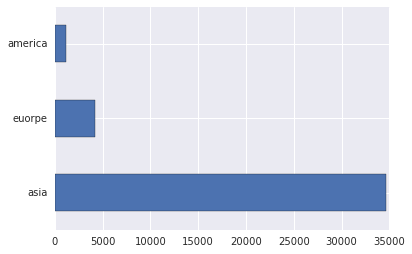

In [30]:
dftest.x24.value_counts().plot('barh')

In [667]:
dftest[dftest.x24.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
8456,-0.342352,2.667318,3.873110,1.482400,3.561828,-5.915880,5.631211,12.855805,-4.398431,0.190922,...,7.543947,30.705070,0.905195,-1.371124,2.499105,-0.876744,-37.856162,-4.300274,2.027714,5.567378
11025,-0.264340,-9.713574,7.994386,-10.359330,-2.355211,-15.821183,11.623236,-21.673111,-12.693168,-4.670983,...,-10.935383,51.567199,0.216406,0.708909,-2.422249,0.104239,-25.073906,3.427782,2.578627,18.263051
13426,0.344002,9.412529,0.619967,9.322279,3.894047,3.592669,0.901386,40.427156,-1.664217,-2.148232,...,-10.026934,-22.550975,4.386407,1.625376,0.796571,-0.497506,13.062516,-2.896985,-2.287758,-5.230421
16973,-0.316353,-1.814830,18.369124,0.607995,-3.004121,-3.294357,26.707326,57.214530,-10.387882,1.399227,...,5.051410,-7.515726,3.148282,-0.153098,2.576237,0.093940,-0.556570,2.818698,-4.119933,-1.856262
19764,0.052960,9.890102,-4.063376,-12.274928,4.181374,10.271977,-5.907844,-51.436143,-13.156764,-1.577203,...,-1.504701,36.529938,-6.337128,2.120465,1.902124,0.016643,-5.964296,2.359077,0.545317,3.657805
22057,-0.070340,6.583933,-17.707719,-3.717476,6.762169,9.810508,-25.745693,-28.357446,-3.538197,4.505742,...,-13.794200,-10.336719,-2.330515,0.918956,-0.744753,-0.178523,31.948618,3.785778,-2.300448,7.169442
24666,-0.355614,-13.352978,-6.865927,6.990435,-0.587019,-2.818745,-9.982542,-43.444838,-10.513913,2.740684,...,-24.359566,16.111072,-3.790844,-0.379371,-1.860675,-0.091027,-42.334363,3.133860,-2.383172,-25.885486
28739,-0.370700,-5.787550,34.849037,1.617566,-3.387448,9.436376,50.667881,29.310483,-4.192665,0.772982,...,35.900887,39.362265,0.933354,-0.325298,-1.525055,-0.277963,-61.505406,-4.415267,-1.727759,-28.658816
30123,-0.236602,-13.337902,-11.145248,4.604903,-2.019173,-0.913939,-16.204353,-52.617343,-9.772357,-14.105186,...,-35.182582,20.155871,-7.188696,1.134409,3.336701,0.019675,-46.519524,-3.285301,-0.375467,1.958256
31069,0.136342,-10.666194,-23.010345,1.101788,-11.082963,17.483618,-33.455313,-10.181245,-20.093962,7.719674,...,3.908390,-0.166045,-2.753466,2.738154,7.836327,0.228758,-8.751114,5.165770,3.374835,-0.638589


In [668]:
dftest.x25.value_counts()

-0.027133    1
 0.944517    1
 0.657716    1
 0.241490    1
 1.354883    1
-0.979711    1
 0.519131    1
-0.352359    1
 1.323240    1
-0.724118    1
 0.534781    1
 1.300635    1
-2.283845    1
-0.314731    1
 1.260318    1
 0.616297    1
 0.459733    1
-0.670286    1
 0.072497    1
 0.782560    1
-0.917330    1
-0.305483    1
-1.996218    1
-1.609088    1
 0.343172    1
 0.451995    1
-0.500971    1
 0.652752    1
 2.478346    1
 0.907549    1
            ..
 1.366328    1
 0.846369    1
 1.392296    1
 0.494685    1
 1.671340    1
 1.325336    1
 0.626613    1
 0.602482    1
 0.245701    1
-0.598010    1
 0.502268    1
-0.464404    1
-1.843822    1
-0.821660    1
 0.212073    1
-1.443557    1
-1.186361    1
 0.441779    1
-0.874350    1
-2.901213    1
 2.111552    1
 0.575245    1
 2.002283    1
-1.147999    1
 0.501769    1
 1.131398    1
 1.075342    1
-1.409300    1
-0.740310    1
 0.426971    1
Name: x25, dtype: int64

In [669]:
dftest[dftest.x25.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
6715,0.068382,-6.478443,6.574829,-5.323271,-1.528135,-3.090992,9.559308,53.673797,-0.228554,4.763392,...,27.532092,-34.424779,1.926665,-0.781086,-1.662163,-0.234880,-47.818827,13.331849,-2.226276,-26.298971
10611,0.424413,-7.990091,17.608246,-3.127814,1.213282,-8.537899,25.601067,40.751296,0.948770,-3.789426,...,14.418919,9.077154,2.386413,-0.773855,5.641532,0.766814,-23.000911,0.761546,1.504388,-30.416538
12235,-0.033239,0.667505,-11.774080,-15.895339,-6.712939,1.909170,-17.118628,-62.964741,0.530138,-6.083357,...,-23.313151,31.055372,-6.070937,-2.514559,-2.169112,-0.048672,-51.082661,3.485084,1.421594,-12.116759
17940,-0.343234,0.955045,-5.084431,-3.111627,-11.405829,8.361994,-7.392380,-8.463512,6.088943,-7.234365,...,-14.964560,4.836524,-6.578697,1.007321,-0.361645,-0.249732,-10.200191,9.143146,-2.976699,19.575619
22528,0.107613,-1.256745,19.061838,0.057310,-15.361802,2.637964,27.714481,-1.109245,-1.499978,-13.440703,...,-1.349122,29.250463,-2.561448,-0.320841,-2.279116,0.412279,-71.173690,-0.725117,-0.804379,-14.632095
26395,-0.120889,10.473926,-14.665822,-6.970473,-3.232103,-2.005340,-21.323004,-22.633642,8.055125,2.482502,...,9.101738,31.101828,2.259939,-0.873383,3.388564,0.881328,16.930397,-7.300624,2.755746,23.727886
27369,-0.420375,1.537649,6.902733,1.711047,6.366710,-14.491146,10.036055,51.714096,10.747861,-3.467306,...,17.769401,-17.159319,6.121604,-1.484319,-5.559579,-0.475655,2.765340,-4.600275,-1.921547,0.967877
34360,-0.268147,-7.878904,8.224980,-8.859775,0.849182,-0.619430,11.958503,-1.534790,-7.469449,7.959021,...,11.300223,22.391676,-1.268454,-1.309139,6.239688,-0.058908,-7.525695,-1.141113,1.552809,4.219193


In [670]:
dftest.x26.value_counts()

-0.294203    1
-1.261785    1
-0.121751    1
 0.266941    1
 0.246489    1
-2.088774    1
 0.661525    1
 0.051450    1
 0.596659    1
 0.481438    1
-2.163968    1
-0.630600    1
-0.365004    1
 0.132986    1
 0.249799    1
 0.391320    1
 0.048223    1
-0.527573    1
 0.614964    1
-1.188348    1
 0.703862    1
 0.425281    1
-0.823348    1
 0.369163    1
-0.599419    1
 0.424005    1
-0.149685    1
-0.567739    1
 0.155460    1
-0.618679    1
            ..
 0.602145    1
-0.638593    1
 0.007055    1
-0.919154    1
-0.677279    1
-0.424561    1
-1.652151    1
-1.811651    1
 0.350138    1
-0.476852    1
-0.202149    1
-0.913931    1
-0.436440    1
-0.836623    1
-0.062812    1
-0.839831    1
-0.766389    1
-1.144404    1
-0.487014    1
-0.498331    1
-0.348610    1
-1.948374    1
 0.166765    1
-0.536086    1
 0.045438    1
-0.233700    1
-0.747719    1
-0.270367    1
-0.279027    1
 0.261032    1
Name: x26, dtype: int64

In [671]:
dftest[dftest.x26.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
3401,0.510646,7.198395,-3.634364,3.958535,-0.281459,0.844115,-5.284091,11.722958,-11.992080,-4.101970,...,-15.885132,1.558302,2.740485,2.001171,4.297144,0.095295,6.837408,1.007176,0.912040,5.388758
3925,-0.725981,4.512792,4.138200,-5.635658,4.542154,1.008148,6.016631,-13.984739,-7.815392,-2.307298,...,0.323988,30.075036,-3.772979,-1.682393,8.193729,-0.133894,-16.496539,6.009195,0.641081,0.743607
4926,0.162428,2.694496,-3.829131,2.425652,2.047531,-0.721986,-5.567269,-13.528150,-1.685342,-1.811723,...,12.875502,11.756257,0.535084,-0.685166,0.190908,-0.314917,6.181194,2.344425,-1.989566,12.662408
8556,-0.725808,-5.577791,13.367156,-6.956806,-2.642564,-0.370838,19.434840,3.050879,18.626210,12.599986,...,-6.694539,31.879021,-0.724622,-1.359555,7.188824,-0.062509,-21.205343,-2.849452,0.647366,12.062275
22496,0.255408,-12.882297,1.141808,11.323045,1.799309,5.176986,1.660103,-0.985609,6.053425,-8.872068,...,-0.187530,-3.207814,-2.094291,-0.024919,-1.707550,0.218115,-18.690365,-4.481765,-0.659655,2.046086
27967,-0.074303,9.033470,-0.416977,4.575824,-2.377946,4.268954,-0.606254,-11.229229,15.247265,-2.121162,...,-7.397407,18.768178,-4.338310,0.068470,-2.692187,0.434043,-14.034834,2.455965,0.534597,13.725833
28000,0.435124,2.725893,-13.894941,16.346962,-3.972750,0.535127,-20.202201,-32.425580,-4.624758,-7.031950,...,1.370361,4.321398,-9.855781,0.712274,-0.549565,0.199001,-35.893550,7.812315,1.721703,-14.673767
29117,0.322806,-0.281127,1.788847,-10.968908,-3.528899,-14.011192,2.600850,48.083741,7.170421,-1.220298,...,39.214394,-0.054257,6.644998,-0.610643,2.134243,-0.132867,-8.534802,2.283593,2.462787,7.010138
29830,0.083579,-0.338157,-18.670309,5.031580,4.075050,-3.019267,-27.145227,-9.648663,-3.578540,-6.214405,...,-0.194960,-6.569765,-1.055368,-0.169426,-2.385280,-0.055261,-41.267347,5.826926,1.992261,-0.623548


In [672]:
dftest.x27.value_counts()

-10.693298    1
 3.707037     1
 6.525204     1
 0.745105     1
 7.235015     1
 7.630224     1
 3.305309     1
-0.679235     1
 10.026712    1
-7.239366     1
-2.673947     1
 5.327355     1
-0.616658     1
-2.994503     1
-5.951578     1
 8.890302     1
 4.974011     1
-7.218664     1
 2.216375     1
-6.779498     1
-3.820564     1
 14.602509    1
 6.620746     1
 3.106150     1
 0.203701     1
-1.155177     1
 5.523783     1
 10.383158    1
 0.239556     1
 0.830250     1
             ..
 8.233346     1
-8.760131     1
 5.107545     1
 2.952579     1
 1.721087     1
-2.003602     1
 13.279085    1
 5.659129     1
 6.518844     1
 4.167344     1
 0.369996     1
 9.658838     1
 2.641174     1
-8.004965     1
 10.613344    1
-0.769669     1
 7.394311     1
-2.279576     1
 4.425496     1
 3.726247     1
 0.234147     1
 4.594415     1
 2.275783     1
 2.546203     1
 14.558287    1
 10.821256    1
-0.135761     1
 1.702139     1
 11.425022    1
-5.504168     1
Name: x27, dtype: int64

In [673]:
dftest[dftest.x27.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
10906,0.095541,13.347353,-16.509528,0.791604,11.614604,-13.446477,-24.003612,-20.615223,-17.137454,-0.457953,...,-5.192118,-5.825911,-2.103970,-0.662273,4.453053,0.335945,-2.256022,-1.726857,0.256682,-5.383473
27541,0.021374,4.041344,-1.965097,14.172259,4.838945,-5.232777,-2.857103,28.091644,3.255179,10.846444,...,-6.741503,2.886291,7.339418,0.101718,-4.925510,-0.336025,-23.385883,-2.864138,-1.775180,18.624447
39279,-0.101218,1.639239,-7.576006,-9.948372,-0.604395,-8.502899,-11.014943,-41.921044,3.756666,-1.670006,...,0.964210,46.308188,-7.896889,-0.845569,-1.383886,0.040769,-4.874788,-4.433117,1.727769,21.557810


In [674]:
dftest.x28.value_counts()

-3.668566     1
 17.564326    1
 3.018705     1
-2.401174     1
-23.258869    1
 5.506999     1
-15.902958    1
-7.196582     1
-5.681094     1
 40.630135    1
 12.245688    1
 11.812098    1
 11.372644    1
-7.523126     1
 7.992285     1
 2.809088     1
 12.181463    1
 4.412866     1
 29.481182    1
-6.685010     1
 3.056688     1
 9.425032     1
-11.590137    1
-11.514301    1
-5.595830     1
 4.296947     1
-27.085605    1
 3.840117     1
-17.003705    1
 5.407048     1
             ..
 9.260301     1
-9.125948     1
-9.881404     1
-8.953104     1
 2.955416     1
 12.335504    1
-6.837091     1
 13.320558    1
 0.731033     1
-6.078471     1
-8.214714     1
 19.567249    1
 2.835762     1
 26.390865    1
 14.630056    1
-10.308109    1
 3.246436     1
 9.909273     1
 1.049562     1
 4.686480     1
-20.683543    1
-8.745096     1
 4.407311     1
 3.312588     1
 6.160231     1
-7.189561     1
-8.489903     1
 15.791803    1
-17.995106    1
-35.736229    1
Name: x28, dtype: int64

In [675]:
dftest[dftest.x28.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
4041,-0.147191,-3.401970,11.863438,5.787504,-4.592286,-12.275023,17.248548,-11.118178,5.125922,7.221000,...,0.255331,4.971486,1.928444,-0.206761,3.331860,-0.483862,-10.935375,1.553626,-0.276452,0.758379
10628,0.397640,-1.685655,-2.433507,3.175773,-6.197723,4.005249,-3.538136,24.604107,-5.293099,-1.265819,...,34.203491,-36.348360,1.316964,-0.736233,-0.307980,0.264443,-6.381870,-3.873059,0.595929,-19.402566
16444,-0.236983,-2.867722,17.780628,0.841800,2.167232,6.783471,25.851697,10.589483,8.415895,-5.634496,...,-0.265508,7.396316,-0.230635,1.804485,-7.912254,0.777303,-30.135025,-6.008860,-4.861824,5.821384
21566,0.021964,-4.153942,9.179034,-8.009178,-0.957253,-7.775770,13.345626,-19.086328,0.800305,-1.939029,...,-23.716257,22.983857,9.555819,-0.121112,-2.512965,0.071296,47.951876,1.581648,-3.661833,5.586966
27694,0.396960,3.058285,-4.261015,-1.924455,8.214727,4.820390,-6.195196,-5.724400,0.081325,5.806767,...,2.471888,1.937506,7.485912,-0.694023,1.399637,0.411900,27.953361,2.441135,1.185016,0.172995
30421,-0.025723,-3.202705,1.054350,-3.523103,18.652460,-12.366394,1.532946,-33.287060,-0.076774,-9.301880,...,2.030976,22.052277,-1.203390,2.283828,3.955997,-0.389338,-1.268480,-1.537672,2.985842,-4.932966
36072,-0.138661,-1.521098,-4.750475,8.836268,-10.897375,-6.394090,-6.906834,-15.559202,-6.271154,-4.437165,...,-15.286669,31.770586,-0.364037,2.223627,1.292932,0.647788,-5.209210,-8.462226,1.952737,30.747249
37507,0.333743,4.428860,-16.067811,-6.335852,0.851062,0.950323,-23.361390,-23.336682,-9.564485,-3.533730,...,-21.678917,-6.501766,-1.496710,-0.321242,-3.218361,-0.064728,40.254117,-4.764640,2.473245,11.144925
39906,0.248979,5.600473,-4.588263,2.711915,-0.896661,14.066456,-6.670989,3.827917,2.460980,-4.414807,...,-8.671471,-2.218692,-0.893659,1.179328,-0.890143,-0.637224,-25.711095,6.631830,-1.078175,3.648126


In [676]:
dftest.x29.value_counts()

July       11500
Jun        10307
Aug         7378
May         5443
sept.       2739
Apr         1651
Oct          560
Mar          317
Nov           58
Feb           31
Dev            7
January        2
Name: x29, dtype: int64

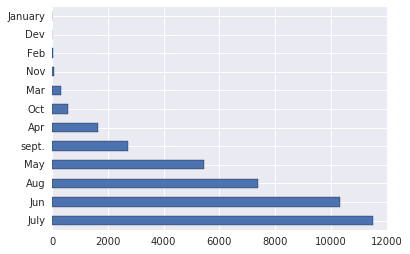

In [31]:
dftest.x29.value_counts().plot('barh')

In [677]:
dftest[dftest.x29.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
3366,0.158671,2.241556,-7.217733,-6.091381,-3.028444,-9.893670,-10.494041,19.402994,5.114827,3.326509,...,6.341516,3.273868,-3.662761,2.259820,-3.577061,0.395470,-50.105374,-2.318385,2.083146,-2.054351
10139,-0.329893,-0.295085,-12.471996,-16.188176,1.556836,4.252614,-18.133345,-6.957715,1.731399,-6.163829,...,-1.167421,-3.333539,-6.773243,4.063652,5.931527,0.361545,8.222880,-0.500682,-1.790826,26.862244
12910,0.230693,-7.672588,-5.169023,-2.286546,11.255348,-0.011859,-7.515372,-16.527280,-14.513747,-8.023169,...,-26.087387,2.485783,-0.072352,1.445911,-2.396198,-0.485287,-0.610451,0.316522,0.925514,7.362916
15237,0.532175,2.944782,-6.338025,-2.758083,-7.970384,2.718849,-9.215013,31.816381,-2.315359,4.506806,...,-6.441993,-11.578820,2.328801,-0.695383,4.973639,-0.514157,-18.165708,11.337820,3.417398,9.014920
19207,0.021863,-3.693098,-10.026736,-1.630528,0.238487,5.064327,-14.578120,25.993032,-1.917482,-14.019099,...,11.505866,-16.917710,1.783575,3.529088,3.280951,0.569206,14.968834,-3.744906,0.922450,2.512385
32580,0.103035,-8.084254,-3.019710,5.006129,5.261214,-1.769436,-4.390431,8.396489,9.725519,6.352527,...,-1.370658,-21.731613,6.413256,0.948581,4.689196,-0.464232,43.867432,-0.390560,-2.429793,-2.563337
32686,-0.464900,-0.649557,3.805924,17.693048,-3.551078,11.526876,5.533527,6.527348,-1.316611,10.663882,...,-51.840168,-6.778544,10.995591,0.838345,8.326704,-0.546793,94.749606,4.488878,-4.732033,23.713675


In [678]:
dftest.x30.value_counts()

wednesday    25153
thurday       7486
tuesday       7089
friday         137
monday         129
Name: x30, dtype: int64

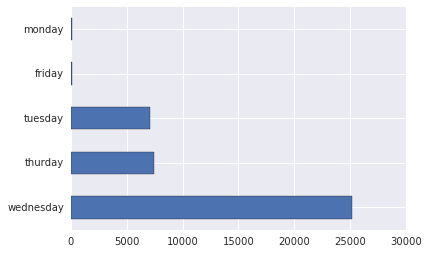

In [32]:
dftest.x30.value_counts().plot('barh')

In [679]:
dftest[dftest.x30.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
25129,0.429708,0.952825,8.544243,-6.289817,-1.512246,-11.447825,12.422687,-25.642908,-5.511889,-11.518357,...,-5.843369,25.788946,-2.296730,-1.497905,-7.591226,0.424695,-46.692531,0.469484,0.862698,-18.983136
26182,0.306864,0.515089,12.697273,4.210189,3.892578,-0.796453,18.460881,39.476893,-6.514515,2.230132,...,24.208652,7.313674,-3.000404,-1.843783,3.679049,-0.203668,-103.230958,1.054075,1.458230,-27.003989
30163,-0.283904,-5.444992,1.752047,20.103155,-0.979717,-10.347931,2.547345,0.343761,-4.279247,-10.137613,...,27.438010,22.602903,-4.528047,1.582187,-1.153724,-0.074920,-12.000908,-3.826823,0.361319,9.366841
30168,0.219398,6.937180,-10.384861,2.608809,6.183161,-10.205639,-15.098808,-4.503711,-18.740308,-0.528961,...,2.341264,-13.067229,-7.086920,-0.151310,2.945533,0.023512,-49.884391,-1.070787,-0.636468,-15.645893
36426,0.231502,-4.212963,-10.875999,4.512065,12.890816,4.501944,-15.812886,-30.243137,14.223635,0.399035,...,-2.199130,12.366366,-4.761551,0.926437,0.204841,-0.191616,-19.851808,7.129477,1.262717,5.875001
39404,-0.166766,4.587401,7.521360,-2.344792,11.455386,-1.165729,10.935492,-23.674310,4.240962,4.646901,...,-39.536518,44.502779,-1.617985,0.808826,-8.604663,-0.814029,-9.428321,-3.371395,1.581805,29.847837


In [680]:
dftest.x31.value_counts()

 4.311632    1
 2.761122    1
-2.376442    1
 0.227724    1
-4.767430    1
 2.953742    1
 4.365895    1
 1.518183    1
 0.527417    1
 0.393486    1
 1.774447    1
-3.241567    1
-3.492023    1
-3.690872    1
-4.700647    1
 1.908496    1
-0.247351    1
-3.286168    1
-1.337693    1
 0.201966    1
-6.127112    1
 5.097457    1
 2.102762    1
 0.553453    1
 5.214444    1
 2.227193    1
-5.655820    1
-6.148421    1
-4.395614    1
 1.010936    1
            ..
 1.066281    1
-0.884909    1
 1.698429    1
-0.495250    1
 2.219479    1
 1.631555    1
 3.751346    1
 4.412877    1
 1.822306    1
 1.190217    1
-4.441952    1
 2.180730    1
-0.258722    1
 0.029992    1
 1.857455    1
-1.843318    1
 2.521854    1
 2.085900    1
 4.167301    1
 2.292426    1
 4.026044    1
-0.277014    1
 2.721970    1
 6.188020    1
 1.271523    1
-1.516682    1
 4.626670    1
-0.323531    1
 1.055586    1
 2.462131    1
Name: x31, dtype: int64

In [681]:
dftest[dftest.x31.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
5958,-0.008845,-1.299149,11.800839,-24.689555,2.445570,12.148328,17.157533,-41.134365,14.357180,-2.031234,...,-24.956637,44.718107,0.859997,-3.153083,2.688217,-0.406995,-13.032959,3.233471,-2.473106,-10.368204
18732,0.131690,3.843121,-10.361005,-10.516950,10.099745,-4.603630,-15.064123,18.295354,-3.117539,-1.412242,...,13.064712,-18.747428,-6.371571,-1.145851,-2.075051,0.189828,-8.389246,-5.135442,-1.639001,-11.296240
23613,0.163533,2.224102,-13.707206,1.211613,9.024596,-2.606909,-19.929248,-21.616121,13.291884,-0.527538,...,-10.543265,3.710429,-1.758813,0.081143,0.843427,-0.099188,-30.405554,-4.557377,2.675328,-6.756356


In [682]:
dftest.x32.value_counts()

0.01%     10178
0.0%       8546
-0.01%     8354
-0.0%      7607
-0.02%     2600
0.02%      2030
-0.03%      406
0.03%       220
-0.04%       29
0.04%        17
-0.05%        3
Name: x32, dtype: int64

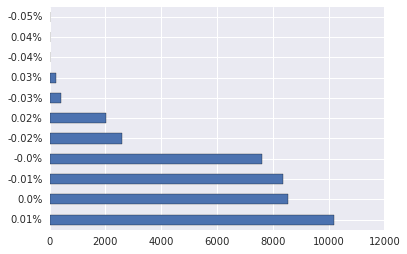

In [33]:
dftest.x32.value_counts().plot('barh')

In [683]:
dftest[dftest.x32.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
4846,0.453431,4.714105,-6.470945,-5.678835,0.831611,3.339826,-9.408268,-4.854747,-13.342630,-4.260828,...,22.599170,-3.455515,-9.086401,-4.453728,-0.711013,0.274818,-8.936047,3.439791,0.716149,-3.087840
11830,0.404590,1.251339,-22.694039,12.515235,-2.600181,7.667935,-32.995427,-23.044713,7.510051,-7.497398,...,16.247324,-21.890977,-2.825766,-0.639112,-4.191655,-1.330118,-25.512200,0.561023,0.039261,-13.669217
13850,0.235048,4.045896,7.592605,2.706755,-5.665054,-5.154999,11.039078,-41.967765,6.873178,3.362360,...,-22.800754,38.776216,1.081199,1.237774,-1.782096,-0.087074,-11.229490,5.173542,-1.149966,-7.348673
15208,0.060111,-0.983374,-3.181857,-2.156008,-2.904567,11.788238,-4.626180,-33.941925,-18.958637,1.955892,...,-13.693790,-1.648521,-5.811486,-1.153516,1.066275,-0.486212,3.593683,-3.086178,-0.075387,-6.477302
17263,0.376623,3.274790,10.420384,-5.003055,7.680784,-8.420761,15.150456,12.218284,-8.238400,-3.974578,...,-13.897114,-1.902132,6.793872,1.260263,-5.426677,0.241405,40.531822,-7.318671,-0.784807,21.565081
20274,0.019656,-7.462598,-7.325215,-3.643747,4.850687,13.078772,-10.650312,-53.316009,11.856107,1.588147,...,-1.545641,28.986238,-5.813249,-2.692404,2.972016,0.421501,-51.829340,-6.933372,-0.640378,-18.109112
27616,0.147370,3.771509,0.422316,-0.224434,5.500911,-10.332606,0.614016,-73.403493,8.577695,-2.895962,...,1.497675,42.613240,-3.278550,-0.276373,-6.473415,0.411288,52.157391,1.671306,2.508322,6.956601
31788,0.030224,0.150887,14.765130,-4.782869,-0.576765,-6.740068,21.467390,-25.826579,-7.695916,0.400881,...,23.112358,20.459512,2.791633,1.187810,-10.734306,0.144060,53.802381,0.002042,1.202929,-7.665148
34031,0.133259,-5.912846,-10.330900,16.205101,-3.032434,-5.065565,-15.020353,-19.354926,-5.581785,2.054258,...,14.060863,-4.568530,-6.418353,-1.269091,3.049534,0.539617,-10.661428,-5.027604,0.650054,-1.648448
39758,0.020235,2.473674,-19.843408,7.046066,0.759135,3.646377,-28.850824,21.278827,-7.441848,5.757014,...,16.024274,-6.885164,-6.101892,-0.835804,-8.444453,-0.004981,-56.010010,4.758858,2.100242,15.335826


In [684]:
dftest.x33.value_counts()


-1.583912    1
-0.722794    1
-1.163787    1
-0.206287    1
 1.781060    1
 0.590076    1
-0.216119    1
 1.900324    1
-0.395995    1
-3.340726    1
 1.479694    1
 2.508667    1
-1.028827    1
-2.042622    1
 0.077204    1
-0.033336    1
-0.438478    1
-0.642840    1
-1.667016    1
-0.913984    1
 1.223776    1
 1.443125    1
 0.675153    1
-3.923190    1
-1.859071    1
 1.171180    1
-1.709756    1
 0.599333    1
 2.893600    1
-2.785389    1
            ..
-1.711589    1
 2.501986    1
 2.068571    1
-0.759715    1
-1.749748    1
-2.845863    1
 3.440312    1
-0.745778    1
-2.218481    1
 5.098327    1
-3.348633    1
-2.084905    1
-0.918430    1
 0.672895    1
 1.347637    1
-0.732767    1
-1.002130    1
-2.756362    1
-1.950792    1
 1.303112    1
 0.434063    1
-0.951625    1
-2.361418    1
 2.052829    1
-0.617726    1
 1.650703    1
-0.205570    1
-0.437111    1
-2.131454    1
 1.578852    1
Name: x33, dtype: int64

In [685]:
dftest[dftest.x33.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
7792,-0.385327,-5.571987,-1.084918,1.858725,-0.593554,-6.079209,-1.577389,-25.089364,-8.852895,-5.517610,...,-12.394614,7.845692,-8.791585,2.067802,-4.565440,-0.070695,-16.946994,5.076169,-1.704142,-10.448321
8978,-0.210587,-6.075748,-21.718005,9.604155,1.557129,1.295713,-31.576347,-73.887862,6.799189,-2.802416,...,-21.028150,0.065634,-8.370572,1.171849,3.310035,-0.316367,15.376599,-4.346942,-1.115753,-4.999921
10094,0.208098,-6.019309,14.327231,12.049646,-2.870404,-24.109432,20.830718,25.678232,7.079503,10.143771,...,7.713224,18.289593,1.467020,0.297429,-0.529738,0.063632,-32.203355,0.299518,-0.934842,-22.492333
11579,-0.110171,-7.118374,6.118473,10.656477,11.461480,18.101893,8.895800,20.306308,3.634174,3.677454,...,-3.003218,4.316874,-0.005324,-0.473130,-1.246463,0.360789,-28.170267,-1.557679,2.250714,1.055361
15264,-0.222156,-10.100399,-27.972383,-1.691324,8.590039,-4.459429,-40.669743,-89.900449,-11.836633,-5.975337,...,-25.342917,-1.335929,-9.922752,0.626002,-6.553781,-0.329311,29.640121,10.028473,-0.207758,-6.558953
23156,-1.003887,10.597844,36.957261,1.118092,-5.340065,1.045809,53.733080,-33.401183,12.179978,-1.486989,...,18.222914,30.793310,8.232625,0.295720,5.273682,-0.159737,67.196657,-10.342623,2.124763,-23.718675
24953,0.183207,5.035700,6.805942,8.080440,1.956734,-8.296084,9.895329,-29.185150,5.617397,-8.689802,...,-28.556770,30.095347,-1.831762,2.866576,0.611617,-0.107365,-48.371144,3.493611,-3.161309,-5.040772
31495,0.229889,-6.097267,-7.879351,3.357262,-0.339404,6.721150,-11.455985,-61.668798,14.754555,3.846914,...,-13.828797,22.153586,-4.870557,-1.241719,3.503892,0.017854,-29.438467,-6.351444,-1.761815,-3.120895
32252,0.094251,7.087277,-4.885639,1.134322,10.028733,-9.669198,-7.103352,-17.978284,-8.731193,2.339126,...,-10.940073,-11.794537,-2.400116,0.517569,-3.211612,0.326034,-10.075745,-10.348680,-2.504090,-20.058856
38822,-0.288094,6.976355,1.773391,3.198178,7.252081,17.415524,2.578377,3.324085,-11.270530,5.099987,...,-3.909617,-7.407281,-5.482348,0.174169,4.572799,-0.421095,-19.576564,-0.612247,-2.078476,-16.769272


In [686]:
dftest.x34.value_counts()

-9.302635     1
 0.980707     1
 0.239820     1
-5.844321     1
-2.298865     1
 7.060090     1
-11.550465    1
 2.035389     1
-12.843534    1
-3.694498     1
-1.615889     1
-3.761432     1
-1.583828     1
-1.476865     1
 2.229155     1
 9.781596     1
 5.804664     1
 3.985507     1
 9.605349     1
 11.397879    1
-3.017046     1
-5.121897     1
 1.793099     1
 1.967566     1
-6.813905     1
-5.074628     1
 6.353185     1
 13.890215    1
-7.422297     1
-4.698136     1
             ..
-1.227146     1
 1.795959     1
 15.853189    1
 6.684548     1
 7.433389     1
-6.842073     1
 10.673615    1
 8.975641     1
 10.150063    1
 10.220662    1
 8.080476     1
 8.661473     1
 6.535052     1
-2.282289     1
 0.142786     1
-1.942292     1
 0.977471     1
-1.211249     1
-2.883738     1
 15.917657    1
 6.549348     1
 10.864080    1
-5.670501     1
-0.535026     1
 6.718360     1
-4.030332     1
 0.978884     1
 7.326162     1
 13.836068    1
 5.561537     1
Name: x34, dtype: int64

In [687]:

dftest[dftest.x34.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
1378,-0.115419,-4.681605,12.695355,-7.348629,-0.079278,0.160307,18.458093,31.354944,8.076477,1.070894,...,49.777801,-7.106719,-12.742477,1.191400,-3.295520,0.403172,-68.336081,2.143319,-0.676070,-19.450313
15378,-0.076148,-0.682541,-2.810899,12.684622,-4.483683,-3.141411,-4.086836,23.851049,5.919195,6.503025,...,4.254328,-1.372819,-9.661712,1.743672,3.098252,-0.638158,-94.755014,0.492298,1.782334,-23.545982
24318,0.052218,2.698285,-4.527594,4.081496,3.663770,5.095514,-6.582782,1.069200,-13.022265,-8.636271,...,-18.156480,-15.989665,-4.444293,-1.380893,2.663306,0.353483,-15.408287,-1.910599,0.011974,6.488273
25831,-0.360716,-8.223608,5.507116,-17.841381,-2.595578,9.565147,8.006932,-47.546059,-6.117408,9.551198,...,-23.816054,5.342769,-4.502684,2.361406,-5.015196,0.611333,3.424812,5.493390,0.453869,-14.072813
28081,-0.086039,-4.530020,-15.950516,-1.039653,-3.554509,4.487469,-23.190852,-11.895057,-16.086559,-11.290657,...,-27.147773,-23.754872,-3.630341,-1.783608,-1.485193,0.315449,-20.042137,5.409822,0.690741,3.733622


In [688]:

dftest.x35.value_counts()

 2.167054    1
 1.054181    1
-2.143918    1
-1.815430    1
-1.443374    1
-0.127923    1
 2.091068    1
-2.704033    1
-1.129267    1
-5.705922    1
 0.324431    1
 0.767888    1
-1.418329    1
 0.063325    1
-2.490720    1
-1.266552    1
 1.614537    1
-1.188040    1
-1.137737    1
-0.461899    1
-5.557122    1
 2.165973    1
-3.982571    1
-1.052374    1
-1.321185    1
-1.679854    1
 2.308865    1
 0.849462    1
-0.424672    1
 0.546385    1
            ..
-1.329937    1
 1.819506    1
-0.385730    1
-2.530779    1
-0.503745    1
 5.169698    1
-4.383420    1
-0.798732    1
-5.696507    1
-0.223176    1
 2.520985    1
 1.681327    1
-2.233937    1
-0.279314    1
 1.175163    1
-3.378234    1
 1.639274    1
-0.946993    1
 3.381702    1
 3.859442    1
 3.066164    1
-1.815960    1
 1.293573    1
-4.665074    1
-1.848589    1
-3.223545    1
-1.387558    1
-1.293527    1
-1.071969    1
-2.911721    1
Name: x35, dtype: int64

In [689]:
dftest[dftest.x35.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
14416,-0.399373,-3.160650,-15.437199,-2.412217,17.797917,8.346186,-22.444527,27.692261,1.303248,6.033774,...,17.378383,-31.224377,1.920998,0.260918,-5.730850,-0.083402,-33.159760,1.724370,-0.017652,-12.002704
19847,-0.325190,8.444185,19.058319,9.079944,-2.758887,11.335058,27.709364,29.818332,-1.820615,-3.747431,...,1.434731,20.200570,6.179586,0.281087,-1.605603,0.409985,-10.794291,-1.434084,-1.139711,-17.729032
25264,-0.017332,-3.586659,-6.703598,10.198560,-4.848450,-4.874768,-9.746528,-25.142513,6.953528,-0.145205,...,-2.184705,34.622013,5.466543,1.085035,4.907495,-0.205730,-21.455939,1.834891,-0.270602,6.250947
25286,-0.498620,-7.877283,-15.120576,2.830376,-1.766641,9.620148,-21.984181,-12.049445,-8.843414,-2.866796,...,6.127872,-28.304215,-1.220911,1.771169,2.085829,0.247980,10.239576,-2.817994,-1.752226,-6.330729
25839,0.728285,-8.486088,19.590821,-4.855069,3.404571,-16.253270,28.483582,-0.822349,-8.867138,5.887848,...,-0.076179,9.321687,7.546411,-0.256128,2.387657,-0.164808,17.013414,2.559383,-2.846207,-12.253896
35386,-0.216793,2.732010,23.978557,-9.951723,-1.961566,-3.425405,34.863020,-28.619274,1.514144,18.766143,...,-14.408819,28.778991,5.765884,1.130369,1.092543,1.169259,25.981893,-2.353513,-0.236506,10.006870
38488,0.201322,1.405612,-3.391294,-0.957816,6.112124,-7.843528,-4.930687,-19.806895,-9.461451,-1.030489,...,-28.984816,9.078117,-5.356490,-3.654206,4.343765,0.052596,-39.982963,-2.995453,0.626146,14.507389


In [690]:
dftest.x36.value_counts()

 1.072830    1
-0.751531    1
-0.746724    1
 0.639017    1
 2.912337    1
 2.455203    1
-0.941098    1
 1.991832    1
-3.268954    1
 0.132817    1
 2.633858    1
-0.553261    1
-1.419412    1
-2.829433    1
 1.559775    1
-0.494178    1
-1.702631    1
 0.698620    1
-1.784137    1
 0.637056    1
 0.792578    1
 1.013220    1
 1.152314    1
-1.286183    1
-1.219703    1
-0.302925    1
-1.491451    1
-1.778631    1
-1.753323    1
-2.391709    1
            ..
 1.047360    1
-1.173342    1
-0.113200    1
 1.437915    1
 2.308879    1
-0.307477    1
-1.076859    1
-2.233940    1
-1.224011    1
-0.303263    1
 0.291860    1
-3.040726    1
 0.174500    1
 1.555126    1
 1.662242    1
 0.028570    1
 2.678365    1
-1.161752    1
-0.432690    1
-0.800232    1
 2.192570    1
-0.374831    1
 0.801396    1
 2.202684    1
 1.544829    1
 0.273705    1
-3.217220    1
-0.456807    1
 0.913947    1
 2.717495    1
Name: x36, dtype: int64

In [691]:
dftest[dftest.x36.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
5262,-0.847320,4.791516,9.895755,-10.110230,-0.119687,5.185124,14.387684,-30.190718,-0.750176,5.732610,...,-10.846845,30.442974,-4.090708,-0.283897,1.377501,0.386416,-66.185924,0.676779,0.719164,-17.562971
6335,0.245023,1.655565,10.275922,4.914117,-1.903144,-2.374319,14.940418,-9.648123,0.874487,-4.704551,...,-23.200793,37.984755,-0.929453,1.087670,0.489161,-0.097120,8.446055,4.793385,0.223966,33.559640
8670,-0.616842,5.779704,2.715480,2.845271,-9.466576,2.711088,3.948104,-16.701870,-17.105780,-0.829884,...,-4.561319,9.222818,-2.550433,2.116302,-11.620837,0.070438,-22.112022,3.481859,0.340924,-4.385719
10192,0.269173,-1.592375,-16.607794,4.837451,1.069532,-6.589191,-24.146484,-37.453037,-4.478614,4.393652,...,34.804866,20.996385,-14.309137,0.368170,11.849812,0.690637,-41.191708,2.728663,0.730694,15.959848
17819,0.489494,12.599355,-5.887138,1.296626,7.634230,0.723438,-8.559457,12.826225,0.061550,2.150450,...,4.546775,-13.609370,3.525621,-0.433215,-5.523300,0.387297,-45.540754,-3.622930,2.848881,-14.904005
22006,0.066124,0.805736,14.157702,-11.391913,4.131233,4.335108,20.584234,-29.787645,-8.281904,8.368296,...,-4.690074,20.418237,-0.054917,1.718727,-6.799813,0.382993,-32.304567,6.709085,-0.598504,-13.180474
26605,0.489355,-7.703429,10.010861,-3.961302,10.767821,7.992770,14.555040,58.817716,-13.428958,-1.744682,...,19.388734,-1.978345,-3.849659,1.021933,6.448880,0.701340,-74.425304,-5.094649,1.524959,-8.361994
28528,0.202907,4.522180,-1.190227,8.550533,1.117638,-2.804850,-1.730501,-9.550129,-4.892251,-4.229309,...,-3.645615,4.543980,-5.326034,0.225574,1.821683,-0.414050,-20.206605,-0.132968,-1.709824,-0.220623
37491,-0.194734,8.573624,-18.024247,6.326774,2.317770,10.595451,-26.205901,-55.886295,-0.585232,-1.315948,...,-7.587005,-19.186316,-11.010940,0.629576,-0.200189,0.086244,-62.652716,-2.966775,-1.302574,-43.317537
38254,0.169951,9.067322,7.892055,9.955675,-0.657557,-3.311559,11.474455,13.214528,-1.259140,-5.526508,...,2.535128,0.233767,4.654305,0.521448,-6.628223,-0.166367,-26.129336,-4.184380,0.395415,-23.064054


In [692]:
dftest.x37.value_counts()

$-881.11     4
$231.21      4
$-1406.76    3
$776.24      3
$533.53      3
$-142.68     3
$593.92      3
$487.98      3
$-579.24     3
$351.57      3
$-240.27     3
$-300.2      3
$-323.53     3
$-48.21      3
$352.65      3
$-349.97     3
$120.07      3
$488.91      3
$-326.74     3
$258.17      3
$718.5       3
$-1172.58    3
$-554.46     3
$459.41      3
$-327.49     3
$203.45      3
$-1244.41    3
$-433.69     3
$-794.8      3
$-49.33      3
            ..
$806.05      1
$-803.65     1
$806.07      1
$-190.37     1
$-631.71     1
$-1477.06    1
$1035.11     1
$-1200.89    1
$-1930.09    1
$263.54      1
$-1459.63    1
$-149.08     1
$-191.92     1
$240.22      1
$173.41      1
$-1039.29    1
$240.26      1
$2138.73     1
$283.49      1
$-610.17     1
$-787.79     1
$720.59      1
$-994.45     1
$-857.31     1
$1157.67     1
$-519.36     1
$-857.35     1
$720.51      1
$452.62      1
$284.99      1
Name: x37, dtype: int64

In [693]:
dftest[dftest.x37.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
16094,0.215787,6.196603,-18.866967,-3.656699,-1.569939,6.937211,-27.431152,23.865383,11.560853,-2.123686,...,28.790868,-6.376034,-9.986722,0.985514,-2.104880,-0.011938,-54.956125,-0.239318,0.210179,18.389890
20093,-0.585556,1.104791,-13.581500,5.178984,5.943853,-5.083363,-19.746480,21.329397,1.501757,-9.935128,...,-12.729563,-3.599683,8.582280,-0.057298,-5.647977,0.418970,5.443976,0.601978,-1.057583,8.581827
23563,-0.273604,-9.118521,14.033596,1.973395,3.547352,-0.675843,20.403794,-97.545296,-23.571517,-3.996975,...,-11.404032,55.647115,-0.193515,-0.703034,5.768124,0.073453,83.767200,1.148688,2.443150,3.748136
25664,0.993153,7.849276,2.247457,13.605455,8.701200,0.013390,3.267633,12.192256,6.546145,-0.933492,...,-5.149787,11.208167,-0.477364,1.204368,2.317886,-0.650977,5.090421,-16.645355,0.981883,29.762480
36639,0.514706,-5.037639,13.941686,-4.153857,4.657376,6.307497,20.270164,-22.839131,-14.835688,-4.507357,...,10.961828,16.482052,-5.127355,-0.331251,3.594536,-0.323795,1.590559,-1.852424,-1.690936,-11.485287
39971,-0.484285,-2.355493,0.426684,8.615683,6.953455,15.912097,0.620367,14.423536,-6.799821,-11.285372,...,-1.495509,-16.379263,9.678255,1.213855,5.518131,0.050803,50.942827,7.284607,-3.254093,7.000519


In [694]:
dftest[dftest.x38.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
3846,0.636788,-2.017937,-17.150360,-23.949792,-4.233618,-10.853055,-24.935334,1.166430,0.462253,4.398373,...,-4.823369,7.185906,-3.146914,-1.502665,8.290276,-0.166109,7.966258,-4.151176,2.830554,24.870621
17108,-0.514285,12.385222,-22.883999,3.986968,-7.579869,-0.162371,-33.271615,-69.386634,-1.049265,-5.047256,...,-7.839156,3.169745,-8.559494,-1.394389,-1.385364,-0.162934,-0.572887,-2.328737,1.244382,-11.059149
17552,-0.341284,9.451511,-24.940806,-1.614173,-5.071143,-5.166988,-36.262058,9.935029,-13.506262,2.028049,...,4.301679,-11.225168,-3.786656,-0.273548,1.095412,0.447343,-31.441838,0.733490,3.645196,-2.708739
21777,0.064095,-1.773630,1.585186,-1.365794,9.613089,10.928269,2.304741,8.468561,1.203301,-6.715853,...,12.763728,-4.898396,4.682302,0.609851,-3.688368,0.477948,44.682879,5.421203,-0.925407,6.539581
22137,0.433885,-1.320913,6.926570,13.111097,-2.024882,-5.534375,10.070712,1.180145,-22.216487,0.343142,...,20.472811,-14.111544,5.407394,-1.514400,-2.199329,-0.038918,55.438590,-6.409438,-3.676317,-1.169333
35622,1.049189,-0.706301,-2.481181,6.962410,4.340535,1.165974,-3.607450,13.084316,4.136395,-13.668255,...,-13.595349,0.544037,-5.568173,0.243004,-1.311245,0.676907,-62.022299,3.402598,0.153993,-2.516312
36214,0.136357,3.230926,-20.780349,-1.810520,0.517741,7.652614,-30.213066,8.344968,-11.429912,0.028391,...,-20.151522,9.108583,-3.313281,0.462199,2.582710,-0.181470,-20.989993,-5.519764,4.286114,24.904345


In [695]:
dftest[dftest.x38.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
3846,0.636788,-2.017937,-17.150360,-23.949792,-4.233618,-10.853055,-24.935334,1.166430,0.462253,4.398373,...,-4.823369,7.185906,-3.146914,-1.502665,8.290276,-0.166109,7.966258,-4.151176,2.830554,24.870621
17108,-0.514285,12.385222,-22.883999,3.986968,-7.579869,-0.162371,-33.271615,-69.386634,-1.049265,-5.047256,...,-7.839156,3.169745,-8.559494,-1.394389,-1.385364,-0.162934,-0.572887,-2.328737,1.244382,-11.059149
17552,-0.341284,9.451511,-24.940806,-1.614173,-5.071143,-5.166988,-36.262058,9.935029,-13.506262,2.028049,...,4.301679,-11.225168,-3.786656,-0.273548,1.095412,0.447343,-31.441838,0.733490,3.645196,-2.708739
21777,0.064095,-1.773630,1.585186,-1.365794,9.613089,10.928269,2.304741,8.468561,1.203301,-6.715853,...,12.763728,-4.898396,4.682302,0.609851,-3.688368,0.477948,44.682879,5.421203,-0.925407,6.539581
22137,0.433885,-1.320913,6.926570,13.111097,-2.024882,-5.534375,10.070712,1.180145,-22.216487,0.343142,...,20.472811,-14.111544,5.407394,-1.514400,-2.199329,-0.038918,55.438590,-6.409438,-3.676317,-1.169333
35622,1.049189,-0.706301,-2.481181,6.962410,4.340535,1.165974,-3.607450,13.084316,4.136395,-13.668255,...,-13.595349,0.544037,-5.568173,0.243004,-1.311245,0.676907,-62.022299,3.402598,0.153993,-2.516312
36214,0.136357,3.230926,-20.780349,-1.810520,0.517741,7.652614,-30.213066,8.344968,-11.429912,0.028391,...,-20.151522,9.108583,-3.313281,0.462199,2.582710,-0.181470,-20.989993,-5.519764,4.286114,24.904345


In [696]:
dftest.x39.value_counts()

-4.036964    1
 3.593575    1
 1.776507    1
-0.014948    1
-3.717839    1
-4.079067    1
-3.817277    1
 0.584762    1
 1.301104    1
-6.997218    1
 1.608570    1
-5.182975    1
 3.548435    1
 7.357858    1
 4.592937    1
 0.332677    1
 2.238241    1
 4.579931    1
 3.015247    1
-3.399104    1
-3.270979    1
-4.985703    1
 2.005417    1
-2.320140    1
-3.076271    1
 0.824293    1
-8.591844    1
-0.034201    1
 5.579234    1
 4.360858    1
            ..
-3.296763    1
-5.843125    1
 6.492398    1
 6.457963    1
-1.214776    1
-1.042221    1
 1.791126    1
-2.544555    1
-1.678052    1
-5.565633    1
-2.593450    1
 1.510464    1
 5.205613    1
 3.490081    1
 5.950690    1
-1.496306    1
 3.548160    1
-4.523343    1
 2.913223    1
 3.558208    1
 7.489914    1
 0.495052    1
 0.276945    1
 0.115139    1
 0.341147    1
-2.541847    1
 1.167043    1
 5.066373    1
 1.374013    1
-9.810108    1
Name: x39, dtype: int64

In [697]:
dftest[dftest.x39.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
16,-0.080002,-3.996057,12.610601,2.699778,3.305612,14.143028,18.334866,5.918937,6.168532,4.562688,...,4.160472,0.728321,0.795320,-1.993936,-8.423694,-0.112500,-0.445456,8.485323,-0.620149,0.531935
9268,1.053192,9.647869,-12.485177,3.463141,-19.435812,-6.093937,-18.152510,-28.285920,2.208909,-8.065352,...,-1.175914,6.331911,-8.094475,-0.320503,-1.884225,0.182998,-7.135580,7.989577,-0.498023,3.203126
9316,-0.108282,-5.146695,-16.223734,1.292472,1.802176,-5.059746,-23.588090,8.401769,17.106633,-0.413409,...,6.150743,-8.351801,0.840133,-1.239931,-0.012127,-0.206861,22.502886,1.912724,3.737906,12.174225
10476,0.262150,1.813446,-6.922057,7.460793,9.491770,2.960379,-10.064151,-52.207283,14.557908,3.407009,...,-28.349399,24.335920,-4.180457,-0.470512,-8.514626,-0.635695,-8.287375,-0.927576,-2.122376,13.172259
14307,-0.144874,-9.016910,-5.146654,-4.603383,-0.500101,-2.839276,-7.482849,-29.802878,-9.263695,-5.082660,...,-1.402863,34.856125,-11.606748,1.557804,-8.764081,-0.184257,-20.063812,-0.511902,0.701231,16.303593
18063,0.297724,4.351172,24.103489,-0.902837,8.495825,3.678302,35.044662,-8.275795,0.330607,4.383331,...,-2.793886,10.952601,6.457076,0.408052,5.885659,-0.444043,48.941430,-0.639129,0.288318,-4.029788
19074,0.611687,1.347767,9.676274,4.206205,-2.632509,6.405889,14.068576,5.110087,-6.932786,-9.017737,...,5.385610,31.574956,3.685989,-0.745554,0.807886,0.641102,24.048025,-1.604325,1.466907,19.444354
25534,0.432266,8.709239,1.552213,-0.130690,-5.721504,14.655209,2.256802,-5.099105,0.040991,-1.323484,...,-20.605737,9.692855,1.333547,0.085951,3.350339,-0.201343,-69.025479,4.242314,-3.886487,-4.763224
27672,-0.533208,9.834140,-7.125335,7.848300,10.163456,-4.323312,-10.359702,-0.715254,-13.640333,-2.531422,...,-2.935814,8.224330,-3.672283,-2.003145,-0.160266,0.225616,-7.886708,-3.199904,0.521717,7.656024
29652,0.763643,-11.301337,-1.381072,8.720167,-1.358833,2.317204,-2.007974,42.137449,4.800872,0.854555,...,25.705214,3.157820,0.463478,0.569447,3.931203,-0.091427,-3.903425,4.523400,2.441429,6.289020


In [698]:
dftest.x40.value_counts()

-25.403809    1
 19.557287    1
-12.432767    1
 14.395148    1
 13.147994    1
 16.615819    1
-17.266239    1
-17.197993    1
 17.759046    1
-4.890483     1
-16.560122    1
-7.733889     1
-8.035837     1
 18.996656    1
-25.497126    1
-2.011528     1
-9.176786     1
-6.147854     1
 2.853711     1
-30.309542    1
-9.207973     1
-24.521776    1
 0.353501     1
 0.919432     1
-4.139531     1
 21.717002    1
-5.262125     1
-9.159497     1
-21.726391    1
 15.996722    1
             ..
-0.490599     1
-2.851093     1
-15.782317    1
-12.748608    1
 5.835183     1
 9.997671     1
-7.834421     1
-9.692912     1
-49.223707    1
-0.504306     1
-20.331618    1
-3.802027     1
-5.625155     1
 29.636308    1
-15.997500    1
-1.133269     1
-32.382702    1
-9.453857     1
-0.485877     1
-25.332052    1
 30.308766    1
 16.503657    1
 3.938301     1
-0.202097     1
 1.825523     1
-13.958741    1
-12.876532    1
 6.122374     1
-18.303770    1
-16.918792    1
Name: x40, dtype: int64

In [699]:
dftest[dftest.x40.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
437,0.365192,3.879024,8.794182,2.775357,1.397091,10.866090,12.786080,-7.857713,15.561306,2.123218,...,NaN,11.898467,-1.470849,0.923427,-0.034080,-0.259296,-23.835802,-8.730397,0.758020,-9.320593
9156,0.703037,2.394103,4.303371,-9.645739,-4.964873,-0.518558,6.256777,-2.907388,16.505947,3.626709,...,NaN,-12.076552,-3.124389,-0.159335,0.757402,-0.010535,-0.949543,4.450282,-4.702713,-10.136817
15379,0.892063,-2.894879,1.470257,4.528527,-1.641540,7.031768,2.137643,-44.895930,-3.974604,7.507552,...,NaN,25.303924,-0.168619,1.507324,-1.390961,-0.231380,27.796867,-2.885340,2.610925,4.265526
20220,-0.096014,-0.508989,7.347254,-2.609074,-1.482797,-8.382781,10.682356,7.400388,4.493540,-11.907742,...,NaN,-8.153690,-3.402474,-0.784719,4.565342,0.584350,-31.779823,7.461049,-0.160214,-4.269023
29995,-0.763138,9.248775,0.041168,8.367981,2.471505,1.834753,0.059855,0.095981,-3.831219,-0.481571,...,NaN,22.877332,6.919826,-1.417542,5.447571,0.075314,35.508596,-3.530861,2.189590,20.557314
32305,-0.221473,0.828993,-3.727737,-2.390823,-1.803373,-0.967600,-5.419849,49.957242,14.539396,4.930287,...,NaN,-6.456858,-4.483890,-0.887714,-0.359206,-0.296651,-91.550715,0.200794,4.234470,-11.079693
33403,0.134717,-3.437987,11.282956,-7.930074,2.390381,-6.924888,16.404570,-38.440315,-8.265803,9.878967,...,NaN,13.741746,-1.012740,2.601363,0.115308,-0.120424,45.811475,0.575838,-1.041500,11.509479
38393,0.536455,-10.358017,-8.466305,0.583202,7.571502,-12.930384,-12.309371,-5.734031,-13.109378,-7.480835,...,NaN,25.933854,-4.528673,1.400236,-0.552368,0.038201,-7.345895,-2.461669,3.906145,29.531204


In [700]:
dftest.x41.value_counts()

 36.182632    1
-10.548719    1
-8.028058     1
 26.105331    1
 25.516165    1
 1.956835     1
 22.918020    1
-33.152573    1
 1.369021     1
 9.804225     1
-19.253649    1
 23.642965    1
 25.936826    1
 26.576932    1
 14.636584    1
 8.114661     1
-2.652596     1
 1.824231     1
 14.988418    1
 18.536123    1
 2.761355     1
-7.746663     1
 30.279021    1
-19.561205    1
 20.928835    1
 3.731626     1
 12.315486    1
 33.324627    1
 21.701918    1
 23.510924    1
             ..
 29.275588    1
 14.181953    1
-6.730714     1
 7.671639     1
-17.810043    1
-2.342958     1
-32.290400    1
 5.371726     1
 16.503038    1
 28.905938    1
 22.452013    1
 9.013959     1
 22.353783    1
 9.184522     1
 26.414027    1
-15.242641    1
-0.927576     1
 12.728506    1
-1.802752     1
 13.392228    1
 25.659853    1
-6.698307     1
-12.474486    1
 1.009050     1
-5.398803     1
 38.784931    1
 50.436604    1
-23.710272    1
 27.439890    1
-15.793545    1
Name: x41, dtype: int64

In [701]:
dftest[dftest.x41.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
6150,-0.336030,-13.328212,-21.504918,10.885016,0.722840,-0.825255,-31.266534,24.573698,10.115397,1.694391,...,3.264376,NaN,-3.596261,-4.990329,1.629460,0.700704,-28.799620,2.498626,4.438151,-7.324459
14794,-0.223080,-1.933165,-27.213188,3.593593,-3.006815,-8.741365,-39.565931,-20.091592,1.985295,8.161275,...,28.879173,NaN,-8.812437,-0.050206,-0.428004,-0.299324,21.293809,5.540799,0.476421,39.925086
17997,-0.044495,5.368418,-9.120387,0.213457,-3.902121,-9.557540,-13.260358,-15.117382,8.582972,0.464724,...,-5.807480,NaN,-1.999459,0.722503,1.261512,-0.522229,-30.785871,0.154426,1.638291,1.587925
29973,0.048728,1.733857,11.841802,4.850667,10.398729,-15.751714,17.217090,-20.918177,-16.794317,-3.825052,...,-11.913803,NaN,-5.605817,0.539140,-1.225943,-0.565342,-13.857133,6.608814,-1.659302,-6.169520
34853,-0.042474,0.952161,1.281720,3.766746,-0.263337,-2.261944,1.863525,22.721669,-4.405104,-3.449273,...,-14.129101,NaN,6.593719,-0.741313,1.546871,0.378169,-3.378742,1.921241,-0.622381,8.582437
37171,-0.808841,0.541762,1.340401,-7.037720,7.239433,1.981711,1.948843,16.136898,20.501456,-9.434892,...,-8.239486,NaN,9.485219,0.318916,-1.380140,-0.369426,61.458294,5.947729,-0.725442,10.721528
38505,0.140536,5.267820,5.656602,2.644636,1.808980,-1.779763,8.224274,24.594187,7.022540,-4.217975,...,8.438502,NaN,-3.553385,-1.614507,-7.949598,-0.244165,-55.382733,-5.042932,-1.991585,5.459969


In [702]:
dftest.x42.value_counts()

 5.270548     1
 4.128065     1
 2.322108     1
-3.359636     1
 1.212869     1
 3.711582     1
-11.379010    1
 8.192938     1
-5.922726     1
 1.818848     1
 0.781454     1
-3.572632     1
 7.684898     1
-1.910046     1
 7.381189     1
-8.093077     1
-2.372562     1
 0.328195     1
-0.893564     1
-3.530273     1
 4.093422     1
-0.901006     1
-8.458707     1
-6.675532     1
 3.478638     1
-15.161889    1
-0.172862     1
-1.184250     1
-4.004193     1
-6.271582     1
             ..
-0.746610     1
-0.138034     1
-7.467613     1
-5.645995     1
-10.745531    1
 4.677100     1
-0.709654     1
 0.065025     1
 2.255912     1
-0.467471     1
 0.495042     1
-2.062419     1
 0.424967     1
 8.063158     1
-6.052364     1
 8.972685     1
-7.265132     1
-8.453100     1
 1.748992     1
-4.208269     1
 3.888802     1
-9.658014     1
-4.565381     1
-5.180007     1
-3.487599     1
-4.270751     1
-5.570502     1
 5.273166     1
-1.982995     1
 0.247029     1
Name: x42, dtype: int64

In [703]:
dftest[dftest.x42.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
176,-0.478195,-6.721827,-15.164784,3.914474,3.411644,16.045840,-22.048457,-18.692620,-14.678598,0.727056,...,-6.201832,-8.298007,NaN,-1.282679,-3.232978,-0.433443,24.970770,-1.490086,-0.459047,2.014385
3171,-0.408392,-7.838919,4.739126,2.685655,9.117706,-18.415246,6.890333,-13.399355,3.254762,1.249281,...,-3.349403,26.098471,NaN,-1.247016,-6.924580,-0.388766,35.028899,0.901137,3.746859,15.550707
7114,-0.569018,7.135016,-3.564319,-10.223572,-1.513205,1.586788,-5.182252,23.569107,-3.759515,-7.195894,...,22.567825,-16.844849,NaN,1.391065,7.536059,-0.562879,46.561746,-1.460576,-1.170577,11.522002
8368,0.004230,0.001380,-21.385907,6.703077,-3.663886,7.816167,-31.093502,-35.025878,-1.401384,1.070728,...,-11.862521,-16.759113,NaN,3.590034,5.971320,-0.350113,14.851682,-1.864360,-0.434633,13.350520
11245,0.644469,1.054595,-17.682362,-16.452683,-0.553720,-15.670416,-25.708826,-8.804361,-8.366640,2.399687,...,1.544703,0.782778,NaN,1.893268,-2.519923,-0.591203,-20.102160,8.495521,1.563578,6.106311
13145,-0.087218,-0.315323,-15.082764,-2.772441,-2.389337,3.186963,-21.929206,30.269715,7.015386,-7.966058,...,-7.372351,-23.490060,NaN,2.438982,-0.634440,-0.110784,-0.276545,2.954915,2.048051,12.588503
13298,-0.125364,7.873809,-11.252392,0.918962,4.167068,7.222105,-16.360132,12.627026,-12.701469,-0.872158,...,22.594414,-23.490141,NaN,2.447552,-5.357878,0.814926,0.465580,6.805250,-0.080027,-3.902162
14102,0.182262,5.852633,-14.935655,-14.667187,0.140626,13.420456,-21.715320,0.882106,-4.163034,-14.002301,...,-14.794815,9.539943,NaN,0.570436,-3.990004,0.188947,37.472721,-2.813572,3.089813,23.719406
20395,0.170305,-4.198331,-8.119965,-0.829796,3.709032,0.780171,-11.805820,-51.039552,-13.561959,6.092688,...,-14.351792,13.970397,NaN,-2.211455,-6.732609,0.124265,61.370206,6.404483,-0.601910,7.171715
21328,0.251165,9.912054,1.092577,5.545670,-12.160556,7.491755,1.588525,-36.797867,-1.448527,-0.845081,...,-23.482111,34.303050,NaN,-0.167340,5.074467,-0.313013,-17.169255,2.883555,0.198834,22.203620


In [704]:

dftest.x43.value_counts()

 0.453849    1
-2.166800    1
-0.856830    1
 0.159177    1
-2.882989    1
-2.795768    1
-1.080917    1
 1.671903    1
 0.061128    1
-1.100908    1
-1.045351    1
-1.090524    1
 0.071619    1
-0.030786    1
 1.146478    1
 2.269016    1
-0.094456    1
-2.556482    1
 0.479029    1
-1.149780    1
-1.695118    1
 2.200728    1
 0.637824    1
 1.980478    1
-2.540492    1
-1.405645    1
 0.786537    1
-0.141753    1
 0.424487    1
 0.676073    1
            ..
-0.797982    1
 0.499775    1
 1.502289    1
-0.512575    1
-1.530435    1
-1.750953    1
 3.398586    1
-0.776346    1
-2.755045    1
 1.518372    1
 1.308436    1
-0.582459    1
-0.189919    1
 0.673830    1
-1.693346    1
-3.479159    1
-0.520682    1
-0.369415    1
-0.069968    1
 0.110474    1
-1.741965    1
 0.647575    1
-1.346950    1
-0.296825    1
-1.536305    1
-1.782737    1
-1.926147    1
-0.040665    1
-1.457540    1
 1.684840    1
Name: x43, dtype: int64

In [705]:
dftest[dftest.x43.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
879,0.344249,9.574485,-6.190021,2.753796,-9.473160,-10.528537,-8.999825,17.315973,-16.564721,4.713151,...,1.489300,-2.952096,1.023792,NaN,-2.288455,-0.377789,-21.635364,4.115620,2.399953,2.032534
15471,0.092203,-1.559391,-4.399987,-7.226282,9.930345,-4.524335,-6.397251,-3.777413,-7.972310,-0.915081,...,0.909072,-19.613139,-0.585713,NaN,1.648396,0.076606,-17.627590,3.169974,-2.138679,-22.576878
17227,-0.341932,-8.411488,-2.523392,11.891238,-10.369378,4.170640,-3.668823,16.481678,9.135214,2.275513,...,-8.846763,10.799868,-3.349097,NaN,1.927037,0.024320,-34.756804,2.110009,-0.267132,17.857122
19405,-0.594582,1.477503,5.790700,-10.554199,1.943360,-5.874398,8.419242,26.957924,1.835322,2.946399,...,-17.556905,3.419904,1.767408,NaN,-0.804533,0.018038,-8.669079,-4.905780,-2.399100,4.645059
20489,-0.610018,2.486279,8.322254,-8.638627,-4.307173,-9.565712,12.099932,34.561824,1.161393,-9.115231,...,6.782539,12.401216,0.024279,NaN,0.325037,0.208678,-9.737231,2.489677,0.347539,14.983435
21747,0.016846,-1.888094,-12.013903,5.952618,-7.876948,9.693125,-17.467312,-10.469059,5.581973,-8.744084,...,-28.246014,-28.658441,-6.269380,NaN,1.337726,0.303452,33.983247,0.778445,0.694963,-2.614350
23089,0.262215,0.660787,-5.050786,18.766009,4.332599,11.875519,-7.343463,-23.325341,9.410362,-0.788074,...,-32.391307,-5.873973,-4.781750,NaN,1.598297,0.096927,2.857734,5.881564,-0.892219,19.963903
33535,-0.151275,0.478564,1.872506,-9.594180,4.598919,15.410197,2.722483,43.890103,0.881435,-3.714164,...,-6.471322,2.786155,9.942875,NaN,11.420328,-0.610258,-41.265129,-2.841637,-2.430241,20.458361


In [706]:
dftest.x44.value_counts()

-4.550474    1
 1.223049    1
 3.770134    1
 3.716948    1
 9.153402    1
 5.244854    1
 3.650272    1
-0.770043    1
-8.999570    1
-0.872838    1
-2.915528    1
-0.201334    1
 3.336044    1
-3.443600    1
-1.445021    1
-1.796541    1
 6.285918    1
 0.650340    1
-1.496588    1
 1.493961    1
-7.053505    1
-1.550959    1
-5.608408    1
 5.180553    1
-6.023554    1
 4.834940    1
 0.758802    1
 1.779973    1
-1.028003    1
 0.281954    1
            ..
-5.421383    1
-2.525304    1
-4.418409    1
-1.222699    1
 1.664187    1
-0.374454    1
 4.523705    1
 4.620936    1
-4.199070    1
 1.557136    1
 4.041401    1
-3.136614    1
 4.066097    1
 6.619655    1
 5.154278    1
 1.536905    1
 2.790199    1
 0.455230    1
 1.991848    1
-2.031032    1
 0.679586    1
-0.014567    1
 5.322211    1
 0.356452    1
 5.320548    1
 2.554154    1
-8.013408    1
-6.060644    1
-3.147721    1
-4.171553    1
Name: x44, dtype: int64

In [707]:
dftest[dftest.x44.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
10774,0.109028,-0.427683,0.888844,-4.210199,-8.225736,8.071747,1.292312,13.311616,-5.469643,-0.935904,...,19.163134,-7.555754,-3.109462,1.072755,NaN,-0.047079,-21.097986,7.900344,-0.687546,0.941129
20836,0.222625,-5.523281,-5.337231,-5.706568,11.130830,10.472277,-7.759932,18.884745,4.514229,-9.182591,...,0.634514,-12.416454,6.916485,-0.765754,NaN,-0.626679,36.303247,2.140877,-1.116113,2.441332
34812,-0.200585,-2.794487,-11.322470,-7.284088,-3.332011,-10.764378,-16.462021,-42.308816,-5.088984,-10.769981,...,-10.733453,1.760792,-8.180637,-0.532571,NaN,0.289109,1.789848,-4.227559,-2.836849,4.038609


In [708]:
dftest.x45.value_counts()

 0.088335    1
 0.539062    1
-0.297189    1
 0.149479    1
 0.071464    1
 0.213811    1
-0.246764    1
 0.168098    1
 0.098809    1
 0.203928    1
-0.078582    1
 0.145047    1
-0.365932    1
 0.096091    1
 0.430658    1
 0.213427    1
 0.308246    1
-0.414729    1
 0.276511    1
 0.112784    1
 0.278296    1
-0.204301    1
-0.691106    1
 0.363150    1
 0.043749    1
-1.071722    1
 0.021869    1
-0.819680    1
 0.329203    1
-1.039686    1
            ..
-0.430506    1
 0.006418    1
-0.153908    1
 0.210909    1
 0.342477    1
 0.409711    1
 0.338698    1
 0.347753    1
 0.286193    1
 0.625537    1
 0.212656    1
 0.014624    1
 0.613904    1
-0.180560    1
-0.178021    1
-0.028617    1
 0.344685    1
-0.616629    1
 0.145632    1
 0.507751    1
 0.042015    1
 0.250418    1
-0.143056    1
 0.319748    1
 0.198196    1
 0.023300    1
-0.154037    1
-0.423008    1
 0.269832    1
 0.284734    1
Name: x45, dtype: int64

In [709]:

dftest[dftest.x45.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
4266,-0.557199,-6.925351,-10.103099,8.626165,-5.326997,-8.038755,-14.689147,-12.337394,-15.712595,7.781490,...,10.134818,31.348029,-6.534535,-1.564131,-7.779594,NaN,-46.536306,10.987367,2.921552,10.184574
19363,-0.543241,-0.715072,-3.539131,6.729807,-2.981873,18.508079,-5.145630,21.511902,-11.657148,-5.183158,...,7.171934,-29.369371,4.143794,-0.801839,2.359192,NaN,1.680970,-3.831969,-3.832406,-8.189690
19618,0.426868,-14.813121,-10.787977,-2.101914,-7.358982,5.608836,-15.684908,0.070282,-0.401704,-11.030899,...,-39.332436,-3.033954,-3.406416,1.340102,10.527763,NaN,-0.446119,-6.543263,0.442237,36.524691
39133,-0.095398,-9.697760,-5.329847,-0.011274,3.583647,1.431495,-7.749196,7.979487,1.994824,6.586985,...,9.633239,-0.553143,-0.797442,0.676613,-7.010775,NaN,-28.301166,5.229062,2.991915,-12.751381


In [710]:
dftest.x46.value_counts()

-0.589479      1
-44.530340     1
 48.122600     1
-34.595510     1
-28.237734     1
 15.763718     1
-5.208932      1
-24.658702     1
 22.946853     1
-50.257696     1
-62.503041     1
-0.557424      1
-7.151986      1
 15.191508     1
-74.956293     1
 27.442495     1
-14.864538     1
-9.316583      1
 0.134299      1
 47.318965     1
-57.213761     1
 4.061567      1
-30.146364     1
-31.213263     1
-31.311091     1
-0.111771      1
-55.322745     1
-10.234250     1
 42.428924     1
 11.309501     1
              ..
-7.627119      1
-10.049505     1
 64.928333     1
-105.733779    1
-94.854415     1
-52.664055     1
-7.180570      1
-17.177128     1
-32.344231     1
-92.911545     1
 21.330899     1
-3.643247      1
-73.080092     1
-136.191678    1
-14.078973     1
-41.891676     1
-13.503656     1
-83.426043     1
 94.245135     1
 17.268071     1
 10.829554     1
-42.122962     1
 6.484812      1
 54.739271     1
 36.822854     1
 28.702634     1
-48.573234     1
-61.343284    

In [711]:

dftest[dftest.x46.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
6337,0.399222,-1.376901,9.067140,10.170435,7.885800,11.093964,13.182940,41.888000,-7.104086,-8.488659,...,33.746594,-7.887341,-7.393743,1.362466,-1.452324,-0.548394,NaN,9.839836,-1.333336,-18.098688
12914,0.056622,-2.793444,8.873503,-2.613840,-0.646611,-5.531871,12.901406,-27.505396,3.090631,-5.283227,...,15.874580,4.968462,0.870035,-0.626012,7.232067,-0.097663,NaN,3.346791,0.011749,-25.331020
20949,-0.679603,0.159430,-1.323181,2.745183,1.396686,10.543891,-1.923805,5.820900,-11.225989,-3.736471,...,-18.103036,5.979272,-5.542087,0.116425,3.632729,-0.022454,NaN,-3.776469,1.879411,13.218847
24128,-0.282070,0.358847,-11.238007,0.652335,5.782241,-14.426988,-16.339218,4.610649,-8.058337,13.312803,...,22.560456,-6.114299,-13.270190,2.779277,0.040482,0.129223,NaN,4.993334,1.654455,-10.664103
25547,0.045479,1.125288,-13.902921,-5.353646,-10.105736,-1.946810,-20.213802,-15.218781,12.636163,10.063526,...,32.623292,28.694412,-5.840196,-0.681724,-2.225584,-0.021926,NaN,6.213728,1.002403,11.783248
26947,-0.535929,1.282079,-10.195029,-3.020579,-12.900266,3.838402,-14.822806,-61.816852,1.948278,-5.091567,...,-35.594714,29.777058,-7.637709,0.090808,-9.760935,0.392108,NaN,1.280338,-4.319506,22.037433
32889,0.166872,5.281928,-3.482370,5.509571,-2.421724,8.003706,-5.063105,27.040485,8.495376,-6.794139,...,-0.717451,5.389486,-5.568193,1.616506,-0.503112,0.503132,NaN,-3.815454,2.208609,13.004520


In [712]:
dftest.x47.value_counts()

-9.760799     1
-3.515954     1
-3.128398     1
 5.180852     1
-1.724870     1
 3.559481     1
-2.959234     1
 7.191654     1
 2.242789     1
-4.063897     1
 1.194246     1
 6.272423     1
 1.179319     1
 6.929372     1
-2.417327     1
-3.518543     1
 1.047873     1
-6.171588     1
 5.108388     1
 11.667964    1
 0.214226     1
-4.527975     1
-2.215463     1
 1.890645     1
-5.253670     1
-2.295173     1
-12.766444    1
 2.582683     1
 9.844337     1
-0.118966     1
             ..
 2.214358     1
 1.699336     1
 0.957104     1
 10.500269    1
 7.594403     1
 0.823624     1
-3.935953     1
 7.005707     1
 0.498714     1
 4.070761     1
-4.541292     1
-1.814260     1
 5.108292     1
 3.064251     1
 1.901576     1
-8.004551     1
 2.617602     1
-7.749131     1
 3.237258     1
 8.458668     1
-3.130810     1
 0.504130     1
 1.233593     1
 2.555048     1
-0.387108     1
 2.251039     1
-2.324842     1
-9.833695     1
-1.252606     1
 1.523459     1
Name: x47, dtype: int64

In [713]:
dftest[dftest.x47.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
10428,0.586417,6.205210,-15.204030,3.487679,-8.718124,7.395227,-22.105518,33.712120,-3.662548,1.464405,...,16.543692,-18.787529,-4.285622,0.883047,1.068795,-0.621042,-72.370768,NaN,2.244406,-15.957138
11735,-0.167893,0.676634,6.067071,1.190937,-4.153683,12.533595,8.821065,34.567573,3.863377,-4.314187,...,41.021033,2.275071,3.067613,-1.508622,0.714247,0.380947,-18.586692,NaN,2.991162,-13.917819
19849,-0.088663,-5.340698,-30.715367,13.918038,-6.444800,-1.803833,-44.657836,-15.190739,0.365751,-4.630004,...,16.366874,-7.202249,-3.766701,1.398182,2.471006,-0.063250,0.468033,NaN,2.834777,26.265538
38829,-0.135847,-8.702232,16.259209,-1.733463,-2.060558,-17.494272,23.639668,31.694563,3.952662,-0.505370,...,5.958506,19.996860,4.441465,0.709273,6.953686,0.215636,-41.529115,NaN,-0.912732,-12.335061


In [714]:
dftest.x48.value_counts()

-1.546382    1
 0.187790    1
-3.343967    1
 0.747381    1
 0.578334    1
-1.038474    1
-2.091150    1
 0.927159    1
 1.396317    1
-0.381038    1
 0.807057    1
-0.290460    1
-0.786072    1
-3.703767    1
-0.902109    1
-1.588288    1
-1.034802    1
-1.308475    1
 1.084763    1
-0.859216    1
-2.592195    1
-0.655059    1
 0.342941    1
-3.561293    1
-0.237945    1
-3.692874    1
-0.803424    1
 0.420907    1
 0.730334    1
-3.002445    1
            ..
 2.688412    1
-2.509868    1
 1.124496    1
-1.105299    1
-0.567246    1
-0.698473    1
-2.439742    1
 1.623715    1
-1.840217    1
-1.406018    1
-0.571870    1
-0.550827    1
 2.638309    1
 2.855163    1
-0.668473    1
 1.851863    1
-1.571347    1
-1.494390    1
 0.497292    1
 2.206909    1
 0.166859    1
-3.052429    1
 5.143773    1
-2.874386    1
 0.695911    1
-2.251345    1
 0.223966    1
-0.982276    1
-1.286444    1
-0.599349    1
Name: x48, dtype: int64

In [715]:
dftest[dftest.x48.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
7639,0.205435,5.609298,-9.493754,-4.319544,0.199473,-0.240697,-13.803205,44.925152,6.479611,5.582882,...,-15.948049,-15.982176,4.996145,-0.724870,1.698208,0.195062,30.573088,-8.480416,NaN,13.181579
19606,0.443298,-4.056405,-13.162557,4.078415,-4.746388,-1.833726,-19.137368,-17.487569,1.408640,0.576975,...,-0.909352,5.325814,-3.243704,-1.723375,-0.516343,0.448476,28.129233,-2.042521,NaN,17.652575
28429,0.373614,-2.637583,-9.939582,12.810239,3.000629,3.047664,-14.451406,-11.832038,8.492591,10.979829,...,-24.596440,0.029134,-5.026096,-0.418491,-2.485887,0.221412,2.572329,-1.804573,NaN,25.918186
29546,0.507755,-4.151167,24.153121,8.442898,-1.811775,4.464628,35.116822,-5.346602,-8.373867,-1.661163,...,1.368002,38.648554,0.654860,-0.994048,-2.739130,0.096155,-14.994982,0.830516,NaN,-7.578567
29959,0.031296,-2.859436,-11.629156,8.275609,-2.104092,5.959446,-16.907919,8.296320,4.054802,-1.178469,...,8.112014,-27.001133,3.548240,-0.985215,-2.140894,-0.868068,2.928384,2.680655,NaN,-16.720215


In [716]:
dftest.x49.value_counts()

 10.900620    1
-5.818692     1
-16.929658    1
-1.532228     1
 6.146095     1
-8.742215     1
-29.571176    1
 3.166476     1
-7.336083     1
-8.829945     1
-34.124834    1
-12.499230    1
 10.485797    1
 0.962159     1
 12.404720    1
 1.721877     1
 3.227787     1
 5.531795     1
-15.438461    1
-19.736863    1
-21.514743    1
 10.302656    1
-22.926758    1
-0.100935     1
 28.050001    1
 11.515053    1
-15.013241    1
 4.803127     1
-3.528761     1
 15.771400    1
             ..
-17.492145    1
-10.726167    1
-7.826026     1
-14.785188    1
 9.201443     1
 1.095169     1
 11.297091    1
 19.395572    1
-8.060927     1
-8.904821     1
 25.653554    1
 6.408792     1
-3.388362     1
 27.810368    1
-20.812136    1
-9.652307     1
-1.145304     1
-27.880778    1
-1.779244     1
 0.794676     1
 16.159300    1
 7.707843     1
-19.792575    1
-9.483690     1
 9.014247     1
 17.706769    1
-12.524076    1
-11.377300    1
 6.407550     1
-8.643949     1
Name: x49, dtype: int64

In [717]:
dftest[dftest.x49.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
202,-0.033666,3.619146,-17.619922,6.415630,4.800279,-0.067147,-25.618042,14.204170,19.893352,-7.089081,...,-10.748451,-28.938351,-3.390374,1.468866,-6.802180,-0.037301,-4.211652,0.753212,1.129832,NaN
1722,0.319747,-0.933951,20.190411,-0.290101,-7.438682,1.293854,29.355341,15.017895,-3.228918,-12.972986,...,-15.641233,21.228092,7.583885,3.054190,6.113549,0.186999,30.377567,8.121702,-2.274548,NaN
6863,-0.229236,-4.345110,2.753285,5.205662,-6.210818,-15.244682,4.003070,72.136244,11.721121,11.499953,...,15.544071,-29.046690,5.327264,-0.722525,1.234350,-0.410915,-0.390711,1.949245,-1.297274,NaN
9115,-0.066091,4.743803,13.664305,-9.599818,-6.018092,3.162781,19.866872,-25.802297,11.624999,9.884795,...,-11.484565,20.727132,3.582033,-0.538530,4.972585,-0.174104,-2.763061,-2.501300,-3.234020,NaN
16024,0.086376,-5.212479,2.472887,-17.018599,5.122562,-9.679805,3.595392,-21.596739,13.369188,4.132841,...,-7.171629,32.697108,4.972959,-0.274360,4.085004,0.119921,-45.206598,-5.613318,-3.573795,NaN
21460,0.036625,-6.487325,20.236683,-7.346954,-3.240451,7.244555,29.422617,-4.449586,21.036866,0.738494,...,14.805419,18.700884,2.052934,-1.926598,1.735832,0.037890,-26.162642,-5.435551,-1.672656,NaN
24305,0.093015,-2.804357,-30.060086,21.074477,-6.888410,-3.508682,-43.705107,-25.290346,11.780193,-12.130611,...,-17.521982,-30.240431,-0.866947,1.255140,-4.076210,0.421328,22.022321,1.640228,-0.636492,NaN
27833,0.262120,-6.071872,-8.297080,-7.294341,3.396619,2.592629,-12.063331,-13.842421,-2.603635,3.586046,...,-10.603373,0.313886,1.414876,2.505729,5.211522,-0.274072,50.864233,8.091351,2.476101,NaN
28305,-0.409774,8.017070,6.761643,-7.090328,3.629280,11.614336,9.830921,-0.511234,7.883856,-0.686752,...,-13.235421,7.277848,2.918863,-1.251781,3.432052,0.091518,-1.287950,2.148397,-0.806016,NaN
29138,0.275531,-3.509939,22.025363,-9.415082,-1.829508,-8.952550,32.023223,10.571725,0.849820,1.391904,...,18.925860,17.291285,-2.143023,0.837757,-0.088835,-0.134970,-58.531185,8.213442,-0.290173,NaN


In [157]:
dftest= dftest.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

In [158]:
dftest[dftest.x0.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49


In [159]:
dftest

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
0,-0.522582,1.285266,-3.211278,6.435478,-3.355995,-6.222153,-4.668957,26.648275,-9.493768,-15.919583,...,6.597750,-0.197808,-4.138974,1.148979,0.127080,-0.032610,-39.456039,-0.623131,0.405111,0.565209
1,-0.327133,-2.874201,-8.628286,-4.543222,-0.687731,-0.306087,-12.544880,9.719749,-14.072453,3.763146,...,6.235120,-11.226443,-1.727902,2.983166,5.918433,-0.207522,-15.453140,-5.715456,2.596948,-13.330898
2,-0.173731,-11.401446,7.633143,7.298406,-5.554917,-17.192158,11.098016,-41.911009,12.719480,-7.320119,...,-13.414719,28.987108,-3.532879,0.806915,0.476301,0.154757,-63.918116,1.310607,0.609384,-21.962528
3,-0.130836,4.716583,-18.537297,-2.334537,-3.697804,-0.162074,-26.951837,-21.238950,3.145513,0.661810,...,2.890234,5.023080,-7.140230,0.208304,3.621499,-0.386714,-66.901730,-1.991627,1.363681,-1.916557
4,0.035572,-0.141469,7.792464,-4.398339,0.823660,-0.665133,11.329657,-12.837209,-5.064350,-3.699563,...,-8.381609,-2.068961,8.671673,1.373791,-1.182293,-0.110082,46.273615,2.625769,-3.100504,-1.482507
5,0.171480,1.376789,-12.157398,0.552619,-2.565093,-5.471192,-17.675943,-28.142754,-2.641366,-10.103862,...,-20.249716,14.552549,-2.978953,-0.779675,1.573042,0.259196,-16.043420,-1.172671,0.477270,15.741580
6,0.272986,6.858258,32.283563,2.005428,-10.277287,-8.216530,46.937875,-2.531384,12.522623,6.830416,...,40.997333,12.510416,-9.898307,-1.171959,4.871360,0.387223,7.187808,-3.958831,-4.062299,-7.968791
7,-0.521643,2.175613,10.731249,-2.015805,-6.392855,-12.386190,15.602430,41.930868,-2.728404,3.964700,...,-6.272856,6.126906,2.922622,1.741650,-0.218311,0.448858,-4.305244,-1.644386,-1.354346,6.544092
8,-0.328042,0.982469,6.182135,1.817593,-6.348914,-2.574139,8.988360,-2.080090,-3.697630,-5.189804,...,-4.448844,0.514294,-4.065301,-1.174008,-2.517373,-0.792455,-17.384473,-4.436931,-2.251284,6.867929
9,0.247553,3.381052,-2.453479,0.724840,11.503477,-0.781279,-3.567174,-27.943328,-9.035508,0.339077,...,6.838137,13.237526,-5.773433,1.354999,-6.932841,-0.001768,-31.085008,-3.526374,-2.940867,-7.870876


In [160]:
clean_cola = ['x37','x32']
def remove_extra_characters(df,cols):
    df=df.copy()
    for col in cols:
        df[col] = df[col].str.replace('$','').str.replace('%','').astype(float)
        return df
dftest = remove_extra_characters(dftest,clean_cola)

In [161]:
dftest.x37

0        -233.77
1         178.95
2         -19.15
3       -1847.93
4         154.71
5       -1107.17
6        2238.29
7         897.65
8         356.53
9        -756.73
10        762.16
11       -290.17
12       -165.75
13        319.04
14        793.09
15      -1669.14
17       -348.86
18       -659.77
19      -2011.78
20         -3.01
21       -720.32
22       1043.08
23      -2319.93
24      -1275.96
25      -1043.94
26       -766.50
27        420.74
28      -1127.16
29         36.19
30        382.12
          ...   
39969    2603.90
39970     551.15
39972     327.27
39973    1007.59
39974    -993.85
39975    -465.34
39976     506.40
39977    -173.80
39978     745.63
39979     427.55
39980    -201.79
39981    1986.11
39982    -986.60
39983    1055.14
39984    1271.33
39985     -26.29
39986   -1327.43
39987     807.27
39988   -1036.75
39989     -52.01
39990     918.90
39991     605.45
39992     534.11
39993     998.39
39994    -363.36
39995     512.93
39996     492.10
39997   -1097.

In [162]:
dftest.x32

0         0.01%
1         0.01%
2          0.0%
3         -0.0%
4         -0.0%
5          0.0%
6        -0.03%
7          0.0%
8        -0.01%
9         0.01%
10        -0.0%
11        -0.0%
12         0.0%
13        -0.0%
14       -0.01%
15        0.01%
17        0.01%
18        0.01%
19         0.0%
20        0.01%
21         0.0%
22        -0.0%
23        0.01%
24         0.0%
25        -0.0%
26        0.01%
27       -0.01%
28        0.01%
29        0.01%
30       -0.02%
          ...  
39969    -0.02%
39970      0.0%
39972     0.01%
39973     -0.0%
39974     0.02%
39975      0.0%
39976     -0.0%
39977      0.0%
39978    -0.01%
39979     -0.0%
39980    -0.02%
39981    -0.01%
39982    -0.01%
39983      0.0%
39984     -0.0%
39985     -0.0%
39986     -0.0%
39987     0.02%
39988      0.0%
39989     -0.0%
39990    -0.01%
39991     0.01%
39992     -0.0%
39993    -0.01%
39994     0.01%
39995     -0.0%
39996     0.02%
39997      0.0%
39998     0.01%
39999      0.0%
Name: x32, dtype: object

In [164]:
dftest.x32

0         0.01%
1         0.01%
2          0.0%
3         -0.0%
4         -0.0%
5          0.0%
6        -0.03%
7          0.0%
8        -0.01%
9         0.01%
10        -0.0%
11        -0.0%
12         0.0%
13        -0.0%
14       -0.01%
15        0.01%
17        0.01%
18        0.01%
19         0.0%
20        0.01%
21         0.0%
22        -0.0%
23        0.01%
24         0.0%
25        -0.0%
26        0.01%
27       -0.01%
28        0.01%
29        0.01%
30       -0.02%
          ...  
39969    -0.02%
39970      0.0%
39972     0.01%
39973     -0.0%
39974     0.02%
39975      0.0%
39976     -0.0%
39977      0.0%
39978    -0.01%
39979     -0.0%
39980    -0.02%
39981    -0.01%
39982    -0.01%
39983      0.0%
39984     -0.0%
39985     -0.0%
39986     -0.0%
39987     0.02%
39988      0.0%
39989     -0.0%
39990    -0.01%
39991     0.01%
39992     -0.0%
39993    -0.01%
39994     0.01%
39995     -0.0%
39996     0.02%
39997      0.0%
39998     0.01%
39999      0.0%
Name: x32, dtype: object

In [165]:
clean_colb = ['x32']
def remove_extra_characters(df,cols):
    df=df.copy()
    for col in cols:
        df[col] = df[col].str.replace('$','').str.replace('%','').astype(float)
        return df
dftest = remove_extra_characters(dftest,clean_colb)

In [42]:
model = RandomForestRegressor(100, oob_score=True, n_jobs=-1, random_state=42)
#model.fit(X_train, y_train)
model.fit(df,yy)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=-1, oob_score=True, random_state=42,
           verbose=0, warm_start=False)

In [43]:
from sklearn.metrics import roc_auc_score
roc = roc_auc_score(yy, model.oob_prediction_)
print "C-stat: ", roc_auc_score(yy, model.oob_prediction_)

C-stat:  0.972403163069


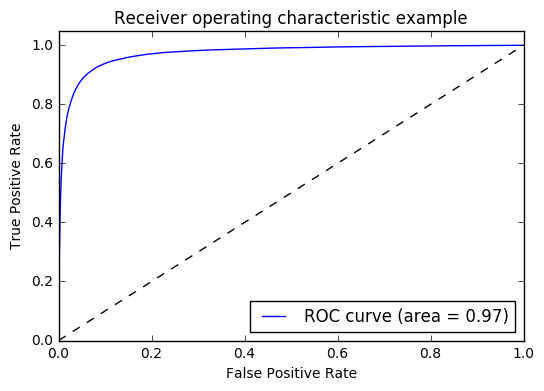

In [44]:
roc=roc_auc_score(yy, model.oob_prediction_)
fpr, tpr, thresholds= roc_curve(yy, model.oob_prediction_)
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

C:\Program Files\Anaconda2.0\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  app.launch_new_instance()


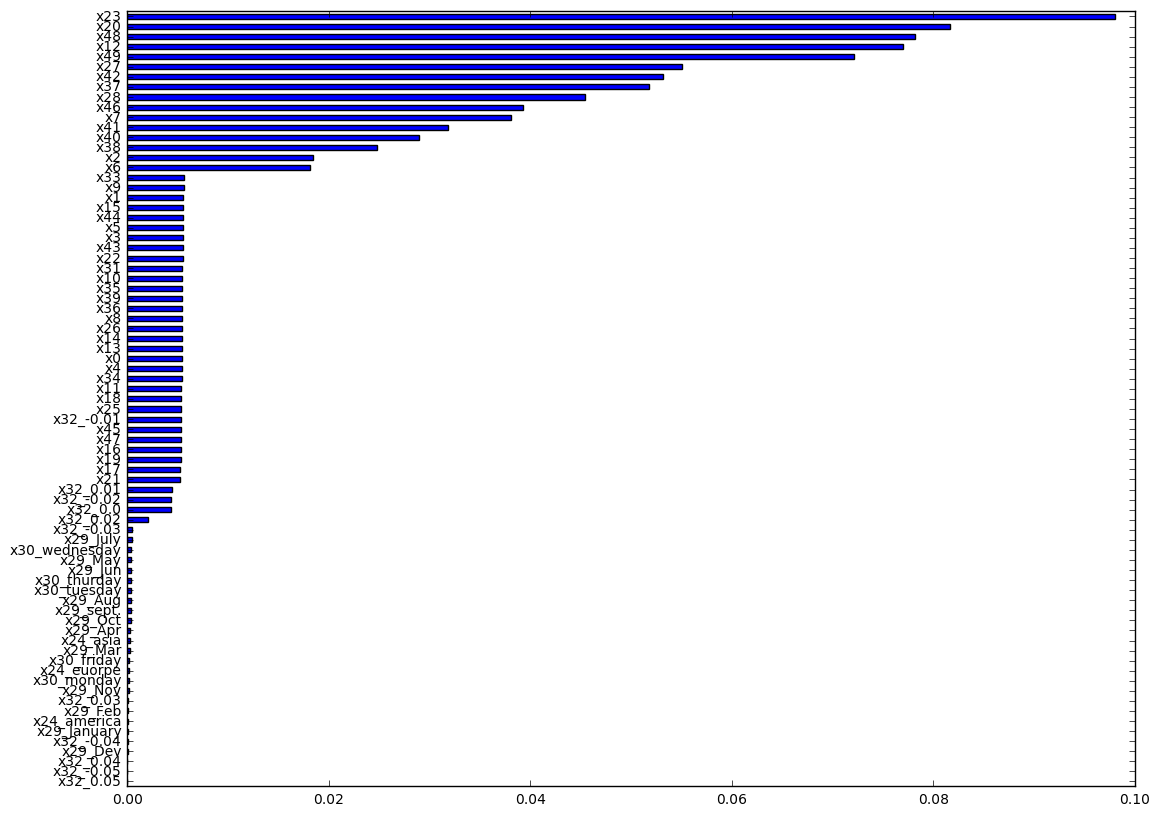

In [45]:
# Simple version that shows all of the variables
feature_importances = pd.Series(model.feature_importances_, index=df.columns)
feature_importances.sort()
feature_importances.plot(kind="barh", figsize=(13,10));

In [169]:
 
categorical_variables = ['x24','x29','x30','x32']
for variable in categorical_variables:
    # Create dummies
    dummies = pd.get_dummies(dftest[variable], prefix=variable)
    # Update X to include dummies and drop the main variable
    dftest = pd.concat([dftest, dummies], axis=1)
    dftest.drop([variable], axis=1, inplace=True)

In [170]:
df.columns

Index([u'x0', u'x1', u'x2', u'x3', u'x4', u'x5', u'x6', u'x7', u'x8', u'x9',
       u'x10', u'x11', u'x12', u'x13', u'x14', u'x15', u'x16', u'x17', u'x18',
       u'x19', u'x20', u'x21', u'x22', u'x23', u'x25', u'x26', u'x27', u'x28',
       u'x31', u'x33', u'x34', u'x35', u'x36', u'x37', u'x38', u'x39', u'x40',
       u'x41', u'x42', u'x43', u'x44', u'x45', u'x46', u'x47', u'x48', u'x49',
       u'x24_america', u'x24_asia', u'x24_euorpe', u'x29_Apr', u'x29_Aug',
       u'x29_Dev', u'x29_Feb', u'x29_January', u'x29_July', u'x29_Jun',
       u'x29_Mar', u'x29_May', u'x29_Nov', u'x29_Oct', u'x29_sept.',
       u'x30_friday', u'x30_monday', u'x30_thurday', u'x30_tuesday',
       u'x30_wednesday', u'x32_-0.05', u'x32_-0.04', u'x32_-0.03',
       u'x32_-0.02', u'x32_-0.01', u'x32_0.0', u'x32_0.01', u'x32_0.02',
       u'x32_0.03', u'x32_0.04', u'x32_0.05'],
      dtype='object')

In [171]:
dfpred=dftest

In [172]:
dfpred.shape

(39608, 76)

In [173]:
df.shape

(158392, 77)

In [174]:
df.columns

Index([u'x0', u'x1', u'x2', u'x3', u'x4', u'x5', u'x6', u'x7', u'x8', u'x9',
       u'x10', u'x11', u'x12', u'x13', u'x14', u'x15', u'x16', u'x17', u'x18',
       u'x19', u'x20', u'x21', u'x22', u'x23', u'x25', u'x26', u'x27', u'x28',
       u'x31', u'x33', u'x34', u'x35', u'x36', u'x37', u'x38', u'x39', u'x40',
       u'x41', u'x42', u'x43', u'x44', u'x45', u'x46', u'x47', u'x48', u'x49',
       u'x24_america', u'x24_asia', u'x24_euorpe', u'x29_Apr', u'x29_Aug',
       u'x29_Dev', u'x29_Feb', u'x29_January', u'x29_July', u'x29_Jun',
       u'x29_Mar', u'x29_May', u'x29_Nov', u'x29_Oct', u'x29_sept.',
       u'x30_friday', u'x30_monday', u'x30_thurday', u'x30_tuesday',
       u'x30_wednesday', u'x32_-0.05', u'x32_-0.04', u'x32_-0.03',
       u'x32_-0.02', u'x32_-0.01', u'x32_0.0', u'x32_0.01', u'x32_0.02',
       u'x32_0.03', u'x32_0.04', u'x32_0.05'],
      dtype='object')

In [176]:
dfpred.columns


Index([u'x0', u'x1', u'x2', u'x3', u'x4', u'x5', u'x6', u'x7', u'x8', u'x9',
       u'x10', u'x11', u'x12', u'x13', u'x14', u'x15', u'x16', u'x17', u'x18',
       u'x19', u'x20', u'x21', u'x22', u'x23', u'x25', u'x26', u'x27', u'x28',
       u'x31', u'x33', u'x34', u'x35', u'x36', u'x37', u'x38', u'x39', u'x40',
       u'x41', u'x42', u'x43', u'x44', u'x45', u'x46', u'x47', u'x48', u'x49',
       u'x24_america', u'x24_asia', u'x24_euorpe', u'x29_Apr', u'x29_Aug',
       u'x29_Dev', u'x29_Feb', u'x29_January', u'x29_July', u'x29_Jun',
       u'x29_Mar', u'x29_May', u'x29_Nov', u'x29_Oct', u'x29_sept.',
       u'x30_friday', u'x30_monday', u'x30_thurday', u'x30_tuesday',
       u'x30_wednesday', u'x32_-0.05', u'x32_-0.04', u'x32_-0.03',
       u'x32_-0.02', u'x32_-0.01', u'x32_0.0', u'x32_0.01', u'x32_0.02',
       u'x32_0.03', u'x32_0.04'],
      dtype='object')

In [180]:
dfpred['x32_0.05']=0
    

dtype('int64')

In [181]:
df.columns

Index([u'x0', u'x1', u'x2', u'x3', u'x4', u'x5', u'x6', u'x7', u'x8', u'x9',
       u'x10', u'x11', u'x12', u'x13', u'x14', u'x15', u'x16', u'x17', u'x18',
       u'x19', u'x20', u'x21', u'x22', u'x23', u'x25', u'x26', u'x27', u'x28',
       u'x31', u'x33', u'x34', u'x35', u'x36', u'x37', u'x38', u'x39', u'x40',
       u'x41', u'x42', u'x43', u'x44', u'x45', u'x46', u'x47', u'x48', u'x49',
       u'x24_america', u'x24_asia', u'x24_euorpe', u'x29_Apr', u'x29_Aug',
       u'x29_Dev', u'x29_Feb', u'x29_January', u'x29_July', u'x29_Jun',
       u'x29_Mar', u'x29_May', u'x29_Nov', u'x29_Oct', u'x29_sept.',
       u'x30_friday', u'x30_monday', u'x30_thurday', u'x30_tuesday',
       u'x30_wednesday', u'x32_-0.05', u'x32_-0.04', u'x32_-0.03',
       u'x32_-0.02', u'x32_-0.01', u'x32_0.0', u'x32_0.01', u'x32_0.02',
       u'x32_0.03', u'x32_0.04', u'x32_0.05'],
      dtype='object')

In [182]:
dftest.columns

Index([u'x0', u'x1', u'x2', u'x3', u'x4', u'x5', u'x6', u'x7', u'x8', u'x9',
       u'x10', u'x11', u'x12', u'x13', u'x14', u'x15', u'x16', u'x17', u'x18',
       u'x19', u'x20', u'x21', u'x22', u'x23', u'x25', u'x26', u'x27', u'x28',
       u'x31', u'x33', u'x34', u'x35', u'x36', u'x37', u'x38', u'x39', u'x40',
       u'x41', u'x42', u'x43', u'x44', u'x45', u'x46', u'x47', u'x48', u'x49',
       u'x24_america', u'x24_asia', u'x24_euorpe', u'x29_Apr', u'x29_Aug',
       u'x29_Dev', u'x29_Feb', u'x29_January', u'x29_July', u'x29_Jun',
       u'x29_Mar', u'x29_May', u'x29_Nov', u'x29_Oct', u'x29_sept.',
       u'x30_friday', u'x30_monday', u'x30_thurday', u'x30_tuesday',
       u'x30_wednesday', u'x32_-0.05', u'x32_-0.04', u'x32_-0.03',
       u'x32_-0.02', u'x32_-0.01', u'x32_0.0', u'x32_0.01', u'x32_0.02',
       u'x32_0.03', u'x32_0.04', u'x32_0.05'],
      dtype='object')

In [183]:
dfpred.columns

Index([u'x0', u'x1', u'x2', u'x3', u'x4', u'x5', u'x6', u'x7', u'x8', u'x9',
       u'x10', u'x11', u'x12', u'x13', u'x14', u'x15', u'x16', u'x17', u'x18',
       u'x19', u'x20', u'x21', u'x22', u'x23', u'x25', u'x26', u'x27', u'x28',
       u'x31', u'x33', u'x34', u'x35', u'x36', u'x37', u'x38', u'x39', u'x40',
       u'x41', u'x42', u'x43', u'x44', u'x45', u'x46', u'x47', u'x48', u'x49',
       u'x24_america', u'x24_asia', u'x24_euorpe', u'x29_Apr', u'x29_Aug',
       u'x29_Dev', u'x29_Feb', u'x29_January', u'x29_July', u'x29_Jun',
       u'x29_Mar', u'x29_May', u'x29_Nov', u'x29_Oct', u'x29_sept.',
       u'x30_friday', u'x30_monday', u'x30_thurday', u'x30_tuesday',
       u'x30_wednesday', u'x32_-0.05', u'x32_-0.04', u'x32_-0.03',
       u'x32_-0.02', u'x32_-0.01', u'x32_0.0', u'x32_0.01', u'x32_0.02',
       u'x32_0.03', u'x32_0.04', u'x32_0.05'],
      dtype='object')

In [184]:
P=model.predict(dftest)

In [185]:
P

array([ 0.3 ,  0.17,  0.05, ...,  0.01,  0.16,  0.11])

In [186]:
P.shape

(39608L,)

In [188]:
PD=pd.DataFrame()
PD['y']=P

In [189]:
PD['y']

0        0.30
1        0.17
2        0.05
3        0.73
4        0.03
5        0.08
6        0.93
7        0.79
8        0.82
9        0.68
10       0.07
11       0.74
12       0.10
13       0.99
14       0.93
15       0.22
16       0.61
17       0.24
18       0.91
19       0.19
20       0.60
21       0.96
22       0.03
23       0.95
24       0.70
25       0.05
26       0.09
27       0.95
28       0.05
29       0.07
         ... 
39578    0.93
39579    0.00
39580    0.06
39581    0.29
39582    0.08
39583    0.03
39584    0.03
39585    0.75
39586    0.04
39587    0.22
39588    0.01
39589    1.00
39590    0.43
39591    0.67
39592    0.21
39593    0.13
39594    0.80
39595    1.00
39596    0.95
39597    0.25
39598    0.96
39599    0.09
39600    0.19
39601    0.82
39602    0.03
39603    0.63
39604    0.96
39605    0.01
39606    0.16
39607    0.11
Name: y, dtype: float64

In [190]:
PD.to_csv("First_predict.csv")

In [38]:
##kaggle submission needed exactly 40000 rows. But since I have dropped the missing values in the test set there aren't 40000.
#Hence , I have cleaned test set using mean and saved it in New1.csv 
dfnew=pd.read_csv("New1.csv")

In [46]:
dfnew.shape,df.shape

((40000, 78), (158392, 77))

In [47]:
dfnew.columns

Index([u'Unnamed: 0', u'x0', u'x1', u'x2', u'x3', u'x4', u'x5', u'x6', u'x7',
       u'x8', u'x9', u'x10', u'x11', u'x12', u'x13', u'x14', u'x15', u'x16',
       u'x17', u'x18', u'x19', u'x20', u'x21', u'x22', u'x23', u'x25', u'x26',
       u'x27', u'x28', u'x31', u'x33', u'x34', u'x35', u'x36', u'x37', u'x38',
       u'x39', u'x40', u'x41', u'x42', u'x43', u'x44', u'x45', u'x46', u'x47',
       u'x48', u'x49', u'x24_america', u'x24_asia', u'x24_euorpe', u'x29_Apr',
       u'x29_Aug', u'x29_Dev', u'x29_Feb', u'x29_January', u'x29_July',
       u'x29_Jun', u'x29_Mar', u'x29_May', u'x29_Nov', u'x29_Oct',
       u'x29_sept.', u'x30_friday', u'x30_monday', u'x30_thurday',
       u'x30_tuesday', u'x30_wednesday', u'x32_-0.05', u'x32_-0.04',
       u'x32_-0.03', u'x32_-0.02', u'x32_-0.01', u'x32_0.0', u'x32_0.01',
       u'x32_0.02', u'x32_0.03', u'x32_0.04', u'x32_0.05'],
      dtype='object')

In [48]:
del dfnew['Unnamed: 0']

In [49]:
dfnew.shape

(40000, 77)

In [205]:
P1=model.predict(dfnew)

In [206]:
P1

array([ 0.3 ,  0.17,  0.05, ...,  0.01,  0.16,  0.11])

In [208]:
Predict=pd.DataFrame()
Predict['y']=P1
Predict.to_csv("Pred2.csv")

In [209]:
modelClas = RandomForestClassifier(100, oob_score=True, n_jobs=-1, random_state=42)
#model.fit(X_train, y_train)
modelClas.fit(df,yy)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=True, random_state=42, verbose=0, warm_start=False)

In [210]:
PClas=modelClas.predict(dfnew)

In [213]:
PClas

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [214]:
Predict2=pd.DataFrame()
Predict2['y']=PClas
Predict2.to_csv("PredClas3.csv")

C:\Users\Roopa\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  from ipykernel import kernelapp as app


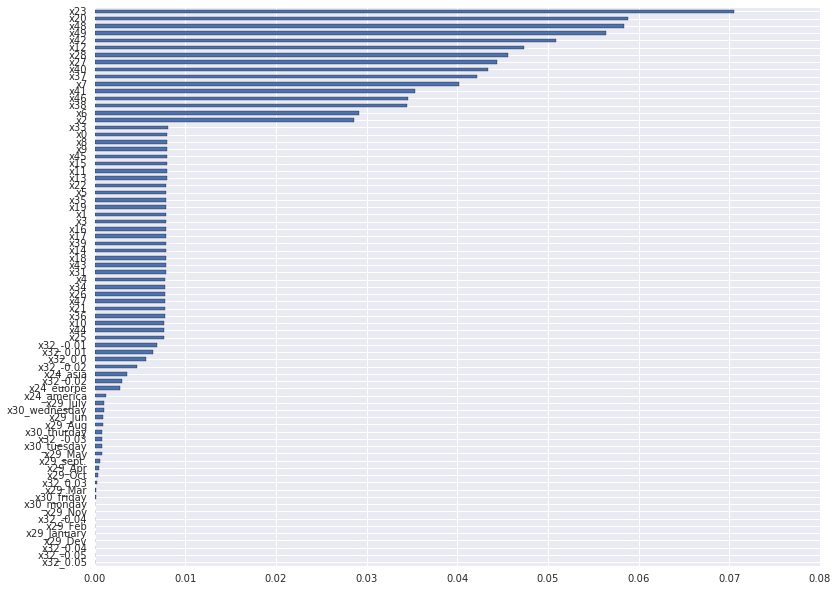

In [215]:
feature_importances = pd.Series(modelClas.feature_importances_, index=df.columns)
feature_importances.sort()
feature_importances.plot(kind="barh", figsize=(13,10));

In [50]:
from sklearn.grid_search import GridSearchCV
n_estimators = [300,500,1000]
max_features = ['auto','log2']
min_samples_split = [3,5,7,9]


rfc = RandomForestRegressor(n_jobs=1)
#Parameters of pipelines can be set using ‘__’ separated parameter names:
estimator = GridSearchCV(rfc,
                         dict(n_estimators=n_estimators,
                              max_features=max_features,
                              min_samples_split=min_samples_split
                              ), cv=None, n_jobs=-1)

C:\Program Files\Anaconda2.0\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Program Files\Anaconda2.0\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [51]:
estimator.fit(df,yy)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'min_samples_split': [3, 5, 7, 9], 'max_features': ['auto', 'log2'], 'n_estimators': [300, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [52]:
estimator.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=3, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [53]:
best_rfc = estimator.best_estimator_

In [54]:
best_rfc.fit(df,yy)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=3, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [58]:
gridsearchpred=best_rfc.predict(dfnew)

In [59]:
gridsearchpred

array([ 0.33375   ,  0.13335714,  0.03433333, ...,  0.02425   ,
        0.18666667,  0.09391667])

In [60]:
G=pd.DataFrame()
G['y']=gridsearchpred


In [62]:
G.columns

Index([u'y'], dtype='object')

In [64]:
G.y.dtype

dtype('float64')

In [65]:
G.to_csv("GridSearch.csv")